In [2]:
!pip install scikit-learn xgboost lightgbm catboost

In [36]:
import sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [4]:
df = pd.read_excel('./Confocal Raman Data/Subjects Components Filtered.xlsx')

In [5]:
df

,Healthy/Eczema,Subject,Ceramide 2,Ceramide 3,Lactic Acid,PCA,Uric Acid,Urea,Melanin,Cholesterol,Watermass
0,Eczema,EC001,0.000000,0.120289,0.026488,0.060566,0.000749,0.021031,2.230477,0.000000,43709.818546
1,Eczema,EC002,0.000000,0.110608,0.086276,0.040751,0.000102,0.013240,0.037265,0.001449,50761.610963
2,Eczema,EC003,0.000000,0.146709,0.051836,0.073384,0.000108,0.008633,2.728881,0.001867,39431.720135
3,Eczema,EC004,0.000000,0.306053,0.229205,0.264416,0.006567,0.024359,12.517264,0.000000,24836.572041
4,Eczema,EC006,0.000000,0.270734,0.129418,0.070845,0.000929,0.005694,0.733396,0.003287,76318.466566
...,...,...,...,...,...,...,...,...,...,...,...
71,Healthy,H046,0.000000,0.331470,0.144327,0.103408,0.002034,0.054572,1.730375,0.006811,13379.936053
72,Healthy,H047,0.000000,0.347538,0.123235,0.147987,0.001989,0.024887,1.021039,0.010425,7524.435836
73,Healthy,H048,0.026054,0.236214,0.042040,0.046963,0.004684,0.009837,0.000000,0.007840,12533.452496
74,Healthy,H049,0.000000,0.246170,0.079999,0.113140,0.002050,0.040404,2.954459,0.002814,10455.569270


In [6]:
df['class'] = 1

In [7]:
df.loc[df['Healthy/Eczema'] == 'Healthy', 'class'] = 0

In [8]:
df = df.drop('Healthy/Eczema', axis=1)
df = df.drop('Subject', axis=1)

In [9]:
df = df.sample(frac=1).reset_index(drop=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
models = [SVC(), KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(n_estimators=20), DecisionTreeClassifier()]

In [11]:
model = 0
for model in models:
    scores = cross_val_score(model, df.iloc[:, :-1], df.iloc[:, -1], cv=5)
    average_score = scores.mean()
    print("Average cross-validation score:", average_score)
    model.fit(df.iloc[:, :-1], df.iloc[:, -1])
    y_pred = model.predict(df.iloc[:, :-1])
    accuracy = accuracy_score(df.iloc[:, -1], y_pred)
    print(model , accuracy)

Average cross-validation score: 0.5
SVC() 0.6578947368421053
Average cross-validation score: 0.6433333333333333
KNeighborsClassifier(n_neighbors=3) 0.8289473684210527
Average cross-validation score: 0.6041666666666667
RandomForestClassifier(n_estimators=20) 1.0
Average cross-validation score: 0.71
DecisionTreeClassifier() 1.0


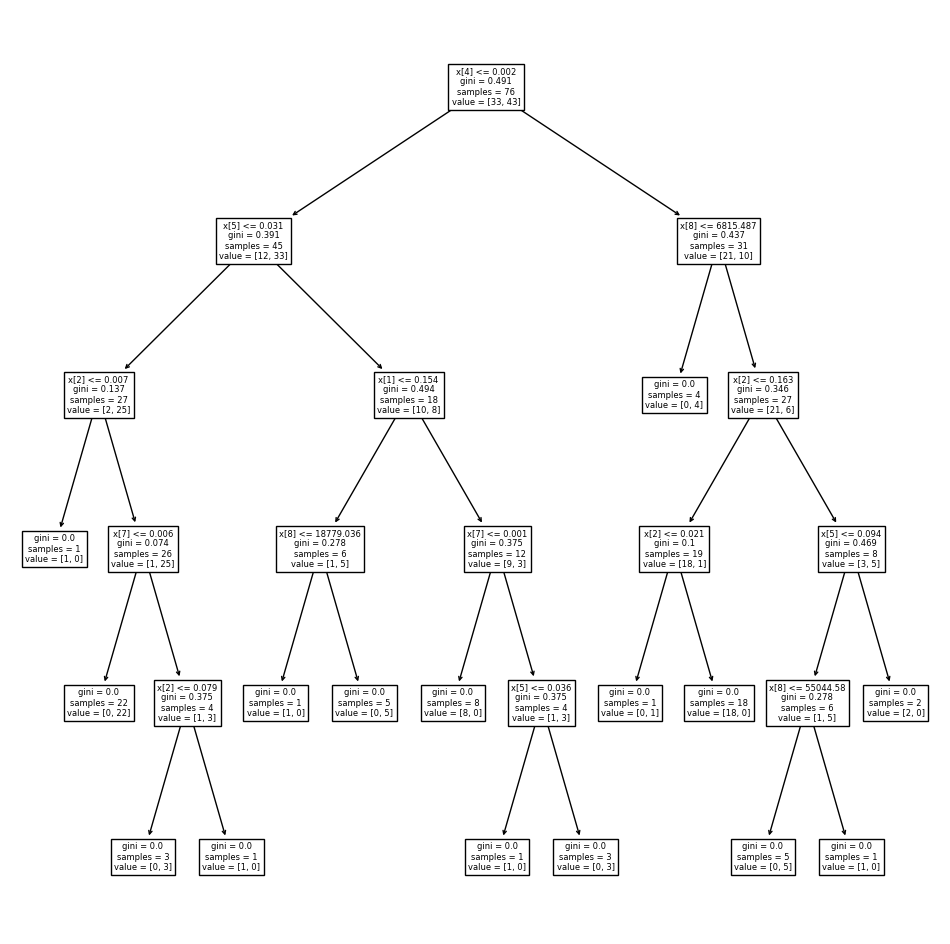

In [12]:
plt.figure(figsize=(12,12)) 
sklearn.tree.plot_tree(model)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [14]:
model1 = 0 
for model1 in models:
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(model1 , accuracy)

SVC() 0.5
KNeighborsClassifier(n_neighbors=3) 0.75
RandomForestClassifier(n_estimators=20) 0.75
DecisionTreeClassifier() 0.5625


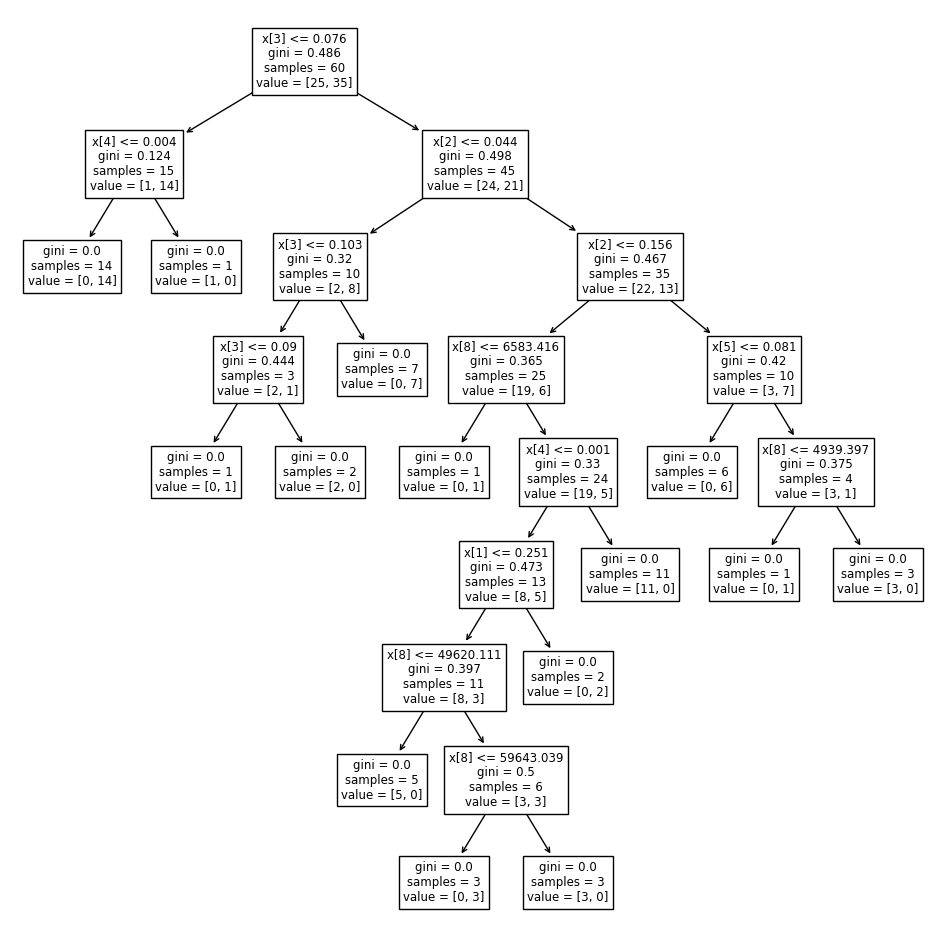

In [15]:
plt.figure(figsize=(12,12)) 
sklearn.tree.plot_tree(model1)
plt.show()

In [16]:
for i in range(1, 7):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(df.iloc[:, :-1])
    X_train, X_test, y_train, y_test = train_test_split(X_pca, df.iloc[:, -1], test_size=0.2, random_state=42)
    model2 = 0 
    for model2 in models:
        model2.fit(X_train, y_train)
        y_pred = model2.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(i ,model2 , accuracy)

1 SVC() 0.5625
1 KNeighborsClassifier(n_neighbors=3) 0.75
1 RandomForestClassifier(n_estimators=20) 0.875
1 DecisionTreeClassifier() 0.8125
2 SVC() 0.5625
2 KNeighborsClassifier(n_neighbors=3) 0.75
2 RandomForestClassifier(n_estimators=20) 0.75
2 DecisionTreeClassifier() 0.6875
3 SVC() 0.5625
3 KNeighborsClassifier(n_neighbors=3) 0.75
3 RandomForestClassifier(n_estimators=20) 0.625
3 DecisionTreeClassifier() 0.5
4 SVC() 0.5625
4 KNeighborsClassifier(n_neighbors=3) 0.75
4 RandomForestClassifier(n_estimators=20) 0.625
4 DecisionTreeClassifier() 0.4375
5 SVC() 0.5625
5 KNeighborsClassifier(n_neighbors=3) 0.75
5 RandomForestClassifier(n_estimators=20) 0.625
5 DecisionTreeClassifier() 0.625
6 SVC() 0.5625
6 KNeighborsClassifier(n_neighbors=3) 0.75
6 RandomForestClassifier(n_estimators=20) 0.625
6 DecisionTreeClassifier() 0.5


In [17]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv=5)
average_score = scores.mean()
print("Average cross-validation score:", average_score)

Average cross-validation score: 0.6575


In [18]:
rf.fit(X, y)
feature_importances = rf.feature_importances_
selector = SelectFromModel(rf, threshold=0.05)  
selector.fit(X, y)
X_selected = selector.transform(X)

In [19]:
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=2)
rf.fit(X_selected , y)

RandomForestClassifier(max_depth=5, min_samples_leaf=2)

In [20]:

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2']  
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 100}


In [21]:
best_score = grid_search.best_score_
print("Best cross-validation accuracy:", best_score)

Best cross-validation accuracy: 0.7091666666666667


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
classifiers = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }),
    'AdaBoost': (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001]
    }),
    'XGBoost': (xgb.XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
    }),
    'LightGBM': (lgb.LGBMClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
    }),
    'CatBoost': (CatBoostClassifier(), {
        'iterations': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
        'depth': [3, 5, 7],
    }),
}

for clf_name, (clf, param_grid) in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid, cv=10)
    grid_search.fit(X, y)

    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    print(f"Results for {clf_name}:")
    print("Best cross-validation accuracy:", best_score)
    print("Best hyperparameters:", best_params)
    print("-----------------------------------")
    
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test, y_test)
    print("Test accuracy:", test_score)
    print("-----------------------------------")
    
    scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring='roc_auc')
    print("AUC-ROC:", scores.mean())

Results for Random Forest:
Best cross-validation accuracy: 0.7214285714285714
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
-----------------------------------
Test accuracy: 1.0
-----------------------------------
AUC-ROC: 0.69125
Results for K-Nearest Neighbors:
Best cross-validation accuracy: 0.6732142857142857
Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
-----------------------------------
Test accuracy: 1.0
-----------------------------------
AUC-ROC: 0.67
Results for Decision Tree:
Best cross-validation accuracy: 0.7339285714285714
Best hyperparameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4}
-----------------------------------
Test accuracy: 0.8695652173913043
-----------------------------------
AUC-ROC: 0.6070833333333333
Results for AdaBoost:
Best cross-validation accuracy: 0.6857142857142857
Best hyperparameters: {'learning_rate': 0.001, 'n_estimator

39:	learn: 0.4380845	total: 18.2ms	remaining: 4.56ms
40:	learn: 0.4331903	total: 19.1ms	remaining: 4.18ms
41:	learn: 0.4320133	total: 19.6ms	remaining: 3.74ms
42:	learn: 0.4240620	total: 20.1ms	remaining: 3.27ms
43:	learn: 0.4193477	total: 20.6ms	remaining: 2.81ms
44:	learn: 0.4174436	total: 21.2ms	remaining: 2.35ms
45:	learn: 0.4162296	total: 21.6ms	remaining: 1.88ms
46:	learn: 0.4133548	total: 22.1ms	remaining: 1.41ms
47:	learn: 0.4106979	total: 22.5ms	remaining: 936us
48:	learn: 0.4084859	total: 22.9ms	remaining: 468us
49:	learn: 0.4067743	total: 23.4ms	remaining: 0us
0:	learn: 0.6874877	total: 527us	remaining: 25.9ms
1:	learn: 0.6731786	total: 956us	remaining: 23ms
2:	learn: 0.6613068	total: 1.39ms	remaining: 21.8ms
3:	learn: 0.6547694	total: 1.82ms	remaining: 20.9ms
4:	learn: 0.6461217	total: 2.27ms	remaining: 20.4ms
5:	learn: 0.6405742	total: 2.7ms	remaining: 19.8ms
6:	learn: 0.6350548	total: 3.09ms	remaining: 19ms
7:	learn: 0.6298164	total: 3.54ms	remaining: 18.6ms
8:	learn: 0.6

23:	learn: 0.5470653	total: 11.6ms	remaining: 12.6ms
24:	learn: 0.5417526	total: 12.3ms	remaining: 12.3ms
25:	learn: 0.5387967	total: 12.7ms	remaining: 11.8ms
26:	learn: 0.5365098	total: 13.2ms	remaining: 11.3ms
27:	learn: 0.5326545	total: 13.6ms	remaining: 10.7ms
28:	learn: 0.5292567	total: 14.2ms	remaining: 10.3ms
29:	learn: 0.5229202	total: 14.6ms	remaining: 9.76ms
30:	learn: 0.5211878	total: 15.1ms	remaining: 9.24ms
31:	learn: 0.5184637	total: 15.5ms	remaining: 8.72ms
32:	learn: 0.5166374	total: 15.9ms	remaining: 8.21ms
33:	learn: 0.5097064	total: 16.4ms	remaining: 7.71ms
34:	learn: 0.5060689	total: 16.8ms	remaining: 7.2ms
35:	learn: 0.5017571	total: 17.4ms	remaining: 6.78ms
36:	learn: 0.4954757	total: 17.9ms	remaining: 6.29ms
37:	learn: 0.4890868	total: 18.5ms	remaining: 5.84ms
38:	learn: 0.4861105	total: 19.3ms	remaining: 5.44ms
39:	learn: 0.4819905	total: 20ms	remaining: 5ms
40:	learn: 0.4789193	total: 20.5ms	remaining: 4.51ms
41:	learn: 0.4782316	total: 21ms	remaining: 4ms
42:	

0:	learn: 0.6923833	total: 812us	remaining: 39.8ms
1:	learn: 0.6911583	total: 1.45ms	remaining: 34.7ms
2:	learn: 0.6898849	total: 1.9ms	remaining: 29.8ms
3:	learn: 0.6888662	total: 2.33ms	remaining: 26.8ms
4:	learn: 0.6874433	total: 2.83ms	remaining: 25.5ms
5:	learn: 0.6868843	total: 3.34ms	remaining: 24.5ms
6:	learn: 0.6862420	total: 3.85ms	remaining: 23.7ms
7:	learn: 0.6856078	total: 4.17ms	remaining: 21.9ms
8:	learn: 0.6845521	total: 4.62ms	remaining: 21ms
9:	learn: 0.6839692	total: 5.13ms	remaining: 20.5ms
10:	learn: 0.6826327	total: 5.81ms	remaining: 20.6ms
11:	learn: 0.6811806	total: 6.47ms	remaining: 20.5ms
12:	learn: 0.6803761	total: 7.11ms	remaining: 20.2ms
13:	learn: 0.6787909	total: 7.66ms	remaining: 19.7ms
14:	learn: 0.6776630	total: 8.11ms	remaining: 18.9ms
15:	learn: 0.6771330	total: 8.5ms	remaining: 18.1ms
16:	learn: 0.6764538	total: 8.98ms	remaining: 17.4ms
17:	learn: 0.6750202	total: 9.38ms	remaining: 16.7ms
18:	learn: 0.6741294	total: 9.79ms	remaining: 16ms
19:	learn:

0:	learn: 0.6927260	total: 961us	remaining: 47.1ms
1:	learn: 0.6912780	total: 1.6ms	remaining: 38.3ms
2:	learn: 0.6897438	total: 2.16ms	remaining: 33.8ms
3:	learn: 0.6886931	total: 2.62ms	remaining: 30.1ms
4:	learn: 0.6885253	total: 3.08ms	remaining: 27.7ms
5:	learn: 0.6875173	total: 3.52ms	remaining: 25.8ms
6:	learn: 0.6862930	total: 3.94ms	remaining: 24.2ms
7:	learn: 0.6858304	total: 4.26ms	remaining: 22.4ms
8:	learn: 0.6847713	total: 4.69ms	remaining: 21.4ms
9:	learn: 0.6839397	total: 5.09ms	remaining: 20.4ms
10:	learn: 0.6821388	total: 5.49ms	remaining: 19.4ms
11:	learn: 0.6806960	total: 5.88ms	remaining: 18.6ms
12:	learn: 0.6799839	total: 6.26ms	remaining: 17.8ms
13:	learn: 0.6780493	total: 6.74ms	remaining: 17.3ms
14:	learn: 0.6772068	total: 7.16ms	remaining: 16.7ms
15:	learn: 0.6764784	total: 7.54ms	remaining: 16ms
16:	learn: 0.6755158	total: 7.93ms	remaining: 15.4ms
17:	learn: 0.6736520	total: 8.43ms	remaining: 15ms
18:	learn: 0.6725662	total: 8.89ms	remaining: 14.5ms
19:	learn

23:	learn: 0.6692931	total: 10.5ms	remaining: 11.4ms
24:	learn: 0.6687459	total: 11.4ms	remaining: 11.4ms
25:	learn: 0.6674276	total: 12ms	remaining: 11.1ms
26:	learn: 0.6658304	total: 12.6ms	remaining: 10.7ms
27:	learn: 0.6650303	total: 13.1ms	remaining: 10.3ms
28:	learn: 0.6644639	total: 13.6ms	remaining: 9.84ms
29:	learn: 0.6638683	total: 14.3ms	remaining: 9.52ms
30:	learn: 0.6629678	total: 14.8ms	remaining: 9.06ms
31:	learn: 0.6621740	total: 15.3ms	remaining: 8.58ms
32:	learn: 0.6612507	total: 15.8ms	remaining: 8.14ms
33:	learn: 0.6602328	total: 16.3ms	remaining: 7.69ms
34:	learn: 0.6595172	total: 16.8ms	remaining: 7.21ms
35:	learn: 0.6581970	total: 17.3ms	remaining: 6.71ms
36:	learn: 0.6571146	total: 17.7ms	remaining: 6.22ms
37:	learn: 0.6563781	total: 18.1ms	remaining: 5.72ms
38:	learn: 0.6557440	total: 18.6ms	remaining: 5.24ms
39:	learn: 0.6551177	total: 19ms	remaining: 4.75ms
40:	learn: 0.6544070	total: 19.4ms	remaining: 4.27ms
41:	learn: 0.6534708	total: 19.9ms	remaining: 3.78

46:	learn: 0.6879435	total: 20.2ms	remaining: 1.29ms
47:	learn: 0.6878077	total: 20.9ms	remaining: 870us
48:	learn: 0.6877179	total: 21.4ms	remaining: 436us
49:	learn: 0.6876416	total: 21.8ms	remaining: 0us
0:	learn: 0.6930888	total: 513us	remaining: 25.1ms
1:	learn: 0.6929408	total: 936us	remaining: 22.5ms
2:	learn: 0.6928059	total: 1.42ms	remaining: 22.2ms
3:	learn: 0.6927233	total: 1.82ms	remaining: 21ms
4:	learn: 0.6926161	total: 2.33ms	remaining: 20.9ms
5:	learn: 0.6925379	total: 2.73ms	remaining: 20ms
6:	learn: 0.6924575	total: 3.13ms	remaining: 19.2ms
7:	learn: 0.6924267	total: 3.44ms	remaining: 18.1ms
8:	learn: 0.6923269	total: 3.95ms	remaining: 18ms
9:	learn: 0.6922705	total: 4.35ms	remaining: 17.4ms
10:	learn: 0.6921849	total: 4.74ms	remaining: 16.8ms
11:	learn: 0.6920578	total: 5.16ms	remaining: 16.3ms
12:	learn: 0.6919753	total: 5.54ms	remaining: 15.8ms
13:	learn: 0.6919534	total: 5.93ms	remaining: 15.3ms
14:	learn: 0.6918079	total: 6.39ms	remaining: 14.9ms
15:	learn: 0.691

0:	learn: 0.6930697	total: 1.04ms	remaining: 50.8ms
1:	learn: 0.6929047	total: 2.27ms	remaining: 54.5ms
2:	learn: 0.6928508	total: 3.15ms	remaining: 49.3ms
3:	learn: 0.6927595	total: 4.18ms	remaining: 48.1ms
4:	learn: 0.6926945	total: 4.92ms	remaining: 44.2ms
5:	learn: 0.6925643	total: 5.63ms	remaining: 41.3ms
6:	learn: 0.6924369	total: 6.35ms	remaining: 39ms
7:	learn: 0.6923735	total: 7.04ms	remaining: 36.9ms
8:	learn: 0.6922864	total: 7.82ms	remaining: 35.6ms
9:	learn: 0.6921428	total: 8.51ms	remaining: 34ms
10:	learn: 0.6919592	total: 9.17ms	remaining: 32.5ms
11:	learn: 0.6918641	total: 9.82ms	remaining: 31.1ms
12:	learn: 0.6918021	total: 10.6ms	remaining: 30.1ms
13:	learn: 0.6917401	total: 11.1ms	remaining: 28.5ms
14:	learn: 0.6916326	total: 11.6ms	remaining: 27.2ms
15:	learn: 0.6914674	total: 12.2ms	remaining: 25.8ms
16:	learn: 0.6913385	total: 12.7ms	remaining: 24.6ms
17:	learn: 0.6911848	total: 13.2ms	remaining: 23.5ms
18:	learn: 0.6910391	total: 13.7ms	remaining: 22.4ms
19:	lea

54:	learn: 0.3981185	total: 23.2ms	remaining: 18.9ms
55:	learn: 0.3926082	total: 24.1ms	remaining: 19ms
56:	learn: 0.3887533	total: 24.6ms	remaining: 18.5ms
57:	learn: 0.3846119	total: 25ms	remaining: 18.1ms
58:	learn: 0.3827300	total: 25.4ms	remaining: 17.6ms
59:	learn: 0.3766185	total: 25.9ms	remaining: 17.2ms
60:	learn: 0.3727272	total: 26.3ms	remaining: 16.8ms
61:	learn: 0.3690979	total: 26.7ms	remaining: 16.4ms
62:	learn: 0.3668513	total: 27.2ms	remaining: 16ms
63:	learn: 0.3651248	total: 27.7ms	remaining: 15.6ms
64:	learn: 0.3631344	total: 28.1ms	remaining: 15.2ms
65:	learn: 0.3599144	total: 28.5ms	remaining: 14.7ms
66:	learn: 0.3583390	total: 28.9ms	remaining: 14.3ms
67:	learn: 0.3550889	total: 29.4ms	remaining: 13.8ms
68:	learn: 0.3528037	total: 29.8ms	remaining: 13.4ms
69:	learn: 0.3491779	total: 30.3ms	remaining: 13ms
70:	learn: 0.3447923	total: 30.7ms	remaining: 12.6ms
71:	learn: 0.3433812	total: 31.2ms	remaining: 12.1ms
72:	learn: 0.3403647	total: 31.6ms	remaining: 11.7ms
7

13:	learn: 0.5895188	total: 7.02ms	remaining: 43.1ms
14:	learn: 0.5829305	total: 7.66ms	remaining: 43.4ms
15:	learn: 0.5737748	total: 8.12ms	remaining: 42.6ms
16:	learn: 0.5665506	total: 8.59ms	remaining: 42ms
17:	learn: 0.5570467	total: 9.01ms	remaining: 41.1ms
18:	learn: 0.5505803	total: 9.59ms	remaining: 40.9ms
19:	learn: 0.5455003	total: 10ms	remaining: 40.1ms
20:	learn: 0.5392161	total: 10.5ms	remaining: 39.4ms
21:	learn: 0.5360736	total: 11ms	remaining: 39.1ms
22:	learn: 0.5310329	total: 11.5ms	remaining: 38.4ms
23:	learn: 0.5260815	total: 11.9ms	remaining: 37.6ms
24:	learn: 0.5227787	total: 12.3ms	remaining: 36.8ms
25:	learn: 0.5200605	total: 12.7ms	remaining: 36.1ms
26:	learn: 0.5136107	total: 13.1ms	remaining: 35.5ms
27:	learn: 0.5093609	total: 13.5ms	remaining: 34.8ms
28:	learn: 0.5069832	total: 13.9ms	remaining: 34.1ms
29:	learn: 0.5050568	total: 14.3ms	remaining: 33.4ms
30:	learn: 0.5013227	total: 14.8ms	remaining: 32.9ms
31:	learn: 0.4974274	total: 15.2ms	remaining: 32.2ms

97:	learn: 0.3101438	total: 47.2ms	remaining: 962us
98:	learn: 0.3088828	total: 48ms	remaining: 484us
99:	learn: 0.3079994	total: 48.5ms	remaining: 0us
0:	learn: 0.6862467	total: 580us	remaining: 57.5ms
1:	learn: 0.6703821	total: 1.06ms	remaining: 51.8ms
2:	learn: 0.6643809	total: 1.49ms	remaining: 48ms
3:	learn: 0.6578276	total: 1.95ms	remaining: 46.7ms
4:	learn: 0.6514774	total: 2.38ms	remaining: 45.3ms
5:	learn: 0.6445630	total: 2.8ms	remaining: 43.9ms
6:	learn: 0.6384280	total: 3.22ms	remaining: 42.7ms
7:	learn: 0.6353069	total: 3.56ms	remaining: 40.9ms
8:	learn: 0.6320720	total: 3.98ms	remaining: 40.3ms
9:	learn: 0.6230502	total: 4.42ms	remaining: 39.8ms
10:	learn: 0.6124667	total: 4.89ms	remaining: 39.6ms
11:	learn: 0.6050686	total: 5.4ms	remaining: 39.6ms
12:	learn: 0.6025779	total: 5.91ms	remaining: 39.6ms
13:	learn: 0.6014830	total: 6.38ms	remaining: 39.2ms
14:	learn: 0.5940703	total: 6.96ms	remaining: 39.4ms
15:	learn: 0.5904525	total: 7.44ms	remaining: 39.1ms
16:	learn: 0.58

36:	learn: 0.4548169	total: 16.6ms	remaining: 28.3ms
37:	learn: 0.4467728	total: 17.4ms	remaining: 28.3ms
38:	learn: 0.4410219	total: 17.9ms	remaining: 27.9ms
39:	learn: 0.4374854	total: 18.3ms	remaining: 27.4ms
40:	learn: 0.4350212	total: 18.7ms	remaining: 27ms
41:	learn: 0.4317687	total: 19.2ms	remaining: 26.5ms
42:	learn: 0.4274536	total: 19.7ms	remaining: 26.1ms
43:	learn: 0.4226659	total: 20.1ms	remaining: 25.6ms
44:	learn: 0.4186737	total: 20.6ms	remaining: 25.1ms
45:	learn: 0.4131160	total: 21ms	remaining: 24.7ms
46:	learn: 0.4102499	total: 21.4ms	remaining: 24.2ms
47:	learn: 0.4070435	total: 21.8ms	remaining: 23.6ms
48:	learn: 0.4048585	total: 22.3ms	remaining: 23.2ms
49:	learn: 0.3979991	total: 22.6ms	remaining: 22.6ms
50:	learn: 0.3898005	total: 23.1ms	remaining: 22.2ms
51:	learn: 0.3809560	total: 23.5ms	remaining: 21.7ms
52:	learn: 0.3766270	total: 24.1ms	remaining: 21.4ms
53:	learn: 0.3726080	total: 24.5ms	remaining: 20.9ms
54:	learn: 0.3679415	total: 25ms	remaining: 20.4ms

0:	learn: 0.6925856	total: 495us	remaining: 49.1ms
1:	learn: 0.6908717	total: 1.15ms	remaining: 56.3ms
2:	learn: 0.6891916	total: 1.69ms	remaining: 54.6ms
3:	learn: 0.6882783	total: 2.1ms	remaining: 50.3ms
4:	learn: 0.6877776	total: 2.73ms	remaining: 51.9ms
5:	learn: 0.6870789	total: 3.15ms	remaining: 49.4ms
6:	learn: 0.6857508	total: 3.56ms	remaining: 47.3ms
7:	learn: 0.6853154	total: 3.89ms	remaining: 44.8ms
8:	learn: 0.6842766	total: 4.45ms	remaining: 45ms
9:	learn: 0.6825373	total: 4.86ms	remaining: 43.7ms
10:	learn: 0.6813431	total: 5.24ms	remaining: 42.4ms
11:	learn: 0.6804755	total: 5.68ms	remaining: 41.7ms
12:	learn: 0.6797384	total: 6.13ms	remaining: 41ms
13:	learn: 0.6784267	total: 6.55ms	remaining: 40.2ms
14:	learn: 0.6770514	total: 7ms	remaining: 39.6ms
15:	learn: 0.6763261	total: 7.42ms	remaining: 39ms
16:	learn: 0.6751102	total: 7.85ms	remaining: 38.3ms
17:	learn: 0.6746327	total: 8.25ms	remaining: 37.6ms
18:	learn: 0.6729553	total: 8.66ms	remaining: 36.9ms
19:	learn: 0.6

95:	learn: 0.6122343	total: 41.4ms	remaining: 1.72ms
96:	learn: 0.6114780	total: 42.3ms	remaining: 1.31ms
97:	learn: 0.6106889	total: 42.7ms	remaining: 872us
98:	learn: 0.6099885	total: 43.1ms	remaining: 435us
99:	learn: 0.6095756	total: 43.6ms	remaining: 0us
0:	learn: 0.6927260	total: 484us	remaining: 48ms
1:	learn: 0.6912780	total: 879us	remaining: 43.1ms
2:	learn: 0.6897438	total: 1.28ms	remaining: 41.6ms
3:	learn: 0.6886931	total: 1.69ms	remaining: 40.6ms
4:	learn: 0.6885253	total: 2.09ms	remaining: 39.7ms
5:	learn: 0.6875173	total: 2.49ms	remaining: 39.1ms
6:	learn: 0.6862930	total: 2.91ms	remaining: 38.7ms
7:	learn: 0.6858304	total: 3.23ms	remaining: 37.2ms
8:	learn: 0.6847713	total: 3.62ms	remaining: 36.6ms
9:	learn: 0.6839397	total: 4.02ms	remaining: 36.2ms
10:	learn: 0.6821388	total: 4.4ms	remaining: 35.6ms
11:	learn: 0.6806960	total: 4.85ms	remaining: 35.6ms
12:	learn: 0.6799839	total: 5.35ms	remaining: 35.8ms
13:	learn: 0.6780493	total: 5.81ms	remaining: 35.7ms
14:	learn: 0.

52:	learn: 0.6465882	total: 23.3ms	remaining: 20.6ms
53:	learn: 0.6459411	total: 24ms	remaining: 20.4ms
54:	learn: 0.6448511	total: 24.4ms	remaining: 19.9ms
55:	learn: 0.6438466	total: 24.8ms	remaining: 19.5ms
56:	learn: 0.6429048	total: 25.2ms	remaining: 19ms
57:	learn: 0.6415721	total: 25.7ms	remaining: 18.6ms
58:	learn: 0.6406776	total: 26.1ms	remaining: 18.2ms
59:	learn: 0.6398027	total: 26.6ms	remaining: 17.7ms
60:	learn: 0.6388254	total: 27.1ms	remaining: 17.3ms
61:	learn: 0.6381100	total: 27.5ms	remaining: 16.8ms
62:	learn: 0.6373768	total: 27.9ms	remaining: 16.4ms
63:	learn: 0.6365535	total: 28.5ms	remaining: 16ms
64:	learn: 0.6361166	total: 28.9ms	remaining: 15.6ms
65:	learn: 0.6358024	total: 29.4ms	remaining: 15.1ms
66:	learn: 0.6352262	total: 29.8ms	remaining: 14.7ms
67:	learn: 0.6344871	total: 30.2ms	remaining: 14.2ms
68:	learn: 0.6335040	total: 30.6ms	remaining: 13.8ms
69:	learn: 0.6327709	total: 31ms	remaining: 13.3ms
70:	learn: 0.6323266	total: 31.4ms	remaining: 12.8ms
7

0:	learn: 0.6930906	total: 568us	remaining: 56.3ms
1:	learn: 0.6929716	total: 1.29ms	remaining: 63.2ms
2:	learn: 0.6929071	total: 1.81ms	remaining: 58.6ms
3:	learn: 0.6928339	total: 2.28ms	remaining: 54.8ms
4:	learn: 0.6927753	total: 2.8ms	remaining: 53.2ms
5:	learn: 0.6926903	total: 3.29ms	remaining: 51.6ms
6:	learn: 0.6925905	total: 3.8ms	remaining: 50.5ms
7:	learn: 0.6925603	total: 4.22ms	remaining: 48.5ms
8:	learn: 0.6925080	total: 4.69ms	remaining: 47.4ms
9:	learn: 0.6924732	total: 5.16ms	remaining: 46.4ms
10:	learn: 0.6923397	total: 5.79ms	remaining: 46.9ms
11:	learn: 0.6921971	total: 6.33ms	remaining: 46.5ms
12:	learn: 0.6921393	total: 6.79ms	remaining: 45.4ms
13:	learn: 0.6920912	total: 7.33ms	remaining: 45ms
14:	learn: 0.6919304	total: 7.93ms	remaining: 44.9ms
15:	learn: 0.6918416	total: 8.66ms	remaining: 45.5ms
16:	learn: 0.6917317	total: 9.17ms	remaining: 44.8ms
17:	learn: 0.6915890	total: 9.6ms	remaining: 43.7ms
18:	learn: 0.6914809	total: 10.3ms	remaining: 43.8ms
19:	learn

51:	learn: 0.6872580	total: 26ms	remaining: 24ms
52:	learn: 0.6872037	total: 26.9ms	remaining: 23.8ms
53:	learn: 0.6871420	total: 27.5ms	remaining: 23.4ms
54:	learn: 0.6869553	total: 28.1ms	remaining: 23ms
55:	learn: 0.6868548	total: 28.7ms	remaining: 22.6ms
56:	learn: 0.6866829	total: 29.3ms	remaining: 22.1ms
57:	learn: 0.6865942	total: 29.9ms	remaining: 21.6ms
58:	learn: 0.6864890	total: 30.4ms	remaining: 21.1ms
59:	learn: 0.6863309	total: 30.9ms	remaining: 20.6ms
60:	learn: 0.6861530	total: 31.5ms	remaining: 20.1ms
61:	learn: 0.6860102	total: 31.9ms	remaining: 19.6ms
62:	learn: 0.6858353	total: 32.3ms	remaining: 19ms
63:	learn: 0.6857110	total: 32.8ms	remaining: 18.5ms
64:	learn: 0.6856646	total: 33.3ms	remaining: 17.9ms
65:	learn: 0.6855971	total: 33.7ms	remaining: 17.4ms
66:	learn: 0.6854423	total: 34.2ms	remaining: 16.9ms
67:	learn: 0.6853539	total: 34.6ms	remaining: 16.3ms
68:	learn: 0.6852526	total: 35.1ms	remaining: 15.8ms
69:	learn: 0.6851285	total: 35.5ms	remaining: 15.2ms
7

0:	learn: 0.6931060	total: 506us	remaining: 50.2ms
1:	learn: 0.6929585	total: 1.14ms	remaining: 56.1ms
2:	learn: 0.6928036	total: 1.73ms	remaining: 55.8ms
3:	learn: 0.6926970	total: 2.2ms	remaining: 52.9ms
4:	learn: 0.6926799	total: 2.64ms	remaining: 50.2ms
5:	learn: 0.6925766	total: 3.15ms	remaining: 49.3ms
6:	learn: 0.6924516	total: 3.6ms	remaining: 47.8ms
7:	learn: 0.6924029	total: 4.06ms	remaining: 46.7ms
8:	learn: 0.6922935	total: 4.5ms	remaining: 45.5ms
9:	learn: 0.6922073	total: 4.95ms	remaining: 44.6ms
10:	learn: 0.6920192	total: 5.41ms	remaining: 43.7ms
11:	learn: 0.6918669	total: 5.87ms	remaining: 43.1ms
12:	learn: 0.6917942	total: 6.28ms	remaining: 42ms
13:	learn: 0.6915906	total: 6.8ms	remaining: 41.8ms
14:	learn: 0.6914999	total: 7.4ms	remaining: 41.9ms
15:	learn: 0.6913169	total: 7.9ms	remaining: 41.5ms
16:	learn: 0.6912135	total: 8.45ms	remaining: 41.2ms
17:	learn: 0.6910159	total: 8.89ms	remaining: 40.5ms
18:	learn: 0.6908966	total: 9.34ms	remaining: 39.8ms
19:	learn: 0

46:	learn: 0.6882959	total: 24.9ms	remaining: 28ms
47:	learn: 0.6882071	total: 25.6ms	remaining: 27.7ms
48:	learn: 0.6881351	total: 26ms	remaining: 27.1ms
49:	learn: 0.6880876	total: 26.6ms	remaining: 26.6ms
50:	learn: 0.6880347	total: 27.1ms	remaining: 26ms
51:	learn: 0.6879417	total: 27.7ms	remaining: 25.6ms
52:	learn: 0.6879062	total: 28.2ms	remaining: 25ms
53:	learn: 0.6878267	total: 28.7ms	remaining: 24.4ms
54:	learn: 0.6876923	total: 29.1ms	remaining: 23.8ms
55:	learn: 0.6875652	total: 29.5ms	remaining: 23.2ms
56:	learn: 0.6874451	total: 30.1ms	remaining: 22.7ms
57:	learn: 0.6873306	total: 30.6ms	remaining: 22.1ms
58:	learn: 0.6872051	total: 31.2ms	remaining: 21.7ms
59:	learn: 0.6870860	total: 31.6ms	remaining: 21.1ms
60:	learn: 0.6869560	total: 32ms	remaining: 20.5ms
61:	learn: 0.6868599	total: 32.5ms	remaining: 19.9ms
62:	learn: 0.6867440	total: 33ms	remaining: 19.4ms
63:	learn: 0.6866323	total: 33.4ms	remaining: 18.8ms
64:	learn: 0.6865800	total: 33.9ms	remaining: 18.3ms
65:	l

0:	learn: 0.6774353	total: 1.58ms	remaining: 315ms
1:	learn: 0.6381089	total: 3.29ms	remaining: 326ms
2:	learn: 0.6173157	total: 4.84ms	remaining: 318ms
3:	learn: 0.6108541	total: 6.33ms	remaining: 310ms
4:	learn: 0.5948184	total: 7.83ms	remaining: 305ms
5:	learn: 0.5826693	total: 9.4ms	remaining: 304ms
6:	learn: 0.5669198	total: 10.9ms	remaining: 301ms
7:	learn: 0.5403096	total: 12.4ms	remaining: 298ms
8:	learn: 0.5236509	total: 14ms	remaining: 297ms
9:	learn: 0.5049935	total: 15.5ms	remaining: 295ms
10:	learn: 0.4939179	total: 17.1ms	remaining: 293ms
11:	learn: 0.4865033	total: 18.6ms	remaining: 291ms
12:	learn: 0.4754982	total: 20.1ms	remaining: 289ms
13:	learn: 0.4636080	total: 21.8ms	remaining: 289ms
14:	learn: 0.4545885	total: 23.4ms	remaining: 289ms
15:	learn: 0.4468204	total: 25ms	remaining: 288ms
16:	learn: 0.4326160	total: 26.7ms	remaining: 287ms
17:	learn: 0.4259039	total: 28.4ms	remaining: 287ms
18:	learn: 0.4169221	total: 30ms	remaining: 285ms
19:	learn: 0.4091381	total: 3

18:	learn: 0.4131858	total: 33.4ms	remaining: 318ms
19:	learn: 0.4055836	total: 35.3ms	remaining: 318ms
20:	learn: 0.3990654	total: 36.9ms	remaining: 315ms
21:	learn: 0.3916524	total: 38.5ms	remaining: 312ms
22:	learn: 0.3834774	total: 40.1ms	remaining: 309ms
23:	learn: 0.3803005	total: 41.7ms	remaining: 306ms
24:	learn: 0.3700125	total: 43.3ms	remaining: 303ms
25:	learn: 0.3629535	total: 45.1ms	remaining: 302ms
26:	learn: 0.3570655	total: 46.8ms	remaining: 300ms
27:	learn: 0.3468985	total: 48.4ms	remaining: 298ms
28:	learn: 0.3402785	total: 50.2ms	remaining: 296ms
29:	learn: 0.3367819	total: 51.9ms	remaining: 294ms
30:	learn: 0.3250576	total: 53.5ms	remaining: 292ms
31:	learn: 0.3190078	total: 55.1ms	remaining: 289ms
32:	learn: 0.3115844	total: 56.7ms	remaining: 287ms
33:	learn: 0.3039355	total: 58.3ms	remaining: 285ms
34:	learn: 0.2946412	total: 60ms	remaining: 283ms
35:	learn: 0.2807307	total: 61.7ms	remaining: 281ms
36:	learn: 0.2749184	total: 63.3ms	remaining: 279ms
37:	learn: 0.2

37:	learn: 0.2750286	total: 60ms	remaining: 256ms
38:	learn: 0.2695579	total: 61.7ms	remaining: 255ms
39:	learn: 0.2652773	total: 63.3ms	remaining: 253ms
40:	learn: 0.2595254	total: 64.9ms	remaining: 252ms
41:	learn: 0.2516250	total: 66.4ms	remaining: 250ms
42:	learn: 0.2488529	total: 67.9ms	remaining: 248ms
43:	learn: 0.2456018	total: 69.4ms	remaining: 246ms
44:	learn: 0.2387488	total: 71.1ms	remaining: 245ms
45:	learn: 0.2313563	total: 72.6ms	remaining: 243ms
46:	learn: 0.2258802	total: 74.1ms	remaining: 241ms
47:	learn: 0.2215231	total: 75.6ms	remaining: 239ms
48:	learn: 0.2161163	total: 77.2ms	remaining: 238ms
49:	learn: 0.2112918	total: 78.7ms	remaining: 236ms
50:	learn: 0.2041417	total: 80.4ms	remaining: 235ms
51:	learn: 0.1984632	total: 81.9ms	remaining: 233ms
52:	learn: 0.1938521	total: 83.4ms	remaining: 231ms
53:	learn: 0.1875355	total: 84.9ms	remaining: 230ms
54:	learn: 0.1839786	total: 86.5ms	remaining: 228ms
55:	learn: 0.1786215	total: 88.4ms	remaining: 227ms
56:	learn: 0.1

42:	learn: 0.2419750	total: 73.1ms	remaining: 267ms
43:	learn: 0.2313003	total: 75ms	remaining: 266ms
44:	learn: 0.2262591	total: 76.9ms	remaining: 265ms
45:	learn: 0.2252303	total: 78.6ms	remaining: 263ms
46:	learn: 0.2187221	total: 80.3ms	remaining: 262ms
47:	learn: 0.2136523	total: 82ms	remaining: 260ms
48:	learn: 0.2117002	total: 83.7ms	remaining: 258ms
49:	learn: 0.2092729	total: 85.5ms	remaining: 256ms
50:	learn: 0.2067479	total: 87.3ms	remaining: 255ms
51:	learn: 0.2003862	total: 89.7ms	remaining: 255ms
52:	learn: 0.1979448	total: 91.5ms	remaining: 254ms
53:	learn: 0.1951773	total: 93.2ms	remaining: 252ms
54:	learn: 0.1903876	total: 94.9ms	remaining: 250ms
55:	learn: 0.1846436	total: 96.5ms	remaining: 248ms
56:	learn: 0.1787584	total: 98.1ms	remaining: 246ms
57:	learn: 0.1744720	total: 99.7ms	remaining: 244ms
58:	learn: 0.1687606	total: 101ms	remaining: 242ms
59:	learn: 0.1667455	total: 103ms	remaining: 240ms
60:	learn: 0.1603106	total: 105ms	remaining: 239ms
61:	learn: 0.154847

23:	learn: 0.3734519	total: 43.9ms	remaining: 322ms
24:	learn: 0.3622364	total: 45.7ms	remaining: 320ms
25:	learn: 0.3555515	total: 47.4ms	remaining: 317ms
26:	learn: 0.3520761	total: 49.1ms	remaining: 315ms
27:	learn: 0.3375518	total: 50.7ms	remaining: 311ms
28:	learn: 0.3310461	total: 52.6ms	remaining: 310ms
29:	learn: 0.3256431	total: 54.7ms	remaining: 310ms
30:	learn: 0.3219085	total: 56.6ms	remaining: 309ms
31:	learn: 0.3131491	total: 58.4ms	remaining: 306ms
32:	learn: 0.3111189	total: 60ms	remaining: 304ms
33:	learn: 0.3067295	total: 61.6ms	remaining: 301ms
34:	learn: 0.3029110	total: 63.2ms	remaining: 298ms
35:	learn: 0.2974238	total: 65ms	remaining: 296ms
36:	learn: 0.2908187	total: 66.9ms	remaining: 295ms
37:	learn: 0.2880223	total: 69ms	remaining: 294ms
38:	learn: 0.2805667	total: 70.8ms	remaining: 292ms
39:	learn: 0.2712318	total: 72.4ms	remaining: 290ms
40:	learn: 0.2666769	total: 74ms	remaining: 287ms
41:	learn: 0.2619843	total: 75.7ms	remaining: 285ms
42:	learn: 0.2593477

22:	learn: 0.3685026	total: 35.1ms	remaining: 270ms
23:	learn: 0.3621428	total: 36.9ms	remaining: 271ms
24:	learn: 0.3601929	total: 38.5ms	remaining: 269ms
25:	learn: 0.3478195	total: 40ms	remaining: 268ms
26:	learn: 0.3441060	total: 41.6ms	remaining: 266ms
27:	learn: 0.3307726	total: 43.1ms	remaining: 265ms
28:	learn: 0.3254950	total: 44.6ms	remaining: 263ms
29:	learn: 0.3204400	total: 46.1ms	remaining: 261ms
30:	learn: 0.3091718	total: 47.5ms	remaining: 259ms
31:	learn: 0.3007568	total: 49ms	remaining: 257ms
32:	learn: 0.2983976	total: 50.4ms	remaining: 255ms
33:	learn: 0.2940304	total: 52ms	remaining: 254ms
34:	learn: 0.2895826	total: 53.5ms	remaining: 252ms
35:	learn: 0.2842722	total: 55ms	remaining: 251ms
36:	learn: 0.2773912	total: 56.5ms	remaining: 249ms
37:	learn: 0.2746497	total: 57.9ms	remaining: 247ms
38:	learn: 0.2659758	total: 59.4ms	remaining: 245ms
39:	learn: 0.2552373	total: 61ms	remaining: 244ms
40:	learn: 0.2435235	total: 62.5ms	remaining: 242ms
41:	learn: 0.2408635	t

39:	learn: 0.2804442	total: 62.1ms	remaining: 248ms
40:	learn: 0.2760472	total: 63.8ms	remaining: 247ms
41:	learn: 0.2728340	total: 65.3ms	remaining: 246ms
42:	learn: 0.2691669	total: 66.9ms	remaining: 244ms
43:	learn: 0.2650045	total: 68.3ms	remaining: 242ms
44:	learn: 0.2555408	total: 69.9ms	remaining: 241ms
45:	learn: 0.2518051	total: 71.5ms	remaining: 239ms
46:	learn: 0.2480354	total: 72.9ms	remaining: 237ms
47:	learn: 0.2462887	total: 74.4ms	remaining: 236ms
48:	learn: 0.2449339	total: 75.9ms	remaining: 234ms
49:	learn: 0.2414592	total: 77.5ms	remaining: 233ms
50:	learn: 0.2354971	total: 79.2ms	remaining: 232ms
51:	learn: 0.2253151	total: 80.9ms	remaining: 230ms
52:	learn: 0.2199711	total: 82.4ms	remaining: 228ms
53:	learn: 0.2176221	total: 83.9ms	remaining: 227ms
54:	learn: 0.2169183	total: 85.4ms	remaining: 225ms
55:	learn: 0.2118313	total: 86.9ms	remaining: 223ms
56:	learn: 0.2053182	total: 88.3ms	remaining: 222ms
57:	learn: 0.2021153	total: 89.8ms	remaining: 220ms
58:	learn: 0

60:	learn: 0.1698462	total: 91.6ms	remaining: 209ms
61:	learn: 0.1681572	total: 93.2ms	remaining: 208ms
62:	learn: 0.1623403	total: 94.7ms	remaining: 206ms
63:	learn: 0.1580672	total: 96.2ms	remaining: 204ms
64:	learn: 0.1530077	total: 97.7ms	remaining: 203ms
65:	learn: 0.1510045	total: 99.2ms	remaining: 201ms
66:	learn: 0.1478662	total: 101ms	remaining: 200ms
67:	learn: 0.1428964	total: 102ms	remaining: 198ms
68:	learn: 0.1406890	total: 104ms	remaining: 197ms
69:	learn: 0.1373119	total: 105ms	remaining: 195ms
70:	learn: 0.1356499	total: 106ms	remaining: 193ms
71:	learn: 0.1342037	total: 108ms	remaining: 192ms
72:	learn: 0.1326174	total: 110ms	remaining: 191ms
73:	learn: 0.1287825	total: 111ms	remaining: 189ms
74:	learn: 0.1276704	total: 113ms	remaining: 188ms
75:	learn: 0.1239131	total: 114ms	remaining: 186ms
76:	learn: 0.1204540	total: 116ms	remaining: 185ms
77:	learn: 0.1184111	total: 117ms	remaining: 183ms
78:	learn: 0.1172631	total: 119ms	remaining: 182ms
79:	learn: 0.1148068	tota

84:	learn: 0.0959238	total: 128ms	remaining: 173ms
85:	learn: 0.0929697	total: 130ms	remaining: 172ms
86:	learn: 0.0917272	total: 131ms	remaining: 171ms
87:	learn: 0.0906785	total: 133ms	remaining: 169ms
88:	learn: 0.0895858	total: 134ms	remaining: 168ms
89:	learn: 0.0872931	total: 136ms	remaining: 166ms
90:	learn: 0.0857567	total: 137ms	remaining: 165ms
91:	learn: 0.0844176	total: 139ms	remaining: 163ms
92:	learn: 0.0826242	total: 140ms	remaining: 162ms
93:	learn: 0.0806251	total: 142ms	remaining: 160ms
94:	learn: 0.0796981	total: 143ms	remaining: 159ms
95:	learn: 0.0790503	total: 145ms	remaining: 157ms
96:	learn: 0.0780601	total: 146ms	remaining: 155ms
97:	learn: 0.0772333	total: 148ms	remaining: 154ms
98:	learn: 0.0764376	total: 149ms	remaining: 153ms
99:	learn: 0.0757595	total: 151ms	remaining: 151ms
100:	learn: 0.0748359	total: 152ms	remaining: 149ms
101:	learn: 0.0741214	total: 154ms	remaining: 148ms
102:	learn: 0.0726589	total: 155ms	remaining: 146ms
103:	learn: 0.0713368	total:

124:	learn: 0.0589012	total: 188ms	remaining: 113ms
125:	learn: 0.0587842	total: 190ms	remaining: 111ms
126:	learn: 0.0580034	total: 191ms	remaining: 110ms
127:	learn: 0.0578325	total: 193ms	remaining: 109ms
128:	learn: 0.0560115	total: 195ms	remaining: 107ms
129:	learn: 0.0550743	total: 196ms	remaining: 106ms
130:	learn: 0.0548299	total: 198ms	remaining: 104ms
131:	learn: 0.0546718	total: 199ms	remaining: 103ms
132:	learn: 0.0533238	total: 201ms	remaining: 101ms
133:	learn: 0.0531665	total: 203ms	remaining: 99.8ms
134:	learn: 0.0530188	total: 204ms	remaining: 98.3ms
135:	learn: 0.0529169	total: 206ms	remaining: 96.8ms
136:	learn: 0.0520803	total: 207ms	remaining: 95.3ms
137:	learn: 0.0519403	total: 209ms	remaining: 93.8ms
138:	learn: 0.0512354	total: 210ms	remaining: 92.3ms
139:	learn: 0.0498843	total: 212ms	remaining: 91ms
140:	learn: 0.0493097	total: 214ms	remaining: 89.5ms
141:	learn: 0.0486184	total: 215ms	remaining: 88ms
142:	learn: 0.0469221	total: 217ms	remaining: 86.5ms
143:	l

146:	learn: 0.4666209	total: 231ms	remaining: 83.4ms
147:	learn: 0.4659815	total: 233ms	remaining: 81.9ms
148:	learn: 0.4655685	total: 235ms	remaining: 80.3ms
149:	learn: 0.4647582	total: 236ms	remaining: 78.7ms
150:	learn: 0.4641735	total: 238ms	remaining: 77.2ms
151:	learn: 0.4636206	total: 239ms	remaining: 75.6ms
152:	learn: 0.4623045	total: 241ms	remaining: 74ms
153:	learn: 0.4616804	total: 242ms	remaining: 72.4ms
154:	learn: 0.4607868	total: 244ms	remaining: 70.9ms
155:	learn: 0.4599599	total: 246ms	remaining: 69.3ms
156:	learn: 0.4586963	total: 247ms	remaining: 67.7ms
157:	learn: 0.4579209	total: 249ms	remaining: 66.2ms
158:	learn: 0.4569949	total: 251ms	remaining: 64.7ms
159:	learn: 0.4562930	total: 252ms	remaining: 63.1ms
160:	learn: 0.4550713	total: 254ms	remaining: 61.5ms
161:	learn: 0.4537628	total: 256ms	remaining: 60ms
162:	learn: 0.4521737	total: 257ms	remaining: 58.4ms
163:	learn: 0.4509257	total: 259ms	remaining: 56.8ms
164:	learn: 0.4501530	total: 260ms	remaining: 55.3

151:	learn: 0.4310551	total: 259ms	remaining: 81.9ms
152:	learn: 0.4300587	total: 261ms	remaining: 80.2ms
153:	learn: 0.4288888	total: 263ms	remaining: 78.5ms
154:	learn: 0.4282412	total: 264ms	remaining: 76.7ms
155:	learn: 0.4268298	total: 266ms	remaining: 75ms
156:	learn: 0.4249375	total: 267ms	remaining: 73.3ms
157:	learn: 0.4239961	total: 269ms	remaining: 71.6ms
158:	learn: 0.4229681	total: 271ms	remaining: 69.9ms
159:	learn: 0.4226556	total: 273ms	remaining: 68.2ms
160:	learn: 0.4220353	total: 275ms	remaining: 66.5ms
161:	learn: 0.4211035	total: 276ms	remaining: 64.8ms
162:	learn: 0.4199387	total: 278ms	remaining: 63ms
163:	learn: 0.4194200	total: 279ms	remaining: 61.3ms
164:	learn: 0.4187714	total: 281ms	remaining: 59.6ms
165:	learn: 0.4181239	total: 283ms	remaining: 57.9ms
166:	learn: 0.4169177	total: 285ms	remaining: 56.3ms
167:	learn: 0.4153806	total: 286ms	remaining: 54.5ms
168:	learn: 0.4145446	total: 288ms	remaining: 52.8ms
169:	learn: 0.4135391	total: 290ms	remaining: 51.1

155:	learn: 0.4347820	total: 260ms	remaining: 73.4ms
156:	learn: 0.4331671	total: 262ms	remaining: 71.8ms
157:	learn: 0.4325149	total: 264ms	remaining: 70.1ms
158:	learn: 0.4312910	total: 265ms	remaining: 68.4ms
159:	learn: 0.4309533	total: 267ms	remaining: 66.8ms
160:	learn: 0.4290451	total: 269ms	remaining: 65.1ms
161:	learn: 0.4277733	total: 270ms	remaining: 63.4ms
162:	learn: 0.4269548	total: 272ms	remaining: 61.7ms
163:	learn: 0.4257014	total: 273ms	remaining: 60ms
164:	learn: 0.4249362	total: 275ms	remaining: 58.3ms
165:	learn: 0.4237669	total: 277ms	remaining: 56.7ms
166:	learn: 0.4226812	total: 278ms	remaining: 55ms
167:	learn: 0.4213515	total: 280ms	remaining: 53.3ms
168:	learn: 0.4201674	total: 282ms	remaining: 51.7ms
169:	learn: 0.4191397	total: 283ms	remaining: 50ms
170:	learn: 0.4182609	total: 285ms	remaining: 48.3ms
171:	learn: 0.4173706	total: 286ms	remaining: 46.6ms
172:	learn: 0.4165181	total: 288ms	remaining: 44.9ms
173:	learn: 0.4156897	total: 290ms	remaining: 43.3ms

165:	learn: 0.4018904	total: 274ms	remaining: 56.1ms
166:	learn: 0.4009512	total: 276ms	remaining: 54.5ms
167:	learn: 0.3992439	total: 277ms	remaining: 52.8ms
168:	learn: 0.3987708	total: 279ms	remaining: 51.2ms
169:	learn: 0.3983446	total: 281ms	remaining: 49.5ms
170:	learn: 0.3974958	total: 282ms	remaining: 47.9ms
171:	learn: 0.3966805	total: 284ms	remaining: 46.2ms
172:	learn: 0.3955704	total: 286ms	remaining: 44.6ms
173:	learn: 0.3952645	total: 288ms	remaining: 43ms
174:	learn: 0.3944458	total: 289ms	remaining: 41.3ms
175:	learn: 0.3934431	total: 291ms	remaining: 39.7ms
176:	learn: 0.3932209	total: 292ms	remaining: 38ms
177:	learn: 0.3928497	total: 294ms	remaining: 36.3ms
178:	learn: 0.3917433	total: 296ms	remaining: 34.7ms
179:	learn: 0.3912264	total: 297ms	remaining: 33ms
180:	learn: 0.3907189	total: 299ms	remaining: 31.4ms
181:	learn: 0.3896854	total: 301ms	remaining: 29.7ms
182:	learn: 0.3888361	total: 303ms	remaining: 28.1ms
183:	learn: 0.3881026	total: 305ms	remaining: 26.5ms

178:	learn: 0.4179047	total: 301ms	remaining: 35.3ms
179:	learn: 0.4170411	total: 303ms	remaining: 33.7ms
180:	learn: 0.4163897	total: 305ms	remaining: 32ms
181:	learn: 0.4152658	total: 306ms	remaining: 30.3ms
182:	learn: 0.4147279	total: 308ms	remaining: 28.6ms
183:	learn: 0.4133967	total: 309ms	remaining: 26.9ms
184:	learn: 0.4126503	total: 311ms	remaining: 25.2ms
185:	learn: 0.4119780	total: 313ms	remaining: 23.5ms
186:	learn: 0.4107924	total: 314ms	remaining: 21.8ms
187:	learn: 0.4104098	total: 316ms	remaining: 20.2ms
188:	learn: 0.4098695	total: 318ms	remaining: 18.5ms
189:	learn: 0.4090614	total: 319ms	remaining: 16.8ms
190:	learn: 0.4077737	total: 321ms	remaining: 15.1ms
191:	learn: 0.4070649	total: 323ms	remaining: 13.4ms
192:	learn: 0.4060594	total: 324ms	remaining: 11.8ms
193:	learn: 0.4055147	total: 326ms	remaining: 10.1ms
194:	learn: 0.4047890	total: 327ms	remaining: 8.39ms
195:	learn: 0.4036738	total: 329ms	remaining: 6.71ms
196:	learn: 0.4025777	total: 330ms	remaining: 5.

196:	learn: 0.4001653	total: 311ms	remaining: 4.74ms
197:	learn: 0.3987410	total: 313ms	remaining: 3.16ms
198:	learn: 0.3974228	total: 315ms	remaining: 1.58ms
199:	learn: 0.3956870	total: 316ms	remaining: 0us
0:	learn: 0.6913431	total: 1.5ms	remaining: 299ms
1:	learn: 0.6888253	total: 3.05ms	remaining: 302ms
2:	learn: 0.6865630	total: 4.51ms	remaining: 296ms
3:	learn: 0.6852864	total: 6.12ms	remaining: 300ms
4:	learn: 0.6825834	total: 7.66ms	remaining: 299ms
5:	learn: 0.6804773	total: 9.12ms	remaining: 295ms
6:	learn: 0.6772747	total: 10.6ms	remaining: 292ms
7:	learn: 0.6742603	total: 12.1ms	remaining: 291ms
8:	learn: 0.6720190	total: 13.5ms	remaining: 287ms
9:	learn: 0.6685408	total: 15.3ms	remaining: 291ms
10:	learn: 0.6663343	total: 16.7ms	remaining: 288ms
11:	learn: 0.6645969	total: 18.2ms	remaining: 285ms
12:	learn: 0.6630328	total: 19.6ms	remaining: 282ms
13:	learn: 0.6601137	total: 21.2ms	remaining: 281ms
14:	learn: 0.6579537	total: 23.3ms	remaining: 287ms
15:	learn: 0.6550051	t

0:	learn: 0.6909693	total: 1.68ms	remaining: 334ms
1:	learn: 0.6878940	total: 3.5ms	remaining: 346ms
2:	learn: 0.6839481	total: 5.08ms	remaining: 333ms
3:	learn: 0.6815771	total: 6.68ms	remaining: 327ms
4:	learn: 0.6776499	total: 8.31ms	remaining: 324ms
5:	learn: 0.6746556	total: 9.94ms	remaining: 321ms
6:	learn: 0.6707351	total: 11.5ms	remaining: 318ms
7:	learn: 0.6680907	total: 13.3ms	remaining: 318ms
8:	learn: 0.6657213	total: 15.1ms	remaining: 321ms
9:	learn: 0.6615030	total: 17ms	remaining: 323ms
10:	learn: 0.6596425	total: 18.8ms	remaining: 324ms
11:	learn: 0.6579998	total: 20.9ms	remaining: 328ms
12:	learn: 0.6541263	total: 22.7ms	remaining: 327ms
13:	learn: 0.6503412	total: 24.6ms	remaining: 327ms
14:	learn: 0.6489887	total: 26.4ms	remaining: 325ms
15:	learn: 0.6460844	total: 28.1ms	remaining: 323ms
16:	learn: 0.6425267	total: 29.8ms	remaining: 321ms
17:	learn: 0.6386238	total: 32.2ms	remaining: 326ms
18:	learn: 0.6373156	total: 34.3ms	remaining: 327ms
19:	learn: 0.6344735	tota

2:	learn: 0.6852747	total: 4.74ms	remaining: 311ms
3:	learn: 0.6825860	total: 6.45ms	remaining: 316ms
4:	learn: 0.6800562	total: 8.03ms	remaining: 313ms
5:	learn: 0.6766400	total: 9.6ms	remaining: 310ms
6:	learn: 0.6721706	total: 11.2ms	remaining: 308ms
7:	learn: 0.6705039	total: 12.7ms	remaining: 304ms
8:	learn: 0.6673601	total: 14.4ms	remaining: 305ms
9:	learn: 0.6636625	total: 16ms	remaining: 303ms
10:	learn: 0.6607201	total: 17.6ms	remaining: 302ms
11:	learn: 0.6593679	total: 19.2ms	remaining: 301ms
12:	learn: 0.6553851	total: 20.8ms	remaining: 299ms
13:	learn: 0.6520338	total: 22.4ms	remaining: 297ms
14:	learn: 0.6501183	total: 24ms	remaining: 297ms
15:	learn: 0.6477462	total: 25.6ms	remaining: 295ms
16:	learn: 0.6454401	total: 27.2ms	remaining: 293ms
17:	learn: 0.6413406	total: 28.7ms	remaining: 291ms
18:	learn: 0.6393911	total: 30.2ms	remaining: 288ms
19:	learn: 0.6378684	total: 31.8ms	remaining: 286ms
20:	learn: 0.6355820	total: 33.3ms	remaining: 284ms
21:	learn: 0.6326291	tota

22:	learn: 0.6328638	total: 41.2ms	remaining: 317ms
23:	learn: 0.6323221	total: 43.1ms	remaining: 316ms
24:	learn: 0.6292562	total: 44.7ms	remaining: 313ms
25:	learn: 0.6274116	total: 46.5ms	remaining: 311ms
26:	learn: 0.6240353	total: 48.5ms	remaining: 311ms
27:	learn: 0.6209566	total: 50.3ms	remaining: 309ms
28:	learn: 0.6189293	total: 51.9ms	remaining: 306ms
29:	learn: 0.6174306	total: 53.6ms	remaining: 304ms
30:	learn: 0.6152345	total: 55.3ms	remaining: 301ms
31:	learn: 0.6137910	total: 56.8ms	remaining: 298ms
32:	learn: 0.6111667	total: 58.3ms	remaining: 295ms
33:	learn: 0.6059571	total: 59.9ms	remaining: 292ms
34:	learn: 0.6048246	total: 61.8ms	remaining: 291ms
35:	learn: 0.6012658	total: 63.9ms	remaining: 291ms
36:	learn: 0.5982196	total: 65.7ms	remaining: 290ms
37:	learn: 0.5972171	total: 67.4ms	remaining: 287ms
38:	learn: 0.5939923	total: 69ms	remaining: 285ms
39:	learn: 0.5913339	total: 70.6ms	remaining: 282ms
40:	learn: 0.5892889	total: 72.2ms	remaining: 280ms
41:	learn: 0.5

8:	learn: 0.6910685	total: 14.2ms	remaining: 302ms
9:	learn: 0.6907694	total: 16.8ms	remaining: 320ms
10:	learn: 0.6905837	total: 18.5ms	remaining: 319ms
11:	learn: 0.6904628	total: 20ms	remaining: 314ms
12:	learn: 0.6900998	total: 21.7ms	remaining: 312ms
13:	learn: 0.6897165	total: 23.3ms	remaining: 310ms
14:	learn: 0.6895096	total: 24.8ms	remaining: 306ms
15:	learn: 0.6892419	total: 26.4ms	remaining: 303ms
16:	learn: 0.6889234	total: 28ms	remaining: 301ms
17:	learn: 0.6885866	total: 29.5ms	remaining: 298ms
18:	learn: 0.6884294	total: 31.3ms	remaining: 298ms
19:	learn: 0.6882211	total: 32.8ms	remaining: 295ms
20:	learn: 0.6877506	total: 34.5ms	remaining: 294ms
21:	learn: 0.6874207	total: 36ms	remaining: 291ms
22:	learn: 0.6871835	total: 37.5ms	remaining: 289ms
23:	learn: 0.6870385	total: 39ms	remaining: 286ms
24:	learn: 0.6867028	total: 40.6ms	remaining: 284ms
25:	learn: 0.6864823	total: 42.4ms	remaining: 283ms
26:	learn: 0.6861950	total: 43.9ms	remaining: 281ms
27:	learn: 0.6857640	t

7:	learn: 0.6904395	total: 12.3ms	remaining: 295ms
8:	learn: 0.6902273	total: 14.1ms	remaining: 300ms
9:	learn: 0.6899488	total: 15.8ms	remaining: 301ms
10:	learn: 0.6896652	total: 17.4ms	remaining: 299ms
11:	learn: 0.6893546	total: 19.2ms	remaining: 301ms
12:	learn: 0.6888197	total: 20.8ms	remaining: 298ms
13:	learn: 0.6885379	total: 22.3ms	remaining: 297ms
14:	learn: 0.6881428	total: 24ms	remaining: 296ms
15:	learn: 0.6879432	total: 25.6ms	remaining: 295ms
16:	learn: 0.6876626	total: 27.1ms	remaining: 292ms
17:	learn: 0.6873663	total: 28.7ms	remaining: 290ms
18:	learn: 0.6871570	total: 30.2ms	remaining: 288ms
19:	learn: 0.6868904	total: 31.8ms	remaining: 286ms
20:	learn: 0.6867079	total: 33.5ms	remaining: 286ms
21:	learn: 0.6864563	total: 35.1ms	remaining: 284ms
22:	learn: 0.6861897	total: 36.6ms	remaining: 281ms
23:	learn: 0.6858480	total: 38.1ms	remaining: 279ms
24:	learn: 0.6856511	total: 39.7ms	remaining: 278ms
25:	learn: 0.6852980	total: 41.5ms	remaining: 278ms
26:	learn: 0.6849

16:	learn: 0.6874136	total: 25.5ms	remaining: 274ms
17:	learn: 0.6870696	total: 27.4ms	remaining: 277ms
18:	learn: 0.6869690	total: 29.1ms	remaining: 277ms
19:	learn: 0.6866372	total: 30.6ms	remaining: 275ms
20:	learn: 0.6864063	total: 32.1ms	remaining: 273ms
21:	learn: 0.6860375	total: 33.5ms	remaining: 271ms
22:	learn: 0.6856025	total: 35.1ms	remaining: 270ms
23:	learn: 0.6854542	total: 36.5ms	remaining: 267ms
24:	learn: 0.6851845	total: 37.9ms	remaining: 266ms
25:	learn: 0.6847146	total: 39.4ms	remaining: 263ms
26:	learn: 0.6842525	total: 41.2ms	remaining: 264ms
27:	learn: 0.6837344	total: 42.8ms	remaining: 263ms
28:	learn: 0.6835925	total: 44.3ms	remaining: 261ms
29:	learn: 0.6833155	total: 45.8ms	remaining: 260ms
30:	learn: 0.6830936	total: 47.3ms	remaining: 258ms
31:	learn: 0.6825629	total: 48.8ms	remaining: 256ms
32:	learn: 0.6823578	total: 50.3ms	remaining: 255ms
33:	learn: 0.6821289	total: 51.9ms	remaining: 254ms
34:	learn: 0.6818536	total: 53.5ms	remaining: 252ms
35:	learn: 0

35:	learn: 0.6816083	total: 54.5ms	remaining: 248ms
36:	learn: 0.6813150	total: 56.2ms	remaining: 248ms
37:	learn: 0.6811973	total: 57.9ms	remaining: 247ms
38:	learn: 0.6807968	total: 59.4ms	remaining: 245ms
39:	learn: 0.6804405	total: 60.9ms	remaining: 244ms
40:	learn: 0.6799135	total: 62.3ms	remaining: 242ms
41:	learn: 0.6796777	total: 63.9ms	remaining: 240ms
42:	learn: 0.6794154	total: 65.3ms	remaining: 238ms
43:	learn: 0.6789679	total: 66.9ms	remaining: 237ms
44:	learn: 0.6787483	total: 68.4ms	remaining: 235ms
45:	learn: 0.6785255	total: 69.8ms	remaining: 234ms
46:	learn: 0.6782430	total: 71.2ms	remaining: 232ms
47:	learn: 0.6780388	total: 72.7ms	remaining: 230ms
48:	learn: 0.6777230	total: 74.3ms	remaining: 229ms
49:	learn: 0.6775374	total: 75.8ms	remaining: 227ms
50:	learn: 0.6772444	total: 77.4ms	remaining: 226ms
51:	learn: 0.6767489	total: 78.8ms	remaining: 224ms
52:	learn: 0.6764126	total: 80.2ms	remaining: 223ms
53:	learn: 0.6762470	total: 81.8ms	remaining: 221ms
54:	learn: 0

57:	learn: 0.6766716	total: 97.4ms	remaining: 238ms
58:	learn: 0.6763068	total: 99.5ms	remaining: 238ms
59:	learn: 0.6761622	total: 101ms	remaining: 236ms
60:	learn: 0.6756703	total: 103ms	remaining: 234ms
61:	learn: 0.6752752	total: 105ms	remaining: 233ms
62:	learn: 0.6751455	total: 106ms	remaining: 231ms
63:	learn: 0.6748798	total: 108ms	remaining: 228ms
64:	learn: 0.6745609	total: 109ms	remaining: 227ms
65:	learn: 0.6743664	total: 111ms	remaining: 226ms
66:	learn: 0.6740364	total: 113ms	remaining: 225ms
67:	learn: 0.6737217	total: 115ms	remaining: 223ms
68:	learn: 0.6736263	total: 117ms	remaining: 222ms
69:	learn: 0.6733838	total: 118ms	remaining: 220ms
70:	learn: 0.6731991	total: 120ms	remaining: 218ms
71:	learn: 0.6729065	total: 122ms	remaining: 217ms
72:	learn: 0.6727358	total: 124ms	remaining: 215ms
73:	learn: 0.6724247	total: 126ms	remaining: 214ms
74:	learn: 0.6722026	total: 128ms	remaining: 213ms
75:	learn: 0.6719180	total: 129ms	remaining: 211ms
76:	learn: 0.6714761	total: 1

52:	learn: 0.6761613	total: 83.8ms	remaining: 232ms
53:	learn: 0.6758398	total: 85.8ms	remaining: 232ms
54:	learn: 0.6756269	total: 87.5ms	remaining: 231ms
55:	learn: 0.6752924	total: 89ms	remaining: 229ms
56:	learn: 0.6750380	total: 90.6ms	remaining: 227ms
57:	learn: 0.6746633	total: 92.2ms	remaining: 226ms
58:	learn: 0.6742700	total: 93.9ms	remaining: 224ms
59:	learn: 0.6740578	total: 95.4ms	remaining: 223ms
60:	learn: 0.6736146	total: 97ms	remaining: 221ms
61:	learn: 0.6733438	total: 98.7ms	remaining: 220ms
62:	learn: 0.6730898	total: 101ms	remaining: 219ms
63:	learn: 0.6728008	total: 102ms	remaining: 217ms
64:	learn: 0.6725765	total: 104ms	remaining: 216ms
65:	learn: 0.6724289	total: 105ms	remaining: 214ms
66:	learn: 0.6720370	total: 107ms	remaining: 212ms
67:	learn: 0.6717699	total: 108ms	remaining: 211ms
68:	learn: 0.6716583	total: 110ms	remaining: 209ms
69:	learn: 0.6713299	total: 112ms	remaining: 207ms
70:	learn: 0.6709744	total: 113ms	remaining: 206ms
71:	learn: 0.6707225	tota

67:	learn: 0.6754866	total: 103ms	remaining: 199ms
68:	learn: 0.6752681	total: 104ms	remaining: 198ms
69:	learn: 0.6748125	total: 106ms	remaining: 197ms
70:	learn: 0.6745986	total: 107ms	remaining: 195ms
71:	learn: 0.6741861	total: 109ms	remaining: 194ms
72:	learn: 0.6739629	total: 110ms	remaining: 192ms
73:	learn: 0.6736336	total: 112ms	remaining: 190ms
74:	learn: 0.6733276	total: 113ms	remaining: 189ms
75:	learn: 0.6730761	total: 115ms	remaining: 187ms
76:	learn: 0.6726813	total: 116ms	remaining: 186ms
77:	learn: 0.6724536	total: 118ms	remaining: 184ms
78:	learn: 0.6721936	total: 119ms	remaining: 183ms
79:	learn: 0.6718983	total: 121ms	remaining: 181ms
80:	learn: 0.6717226	total: 122ms	remaining: 179ms
81:	learn: 0.6713524	total: 124ms	remaining: 178ms
82:	learn: 0.6711781	total: 125ms	remaining: 177ms
83:	learn: 0.6710001	total: 127ms	remaining: 175ms
84:	learn: 0.6708899	total: 128ms	remaining: 174ms
85:	learn: 0.6706537	total: 130ms	remaining: 172ms
86:	learn: 0.6703749	total: 131

87:	learn: 0.6685977	total: 135ms	remaining: 171ms
88:	learn: 0.6682904	total: 136ms	remaining: 170ms
89:	learn: 0.6680634	total: 138ms	remaining: 169ms
90:	learn: 0.6679143	total: 140ms	remaining: 167ms
91:	learn: 0.6678033	total: 141ms	remaining: 166ms
92:	learn: 0.6675527	total: 143ms	remaining: 165ms
93:	learn: 0.6673846	total: 145ms	remaining: 163ms
94:	learn: 0.6671077	total: 146ms	remaining: 162ms
95:	learn: 0.6668546	total: 148ms	remaining: 160ms
96:	learn: 0.6665925	total: 150ms	remaining: 159ms
97:	learn: 0.6664191	total: 151ms	remaining: 158ms
98:	learn: 0.6662183	total: 153ms	remaining: 156ms
99:	learn: 0.6658747	total: 155ms	remaining: 155ms
100:	learn: 0.6657303	total: 156ms	remaining: 153ms
101:	learn: 0.6655613	total: 158ms	remaining: 152ms
102:	learn: 0.6653310	total: 160ms	remaining: 150ms
103:	learn: 0.6650945	total: 161ms	remaining: 149ms
104:	learn: 0.6649394	total: 163ms	remaining: 148ms
105:	learn: 0.6648030	total: 165ms	remaining: 146ms
106:	learn: 0.6646315	tot

121:	learn: 0.6582424	total: 191ms	remaining: 122ms
122:	learn: 0.6578845	total: 193ms	remaining: 121ms
123:	learn: 0.6576392	total: 195ms	remaining: 119ms
124:	learn: 0.6574312	total: 196ms	remaining: 118ms
125:	learn: 0.6571402	total: 198ms	remaining: 116ms
126:	learn: 0.6569150	total: 199ms	remaining: 115ms
127:	learn: 0.6566641	total: 201ms	remaining: 113ms
128:	learn: 0.6565062	total: 203ms	remaining: 111ms
129:	learn: 0.6562079	total: 204ms	remaining: 110ms
130:	learn: 0.6560149	total: 206ms	remaining: 108ms
131:	learn: 0.6558221	total: 207ms	remaining: 107ms
132:	learn: 0.6556024	total: 209ms	remaining: 105ms
133:	learn: 0.6553228	total: 210ms	remaining: 104ms
134:	learn: 0.6549872	total: 212ms	remaining: 102ms
135:	learn: 0.6546875	total: 214ms	remaining: 101ms
136:	learn: 0.6545527	total: 215ms	remaining: 98.9ms
137:	learn: 0.6542099	total: 217ms	remaining: 97.3ms
138:	learn: 0.6539318	total: 218ms	remaining: 95.8ms
139:	learn: 0.6537319	total: 220ms	remaining: 94.2ms
140:	lea

140:	learn: 0.6521477	total: 218ms	remaining: 91.3ms
141:	learn: 0.6519178	total: 220ms	remaining: 89.9ms
142:	learn: 0.6515834	total: 222ms	remaining: 88.3ms
143:	learn: 0.6512086	total: 223ms	remaining: 86.8ms
144:	learn: 0.6508609	total: 225ms	remaining: 85.2ms
145:	learn: 0.6507429	total: 226ms	remaining: 83.7ms
146:	learn: 0.6504485	total: 228ms	remaining: 82.1ms
147:	learn: 0.6502764	total: 229ms	remaining: 80.5ms
148:	learn: 0.6500764	total: 231ms	remaining: 79ms
149:	learn: 0.6498214	total: 232ms	remaining: 77.5ms
150:	learn: 0.6496408	total: 234ms	remaining: 75.9ms
151:	learn: 0.6493338	total: 235ms	remaining: 74.3ms
152:	learn: 0.6490592	total: 237ms	remaining: 72.8ms
153:	learn: 0.6488609	total: 238ms	remaining: 71.2ms
154:	learn: 0.6486349	total: 240ms	remaining: 69.7ms
155:	learn: 0.6482602	total: 242ms	remaining: 68.2ms
156:	learn: 0.6478676	total: 243ms	remaining: 66.6ms
157:	learn: 0.6476344	total: 245ms	remaining: 65ms
158:	learn: 0.6472690	total: 246ms	remaining: 63.5

32:	learn: 0.4642519	total: 22.9ms	remaining: 11.8ms
33:	learn: 0.4580724	total: 23.9ms	remaining: 11.3ms
34:	learn: 0.4541325	total: 24.6ms	remaining: 10.6ms
35:	learn: 0.4505353	total: 25.3ms	remaining: 9.85ms
36:	learn: 0.4482162	total: 26.1ms	remaining: 9.17ms
37:	learn: 0.4427188	total: 26.9ms	remaining: 8.5ms
38:	learn: 0.4382510	total: 27.6ms	remaining: 7.79ms
39:	learn: 0.4354270	total: 28.4ms	remaining: 7.09ms
40:	learn: 0.4291385	total: 29.1ms	remaining: 6.39ms
41:	learn: 0.4225705	total: 29.9ms	remaining: 5.69ms
42:	learn: 0.4158946	total: 30.6ms	remaining: 4.98ms
43:	learn: 0.4132264	total: 31.3ms	remaining: 4.27ms
44:	learn: 0.4081671	total: 32ms	remaining: 3.56ms
45:	learn: 0.4040629	total: 32.7ms	remaining: 2.84ms
46:	learn: 0.3988466	total: 33.5ms	remaining: 2.14ms
47:	learn: 0.3949426	total: 34.2ms	remaining: 1.42ms
48:	learn: 0.3906709	total: 34.9ms	remaining: 712us
49:	learn: 0.3852357	total: 35.6ms	remaining: 0us
0:	learn: 0.6846121	total: 959us	remaining: 47ms
1:	l

0:	learn: 0.6840716	total: 857us	remaining: 42ms
1:	learn: 0.6747434	total: 1.74ms	remaining: 41.8ms
2:	learn: 0.6622147	total: 2.42ms	remaining: 37.9ms
3:	learn: 0.6567727	total: 3.17ms	remaining: 36.5ms
4:	learn: 0.6523704	total: 4.05ms	remaining: 36.4ms
5:	learn: 0.6407187	total: 4.79ms	remaining: 35.1ms
6:	learn: 0.6316329	total: 5.51ms	remaining: 33.9ms
7:	learn: 0.6191435	total: 6.3ms	remaining: 33.1ms
8:	learn: 0.6089574	total: 7.06ms	remaining: 32.1ms
9:	learn: 0.6026673	total: 7.77ms	remaining: 31.1ms
10:	learn: 0.5912899	total: 8.45ms	remaining: 30ms
11:	learn: 0.5832655	total: 9.12ms	remaining: 28.9ms
12:	learn: 0.5737202	total: 9.84ms	remaining: 28ms
13:	learn: 0.5697281	total: 10.4ms	remaining: 26.8ms
14:	learn: 0.5645764	total: 11.1ms	remaining: 25.9ms
15:	learn: 0.5554600	total: 11.8ms	remaining: 25.2ms
16:	learn: 0.5486008	total: 12.8ms	remaining: 24.9ms
17:	learn: 0.5401257	total: 13.5ms	remaining: 24.1ms
18:	learn: 0.5316229	total: 14.4ms	remaining: 23.5ms
19:	learn: 

26:	learn: 0.6637993	total: 18.9ms	remaining: 16.1ms
27:	learn: 0.6625134	total: 19.9ms	remaining: 15.7ms
28:	learn: 0.6613739	total: 20.7ms	remaining: 15ms
29:	learn: 0.6605352	total: 21.4ms	remaining: 14.3ms
30:	learn: 0.6587920	total: 22.2ms	remaining: 13.6ms
31:	learn: 0.6572816	total: 23ms	remaining: 12.9ms
32:	learn: 0.6565477	total: 23.6ms	remaining: 12.2ms
33:	learn: 0.6557947	total: 24.3ms	remaining: 11.4ms
34:	learn: 0.6541947	total: 24.9ms	remaining: 10.7ms
35:	learn: 0.6536038	total: 25.5ms	remaining: 9.92ms
36:	learn: 0.6526868	total: 26.1ms	remaining: 9.18ms
37:	learn: 0.6517765	total: 26.9ms	remaining: 8.49ms
38:	learn: 0.6512523	total: 27.6ms	remaining: 7.78ms
39:	learn: 0.6500973	total: 28.3ms	remaining: 7.08ms
40:	learn: 0.6492184	total: 29ms	remaining: 6.37ms
41:	learn: 0.6480175	total: 29.7ms	remaining: 5.66ms
42:	learn: 0.6469204	total: 30.4ms	remaining: 4.94ms
43:	learn: 0.6461631	total: 31.2ms	remaining: 4.26ms
44:	learn: 0.6448461	total: 31.8ms	remaining: 3.53ms

39:	learn: 0.6532681	total: 27ms	remaining: 6.76ms
40:	learn: 0.6523343	total: 28ms	remaining: 6.14ms
41:	learn: 0.6513387	total: 28.7ms	remaining: 5.47ms
42:	learn: 0.6505045	total: 29.6ms	remaining: 4.81ms
43:	learn: 0.6494991	total: 30.5ms	remaining: 4.16ms
44:	learn: 0.6479053	total: 31.4ms	remaining: 3.49ms
45:	learn: 0.6470832	total: 32.5ms	remaining: 2.83ms
46:	learn: 0.6462789	total: 33.3ms	remaining: 2.13ms
47:	learn: 0.6455421	total: 34.1ms	remaining: 1.42ms
48:	learn: 0.6445902	total: 35ms	remaining: 713us
49:	learn: 0.6432565	total: 35.6ms	remaining: 0us
0:	learn: 0.6922800	total: 772us	remaining: 37.8ms
1:	learn: 0.6908089	total: 1.42ms	remaining: 34ms
2:	learn: 0.6895464	total: 2.02ms	remaining: 31.7ms
3:	learn: 0.6885647	total: 2.62ms	remaining: 30.1ms
4:	learn: 0.6880881	total: 3.24ms	remaining: 29.1ms
5:	learn: 0.6866841	total: 3.9ms	remaining: 28.6ms
6:	learn: 0.6856957	total: 4.51ms	remaining: 27.7ms
7:	learn: 0.6839464	total: 5.31ms	remaining: 27.9ms
8:	learn: 0.682

0:	learn: 0.6922245	total: 800us	remaining: 39.2ms
1:	learn: 0.6908814	total: 1.64ms	remaining: 39.4ms
2:	learn: 0.6895320	total: 2.23ms	remaining: 34.9ms
3:	learn: 0.6889020	total: 2.85ms	remaining: 32.8ms
4:	learn: 0.6881663	total: 3.48ms	remaining: 31.3ms
5:	learn: 0.6871919	total: 4.13ms	remaining: 30.3ms
6:	learn: 0.6860755	total: 4.74ms	remaining: 29.1ms
7:	learn: 0.6845694	total: 5.43ms	remaining: 28.5ms
8:	learn: 0.6833693	total: 6.09ms	remaining: 27.7ms
9:	learn: 0.6825506	total: 6.73ms	remaining: 26.9ms
10:	learn: 0.6809988	total: 7.39ms	remaining: 26.2ms
11:	learn: 0.6799401	total: 8.05ms	remaining: 25.5ms
12:	learn: 0.6788586	total: 8.67ms	remaining: 24.7ms
13:	learn: 0.6772372	total: 9.53ms	remaining: 24.5ms
14:	learn: 0.6765289	total: 10.2ms	remaining: 23.8ms
15:	learn: 0.6752375	total: 10.8ms	remaining: 23ms
16:	learn: 0.6740267	total: 11.4ms	remaining: 22.2ms
17:	learn: 0.6731664	total: 12ms	remaining: 21.4ms
18:	learn: 0.6719963	total: 12.6ms	remaining: 20.6ms
19:	lear

41:	learn: 0.6882344	total: 28.1ms	remaining: 5.35ms
42:	learn: 0.6881073	total: 29.1ms	remaining: 4.74ms
43:	learn: 0.6880171	total: 29.9ms	remaining: 4.08ms
44:	learn: 0.6878596	total: 30.6ms	remaining: 3.4ms
45:	learn: 0.6877287	total: 31.5ms	remaining: 2.74ms
46:	learn: 0.6876368	total: 32.2ms	remaining: 2.05ms
47:	learn: 0.6875338	total: 32.8ms	remaining: 1.37ms
48:	learn: 0.6874099	total: 33.4ms	remaining: 681us
49:	learn: 0.6872680	total: 34ms	remaining: 0us
0:	learn: 0.6930766	total: 739us	remaining: 36.2ms
1:	learn: 0.6929856	total: 1.26ms	remaining: 30.2ms
2:	learn: 0.6928222	total: 1.84ms	remaining: 28.9ms
3:	learn: 0.6927414	total: 2.48ms	remaining: 28.5ms
4:	learn: 0.6926267	total: 3.08ms	remaining: 27.8ms
5:	learn: 0.6925205	total: 3.75ms	remaining: 27.5ms
6:	learn: 0.6923728	total: 4.35ms	remaining: 26.7ms
7:	learn: 0.6922826	total: 5.07ms	remaining: 26.6ms
8:	learn: 0.6921994	total: 5.78ms	remaining: 26.3ms
9:	learn: 0.6920622	total: 6.41ms	remaining: 25.6ms
10:	learn: 

0:	learn: 0.6930601	total: 933us	remaining: 45.7ms
1:	learn: 0.6929133	total: 1.81ms	remaining: 43.4ms
2:	learn: 0.6927845	total: 2.47ms	remaining: 38.7ms
3:	learn: 0.6926848	total: 3.09ms	remaining: 35.6ms
4:	learn: 0.6925866	total: 3.71ms	remaining: 33.4ms
5:	learn: 0.6924443	total: 4.35ms	remaining: 31.9ms
6:	learn: 0.6923416	total: 5.08ms	remaining: 31.2ms
7:	learn: 0.6921627	total: 5.7ms	remaining: 29.9ms
8:	learn: 0.6920390	total: 6.36ms	remaining: 29ms
9:	learn: 0.6919188	total: 7ms	remaining: 28ms
10:	learn: 0.6917570	total: 7.7ms	remaining: 27.3ms
11:	learn: 0.6916292	total: 8.4ms	remaining: 26.6ms
12:	learn: 0.6914990	total: 8.99ms	remaining: 25.6ms
13:	learn: 0.6913678	total: 9.61ms	remaining: 24.7ms
14:	learn: 0.6913035	total: 10.5ms	remaining: 24.4ms
15:	learn: 0.6911600	total: 11.1ms	remaining: 23.5ms
16:	learn: 0.6910442	total: 11.7ms	remaining: 22.6ms
17:	learn: 0.6909303	total: 12.3ms	remaining: 21.8ms
18:	learn: 0.6907788	total: 12.8ms	remaining: 21ms
19:	learn: 0.690

45:	learn: 0.6878961	total: 30.7ms	remaining: 2.67ms
46:	learn: 0.6878074	total: 31.6ms	remaining: 2.02ms
47:	learn: 0.6876626	total: 32.3ms	remaining: 1.35ms
48:	learn: 0.6874855	total: 33ms	remaining: 674us
49:	learn: 0.6873303	total: 33.8ms	remaining: 0us
0:	learn: 0.6930322	total: 771us	remaining: 37.8ms
1:	learn: 0.6928968	total: 1.29ms	remaining: 31ms
2:	learn: 0.6928665	total: 1.79ms	remaining: 28.1ms
3:	learn: 0.6928110	total: 2.44ms	remaining: 28ms
4:	learn: 0.6926810	total: 3.03ms	remaining: 27.3ms
5:	learn: 0.6926015	total: 3.63ms	remaining: 26.6ms
6:	learn: 0.6924840	total: 4.4ms	remaining: 27ms
7:	learn: 0.6924076	total: 5.06ms	remaining: 26.5ms
8:	learn: 0.6923152	total: 5.67ms	remaining: 25.8ms
9:	learn: 0.6921188	total: 6.51ms	remaining: 26ms
10:	learn: 0.6919905	total: 7.15ms	remaining: 25.4ms
11:	learn: 0.6918809	total: 7.74ms	remaining: 24.5ms
12:	learn: 0.6917815	total: 8.33ms	remaining: 23.7ms
13:	learn: 0.6916476	total: 8.97ms	remaining: 23.1ms
14:	learn: 0.691534

17:	learn: 0.5433929	total: 14.8ms	remaining: 67.3ms
18:	learn: 0.5349883	total: 15.9ms	remaining: 67.7ms
19:	learn: 0.5298960	total: 17.1ms	remaining: 68.5ms
20:	learn: 0.5241390	total: 17.9ms	remaining: 67.3ms
21:	learn: 0.5201265	total: 18.7ms	remaining: 66.2ms
22:	learn: 0.5143648	total: 19.5ms	remaining: 65.4ms
23:	learn: 0.5097036	total: 20.4ms	remaining: 64.5ms
24:	learn: 0.5045337	total: 21.2ms	remaining: 63.6ms
25:	learn: 0.4991798	total: 22ms	remaining: 62.8ms
26:	learn: 0.4916334	total: 23.1ms	remaining: 62.5ms
27:	learn: 0.4870231	total: 24ms	remaining: 61.8ms
28:	learn: 0.4807697	total: 24.9ms	remaining: 60.8ms
29:	learn: 0.4737366	total: 25.6ms	remaining: 59.8ms
30:	learn: 0.4666187	total: 26.4ms	remaining: 58.8ms
31:	learn: 0.4635933	total: 27.2ms	remaining: 57.9ms
32:	learn: 0.4587596	total: 28.1ms	remaining: 57ms
33:	learn: 0.4575744	total: 29.2ms	remaining: 56.6ms
34:	learn: 0.4484741	total: 30.1ms	remaining: 56ms
35:	learn: 0.4437111	total: 31.1ms	remaining: 55.3ms
3

0:	learn: 0.6847236	total: 771us	remaining: 76.3ms
1:	learn: 0.6726885	total: 1.59ms	remaining: 78ms
2:	learn: 0.6540312	total: 2.23ms	remaining: 72ms
3:	learn: 0.6418157	total: 2.86ms	remaining: 68.6ms
4:	learn: 0.6369770	total: 3.52ms	remaining: 66.9ms
5:	learn: 0.6299090	total: 4.2ms	remaining: 65.8ms
6:	learn: 0.6191092	total: 4.81ms	remaining: 63.9ms
7:	learn: 0.6076246	total: 5.6ms	remaining: 64.4ms
8:	learn: 0.5981206	total: 6.33ms	remaining: 64ms
9:	learn: 0.5898668	total: 7.03ms	remaining: 63.3ms
10:	learn: 0.5813544	total: 7.66ms	remaining: 61.9ms
11:	learn: 0.5757920	total: 8.3ms	remaining: 60.8ms
12:	learn: 0.5678075	total: 9.16ms	remaining: 61.3ms
13:	learn: 0.5630816	total: 9.73ms	remaining: 59.8ms
14:	learn: 0.5562956	total: 10.4ms	remaining: 59ms
15:	learn: 0.5518570	total: 11.2ms	remaining: 58.5ms
16:	learn: 0.5458431	total: 11.9ms	remaining: 57.9ms
17:	learn: 0.5392901	total: 12.6ms	remaining: 57.3ms
18:	learn: 0.5316205	total: 13.2ms	remaining: 56.3ms
19:	learn: 0.52

0:	learn: 0.6846121	total: 1.04ms	remaining: 103ms
1:	learn: 0.6706321	total: 2.06ms	remaining: 101ms
2:	learn: 0.6592896	total: 2.84ms	remaining: 92ms
3:	learn: 0.6510551	total: 3.51ms	remaining: 84.2ms
4:	learn: 0.6469687	total: 4.16ms	remaining: 79ms
5:	learn: 0.6352367	total: 4.79ms	remaining: 75.1ms
6:	learn: 0.6278428	total: 5.45ms	remaining: 72.4ms
7:	learn: 0.6169929	total: 6.06ms	remaining: 69.7ms
8:	learn: 0.6120257	total: 6.84ms	remaining: 69.2ms
9:	learn: 0.6058682	total: 7.63ms	remaining: 68.6ms
10:	learn: 0.5948323	total: 8.36ms	remaining: 67.6ms
11:	learn: 0.5860116	total: 9.18ms	remaining: 67.3ms
12:	learn: 0.5774985	total: 10.4ms	remaining: 69.9ms
13:	learn: 0.5747962	total: 11.4ms	remaining: 70.1ms
14:	learn: 0.5684166	total: 12.4ms	remaining: 70.4ms
15:	learn: 0.5619414	total: 13.2ms	remaining: 69.5ms
16:	learn: 0.5543650	total: 14ms	remaining: 68.3ms
17:	learn: 0.5494660	total: 14.7ms	remaining: 67.1ms
18:	learn: 0.5394569	total: 15.5ms	remaining: 66.1ms
19:	learn: 

0:	learn: 0.6847685	total: 800us	remaining: 79.3ms
1:	learn: 0.6750995	total: 1.61ms	remaining: 79ms
2:	learn: 0.6618037	total: 2.31ms	remaining: 74.7ms
3:	learn: 0.6517034	total: 3ms	remaining: 72.1ms
4:	learn: 0.6424474	total: 3.8ms	remaining: 72.2ms
5:	learn: 0.6270476	total: 4.53ms	remaining: 71ms
6:	learn: 0.6215684	total: 5.19ms	remaining: 69ms
7:	learn: 0.6153632	total: 5.88ms	remaining: 67.6ms
8:	learn: 0.6061141	total: 6.57ms	remaining: 66.4ms
9:	learn: 0.5995388	total: 7.23ms	remaining: 65.1ms
10:	learn: 0.5910607	total: 7.89ms	remaining: 63.8ms
11:	learn: 0.5839516	total: 8.57ms	remaining: 62.8ms
12:	learn: 0.5787472	total: 9.22ms	remaining: 61.7ms
13:	learn: 0.5698109	total: 10.1ms	remaining: 62ms
14:	learn: 0.5646034	total: 10.7ms	remaining: 60.8ms
15:	learn: 0.5587846	total: 11.6ms	remaining: 60.9ms
16:	learn: 0.5523293	total: 12.3ms	remaining: 60.2ms
17:	learn: 0.5441722	total: 13ms	remaining: 59.4ms
18:	learn: 0.5358995	total: 13.7ms	remaining: 58.3ms
19:	learn: 0.52935

0:	learn: 0.6820510	total: 873us	remaining: 86.5ms
1:	learn: 0.6694141	total: 1.75ms	remaining: 85.6ms
2:	learn: 0.6665773	total: 2.32ms	remaining: 75.1ms
3:	learn: 0.6561894	total: 3.15ms	remaining: 75.6ms
4:	learn: 0.6445719	total: 3.88ms	remaining: 73.8ms
5:	learn: 0.6373425	total: 4.54ms	remaining: 71.1ms
6:	learn: 0.6240256	total: 5.25ms	remaining: 69.7ms
7:	learn: 0.6175412	total: 6.02ms	remaining: 69.2ms
8:	learn: 0.6103241	total: 6.75ms	remaining: 68.2ms
9:	learn: 0.6007292	total: 7.39ms	remaining: 66.5ms
10:	learn: 0.5912648	total: 8.14ms	remaining: 65.9ms
11:	learn: 0.5850048	total: 8.84ms	remaining: 64.8ms
12:	learn: 0.5777213	total: 9.48ms	remaining: 63.4ms
13:	learn: 0.5671668	total: 10.1ms	remaining: 62.1ms
14:	learn: 0.5605799	total: 10.7ms	remaining: 60.8ms
15:	learn: 0.5536230	total: 11.4ms	remaining: 59.7ms
16:	learn: 0.5461795	total: 12ms	remaining: 58.8ms
17:	learn: 0.5378125	total: 12.7ms	remaining: 58ms
18:	learn: 0.5296086	total: 13.4ms	remaining: 57.1ms
19:	lear

0:	learn: 0.6923095	total: 1.18ms	remaining: 117ms
1:	learn: 0.6906037	total: 2.3ms	remaining: 113ms
2:	learn: 0.6893707	total: 3.11ms	remaining: 100ms
3:	learn: 0.6887041	total: 3.79ms	remaining: 90.9ms
4:	learn: 0.6876782	total: 4.47ms	remaining: 85ms
5:	learn: 0.6866848	total: 5.14ms	remaining: 80.6ms
6:	learn: 0.6857094	total: 6.03ms	remaining: 80.1ms
7:	learn: 0.6837923	total: 6.7ms	remaining: 77.1ms
8:	learn: 0.6825971	total: 7.41ms	remaining: 74.9ms
9:	learn: 0.6818170	total: 8.06ms	remaining: 72.6ms
10:	learn: 0.6805321	total: 8.74ms	remaining: 70.7ms
11:	learn: 0.6796315	total: 9.45ms	remaining: 69.3ms
12:	learn: 0.6785751	total: 10.1ms	remaining: 67.6ms
13:	learn: 0.6779451	total: 10.6ms	remaining: 65ms
14:	learn: 0.6771557	total: 11.2ms	remaining: 63.7ms
15:	learn: 0.6761428	total: 11.9ms	remaining: 62.3ms
16:	learn: 0.6749715	total: 12.8ms	remaining: 62.7ms
17:	learn: 0.6740816	total: 14.3ms	remaining: 65.3ms
18:	learn: 0.6729410	total: 15.2ms	remaining: 64.9ms
19:	learn: 0

94:	learn: 0.6007255	total: 73.7ms	remaining: 3.88ms
95:	learn: 0.5995932	total: 74.7ms	remaining: 3.11ms
96:	learn: 0.5979509	total: 75.5ms	remaining: 2.33ms
97:	learn: 0.5971460	total: 76.3ms	remaining: 1.56ms
98:	learn: 0.5965585	total: 77.1ms	remaining: 778us
99:	learn: 0.5958023	total: 77.9ms	remaining: 0us
0:	learn: 0.6922889	total: 853us	remaining: 84.5ms
1:	learn: 0.6910175	total: 1.54ms	remaining: 75.6ms
2:	learn: 0.6890137	total: 2.34ms	remaining: 75.6ms
3:	learn: 0.6876159	total: 3.07ms	remaining: 73.6ms
4:	learn: 0.6867859	total: 3.84ms	remaining: 72.9ms
5:	learn: 0.6859138	total: 4.53ms	remaining: 71ms
6:	learn: 0.6845660	total: 5.22ms	remaining: 69.4ms
7:	learn: 0.6826164	total: 5.88ms	remaining: 67.6ms
8:	learn: 0.6812894	total: 6.52ms	remaining: 66ms
9:	learn: 0.6801350	total: 7.17ms	remaining: 64.6ms
10:	learn: 0.6788893	total: 7.85ms	remaining: 63.5ms
11:	learn: 0.6780475	total: 8.59ms	remaining: 63ms
12:	learn: 0.6768427	total: 9.28ms	remaining: 62.1ms
13:	learn: 0.6

82:	learn: 0.6162360	total: 57.1ms	remaining: 11.7ms
83:	learn: 0.6154221	total: 58ms	remaining: 11.1ms
84:	learn: 0.6148474	total: 58.7ms	remaining: 10.4ms
85:	learn: 0.6136815	total: 59.5ms	remaining: 9.68ms
86:	learn: 0.6134063	total: 60.3ms	remaining: 9.01ms
87:	learn: 0.6122575	total: 61.1ms	remaining: 8.33ms
88:	learn: 0.6111178	total: 61.8ms	remaining: 7.64ms
89:	learn: 0.6106842	total: 62.6ms	remaining: 6.95ms
90:	learn: 0.6101980	total: 63.2ms	remaining: 6.25ms
91:	learn: 0.6096711	total: 64ms	remaining: 5.57ms
92:	learn: 0.6091985	total: 64.6ms	remaining: 4.87ms
93:	learn: 0.6087487	total: 65.3ms	remaining: 4.17ms
94:	learn: 0.6080880	total: 65.9ms	remaining: 3.47ms
95:	learn: 0.6073035	total: 66.6ms	remaining: 2.78ms
96:	learn: 0.6066677	total: 67.2ms	remaining: 2.08ms
97:	learn: 0.6055262	total: 67.8ms	remaining: 1.38ms
98:	learn: 0.6048241	total: 68.4ms	remaining: 691us
99:	learn: 0.6041963	total: 69.1ms	remaining: 0us
0:	learn: 0.6922800	total: 896us	remaining: 88.8ms
1:	

76:	learn: 0.6151238	total: 53.2ms	remaining: 15.9ms
77:	learn: 0.6144863	total: 54.4ms	remaining: 15.3ms
78:	learn: 0.6134690	total: 55.1ms	remaining: 14.7ms
79:	learn: 0.6127705	total: 56ms	remaining: 14ms
80:	learn: 0.6121434	total: 56.8ms	remaining: 13.3ms
81:	learn: 0.6116116	total: 57.7ms	remaining: 12.7ms
82:	learn: 0.6110520	total: 58.5ms	remaining: 12ms
83:	learn: 0.6103059	total: 59.2ms	remaining: 11.3ms
84:	learn: 0.6093702	total: 59.9ms	remaining: 10.6ms
85:	learn: 0.6089814	total: 60.6ms	remaining: 9.86ms
86:	learn: 0.6081092	total: 61.2ms	remaining: 9.15ms
87:	learn: 0.6075562	total: 61.6ms	remaining: 8.39ms
88:	learn: 0.6065364	total: 62.2ms	remaining: 7.69ms
89:	learn: 0.6056677	total: 62.9ms	remaining: 6.99ms
90:	learn: 0.6049550	total: 63.5ms	remaining: 6.28ms
91:	learn: 0.6041728	total: 64.3ms	remaining: 5.59ms
92:	learn: 0.6033695	total: 65ms	remaining: 4.89ms
93:	learn: 0.6029742	total: 65.8ms	remaining: 4.2ms
94:	learn: 0.6021204	total: 66.5ms	remaining: 3.5ms
95:

65:	learn: 0.6253947	total: 49.2ms	remaining: 25.3ms
66:	learn: 0.6240463	total: 50.5ms	remaining: 24.9ms
67:	learn: 0.6229065	total: 51.4ms	remaining: 24.2ms
68:	learn: 0.6223930	total: 52.3ms	remaining: 23.5ms
69:	learn: 0.6211232	total: 53.2ms	remaining: 22.8ms
70:	learn: 0.6204090	total: 54.2ms	remaining: 22.1ms
71:	learn: 0.6197384	total: 55.2ms	remaining: 21.4ms
72:	learn: 0.6187640	total: 56ms	remaining: 20.7ms
73:	learn: 0.6177982	total: 56.7ms	remaining: 19.9ms
74:	learn: 0.6168785	total: 57.6ms	remaining: 19.2ms
75:	learn: 0.6158340	total: 58.4ms	remaining: 18.4ms
76:	learn: 0.6150889	total: 59.1ms	remaining: 17.7ms
77:	learn: 0.6144158	total: 59.8ms	remaining: 16.9ms
78:	learn: 0.6137532	total: 60.5ms	remaining: 16.1ms
79:	learn: 0.6129452	total: 61.2ms	remaining: 15.3ms
80:	learn: 0.6123275	total: 61.9ms	remaining: 14.5ms
81:	learn: 0.6111869	total: 62.5ms	remaining: 13.7ms
82:	learn: 0.6102781	total: 63.2ms	remaining: 12.9ms
83:	learn: 0.6097687	total: 64.3ms	remaining: 12

34:	learn: 0.6899572	total: 28.8ms	remaining: 53.6ms
35:	learn: 0.6898685	total: 29.9ms	remaining: 53.1ms
36:	learn: 0.6897930	total: 31.2ms	remaining: 53ms
37:	learn: 0.6896843	total: 32.3ms	remaining: 52.8ms
38:	learn: 0.6896068	total: 33.4ms	remaining: 52.2ms
39:	learn: 0.6894611	total: 34.1ms	remaining: 51.2ms
40:	learn: 0.6893391	total: 35.1ms	remaining: 50.5ms
41:	learn: 0.6892075	total: 35.8ms	remaining: 49.4ms
42:	learn: 0.6890798	total: 36.4ms	remaining: 48.3ms
43:	learn: 0.6890239	total: 37.1ms	remaining: 47.2ms
44:	learn: 0.6889383	total: 37.7ms	remaining: 46.1ms
45:	learn: 0.6888125	total: 38.3ms	remaining: 45ms
46:	learn: 0.6887444	total: 39ms	remaining: 43.9ms
47:	learn: 0.6886488	total: 39.7ms	remaining: 43ms
48:	learn: 0.6885248	total: 40.4ms	remaining: 42.1ms
49:	learn: 0.6884163	total: 41.2ms	remaining: 41.2ms
50:	learn: 0.6883045	total: 42ms	remaining: 40.3ms
51:	learn: 0.6881240	total: 42.9ms	remaining: 39.6ms
52:	learn: 0.6880746	total: 43.7ms	remaining: 38.7ms
53:

5:	learn: 0.6925205	total: 5.14ms	remaining: 80.6ms
6:	learn: 0.6923728	total: 6.12ms	remaining: 81.3ms
7:	learn: 0.6922826	total: 6.89ms	remaining: 79.2ms
8:	learn: 0.6921994	total: 7.73ms	remaining: 78.2ms
9:	learn: 0.6920622	total: 8.58ms	remaining: 77.2ms
10:	learn: 0.6919610	total: 9.34ms	remaining: 75.6ms
11:	learn: 0.6918391	total: 9.99ms	remaining: 73.3ms
12:	learn: 0.6917171	total: 10.6ms	remaining: 71.2ms
13:	learn: 0.6916343	total: 11.4ms	remaining: 69.8ms
14:	learn: 0.6914684	total: 12.1ms	remaining: 68.5ms
15:	learn: 0.6913808	total: 12.8ms	remaining: 67ms
16:	learn: 0.6912473	total: 13.4ms	remaining: 65.6ms
17:	learn: 0.6911207	total: 14.1ms	remaining: 64.4ms
18:	learn: 0.6909661	total: 14.8ms	remaining: 63ms
19:	learn: 0.6908623	total: 15.5ms	remaining: 62ms
20:	learn: 0.6907514	total: 16.2ms	remaining: 61.1ms
21:	learn: 0.6906297	total: 17.1ms	remaining: 60.5ms
22:	learn: 0.6905104	total: 17.8ms	remaining: 59.6ms
23:	learn: 0.6903886	total: 18.5ms	remaining: 58.7ms
24:	

0:	learn: 0.6930471	total: 942us	remaining: 93.3ms
1:	learn: 0.6929571	total: 1.82ms	remaining: 89.2ms
2:	learn: 0.6928185	total: 2.33ms	remaining: 75.5ms
3:	learn: 0.6927517	total: 3.15ms	remaining: 75.6ms
4:	learn: 0.6926966	total: 3.77ms	remaining: 71.7ms
5:	learn: 0.6925504	total: 4.37ms	remaining: 68.4ms
6:	learn: 0.6924163	total: 5.12ms	remaining: 68.1ms
7:	learn: 0.6923443	total: 5.86ms	remaining: 67.4ms
8:	learn: 0.6922084	total: 6.67ms	remaining: 67.4ms
9:	learn: 0.6921012	total: 7.33ms	remaining: 66ms
10:	learn: 0.6919624	total: 8.05ms	remaining: 65.1ms
11:	learn: 0.6918192	total: 8.74ms	remaining: 64.1ms
12:	learn: 0.6917129	total: 9.38ms	remaining: 62.8ms
13:	learn: 0.6916153	total: 9.99ms	remaining: 61.3ms
14:	learn: 0.6915615	total: 10.6ms	remaining: 60.2ms
15:	learn: 0.6914845	total: 11.3ms	remaining: 59.2ms
16:	learn: 0.6913953	total: 11.9ms	remaining: 58.2ms
17:	learn: 0.6913291	total: 12.5ms	remaining: 57.2ms
18:	learn: 0.6911963	total: 13.2ms	remaining: 56.2ms
19:	le

0:	learn: 0.6930509	total: 852us	remaining: 84.4ms
1:	learn: 0.6929396	total: 1.71ms	remaining: 83.9ms
2:	learn: 0.6928925	total: 2.14ms	remaining: 69.2ms
3:	learn: 0.6928030	total: 2.85ms	remaining: 68.5ms
4:	learn: 0.6927046	total: 3.75ms	remaining: 71.2ms
5:	learn: 0.6926325	total: 4.65ms	remaining: 72.9ms
6:	learn: 0.6925236	total: 5.54ms	remaining: 73.6ms
7:	learn: 0.6924538	total: 6.25ms	remaining: 71.9ms
8:	learn: 0.6923606	total: 7.03ms	remaining: 71.1ms
9:	learn: 0.6922216	total: 7.75ms	remaining: 69.7ms
10:	learn: 0.6920784	total: 8.49ms	remaining: 68.7ms
11:	learn: 0.6919942	total: 9.11ms	remaining: 66.8ms
12:	learn: 0.6918926	total: 9.9ms	remaining: 66.2ms
13:	learn: 0.6917676	total: 10.6ms	remaining: 65.1ms
14:	learn: 0.6916391	total: 11.4ms	remaining: 64.9ms
15:	learn: 0.6915179	total: 12.2ms	remaining: 64ms
16:	learn: 0.6913442	total: 12.9ms	remaining: 63ms
17:	learn: 0.6912277	total: 13.7ms	remaining: 62.2ms
18:	learn: 0.6910820	total: 14.3ms	remaining: 61ms
19:	learn: 

0:	learn: 0.6930551	total: 962us	remaining: 95.3ms
1:	learn: 0.6929184	total: 1.99ms	remaining: 97.7ms
2:	learn: 0.6927829	total: 2.73ms	remaining: 88.3ms
3:	learn: 0.6927190	total: 3.56ms	remaining: 85.4ms
4:	learn: 0.6926442	total: 4.31ms	remaining: 81.9ms
5:	learn: 0.6925449	total: 5.01ms	remaining: 78.5ms
6:	learn: 0.6924313	total: 5.76ms	remaining: 76.5ms
7:	learn: 0.6922767	total: 6.41ms	remaining: 73.7ms
8:	learn: 0.6921560	total: 7.07ms	remaining: 71.5ms
9:	learn: 0.6920714	total: 7.67ms	remaining: 69.1ms
10:	learn: 0.6919102	total: 8.34ms	remaining: 67.4ms
11:	learn: 0.6918019	total: 8.97ms	remaining: 65.8ms
12:	learn: 0.6916891	total: 9.77ms	remaining: 65.4ms
13:	learn: 0.6915199	total: 10.5ms	remaining: 64.6ms
14:	learn: 0.6914452	total: 11.4ms	remaining: 64.6ms
15:	learn: 0.6913080	total: 12.2ms	remaining: 64.1ms
16:	learn: 0.6911801	total: 13ms	remaining: 63.4ms
17:	learn: 0.6910891	total: 13.8ms	remaining: 62.8ms
18:	learn: 0.6909656	total: 14.6ms	remaining: 62.2ms
19:	le

2:	learn: 0.5985621	total: 6.6ms	remaining: 434ms
3:	learn: 0.5739227	total: 8.66ms	remaining: 424ms
4:	learn: 0.5600791	total: 10.8ms	remaining: 419ms
5:	learn: 0.5168136	total: 12.8ms	remaining: 412ms
6:	learn: 0.5022263	total: 14.8ms	remaining: 407ms
7:	learn: 0.4801941	total: 16.6ms	remaining: 399ms
8:	learn: 0.4469127	total: 18.4ms	remaining: 390ms
9:	learn: 0.4351404	total: 20.2ms	remaining: 383ms
10:	learn: 0.4188637	total: 22ms	remaining: 378ms
11:	learn: 0.4067463	total: 23.9ms	remaining: 374ms
12:	learn: 0.3886338	total: 25.7ms	remaining: 369ms
13:	learn: 0.3722388	total: 27.4ms	remaining: 364ms
14:	learn: 0.3633524	total: 29.2ms	remaining: 360ms
15:	learn: 0.3514277	total: 31ms	remaining: 357ms
16:	learn: 0.3320932	total: 33ms	remaining: 355ms
17:	learn: 0.3221776	total: 34.8ms	remaining: 352ms
18:	learn: 0.3140335	total: 36.6ms	remaining: 349ms
19:	learn: 0.3054079	total: 38.5ms	remaining: 346ms
20:	learn: 0.2900328	total: 40.3ms	remaining: 344ms
21:	learn: 0.2858069	total:

0:	learn: 0.6629296	total: 1.9ms	remaining: 378ms
1:	learn: 0.6128834	total: 3.97ms	remaining: 393ms
2:	learn: 0.5892648	total: 5.74ms	remaining: 377ms
3:	learn: 0.5632097	total: 7.51ms	remaining: 368ms
4:	learn: 0.5443076	total: 9.3ms	remaining: 363ms
5:	learn: 0.5251325	total: 11ms	remaining: 357ms
6:	learn: 0.5118426	total: 12.8ms	remaining: 353ms
7:	learn: 0.4970667	total: 14.7ms	remaining: 352ms
8:	learn: 0.4643383	total: 16.7ms	remaining: 353ms
9:	learn: 0.4548143	total: 18.4ms	remaining: 349ms
10:	learn: 0.4373688	total: 20.2ms	remaining: 348ms
11:	learn: 0.4104087	total: 22ms	remaining: 345ms
12:	learn: 0.3950636	total: 23.8ms	remaining: 343ms
13:	learn: 0.3772469	total: 25.8ms	remaining: 342ms
14:	learn: 0.3645860	total: 27.5ms	remaining: 339ms
15:	learn: 0.3531701	total: 29.2ms	remaining: 336ms
16:	learn: 0.3408265	total: 31.1ms	remaining: 335ms
17:	learn: 0.3309747	total: 33.1ms	remaining: 335ms
18:	learn: 0.3236261	total: 35ms	remaining: 334ms
19:	learn: 0.3101972	total: 37

0:	learn: 0.6661066	total: 2.02ms	remaining: 403ms
1:	learn: 0.6173061	total: 4.15ms	remaining: 411ms
2:	learn: 0.5996769	total: 6.03ms	remaining: 396ms
3:	learn: 0.5712060	total: 7.84ms	remaining: 384ms
4:	learn: 0.5504864	total: 9.72ms	remaining: 379ms
5:	learn: 0.5296305	total: 11.6ms	remaining: 375ms
6:	learn: 0.4939385	total: 13.6ms	remaining: 376ms
7:	learn: 0.4652098	total: 15.5ms	remaining: 371ms
8:	learn: 0.4513124	total: 17.5ms	remaining: 370ms
9:	learn: 0.4319648	total: 19.6ms	remaining: 372ms
10:	learn: 0.4103981	total: 21.7ms	remaining: 372ms
11:	learn: 0.4012175	total: 23.7ms	remaining: 371ms
12:	learn: 0.3828154	total: 25.6ms	remaining: 368ms
13:	learn: 0.3631374	total: 27.7ms	remaining: 368ms
14:	learn: 0.3511631	total: 29.6ms	remaining: 365ms
15:	learn: 0.3393299	total: 31.7ms	remaining: 364ms
16:	learn: 0.3297858	total: 33.5ms	remaining: 361ms
17:	learn: 0.3163924	total: 35.3ms	remaining: 357ms
18:	learn: 0.3054788	total: 37.3ms	remaining: 356ms
19:	learn: 0.2952724	t

0:	learn: 0.6643485	total: 2.09ms	remaining: 416ms
1:	learn: 0.6024595	total: 4.12ms	remaining: 408ms
2:	learn: 0.5791656	total: 5.92ms	remaining: 389ms
3:	learn: 0.5637826	total: 7.82ms	remaining: 383ms
4:	learn: 0.5446162	total: 9.54ms	remaining: 372ms
5:	learn: 0.5164919	total: 11.5ms	remaining: 372ms
6:	learn: 0.4831987	total: 13.3ms	remaining: 366ms
7:	learn: 0.4711684	total: 15ms	remaining: 361ms
8:	learn: 0.4535454	total: 16.9ms	remaining: 359ms
9:	learn: 0.4349981	total: 18.8ms	remaining: 357ms
10:	learn: 0.4239189	total: 20.6ms	remaining: 354ms
11:	learn: 0.3986616	total: 22.5ms	remaining: 352ms
12:	learn: 0.3755700	total: 24.2ms	remaining: 349ms
13:	learn: 0.3612224	total: 26.2ms	remaining: 348ms
14:	learn: 0.3419288	total: 28.1ms	remaining: 346ms
15:	learn: 0.3241617	total: 30ms	remaining: 345ms
16:	learn: 0.3176008	total: 31.7ms	remaining: 341ms
17:	learn: 0.3068492	total: 33.5ms	remaining: 338ms
18:	learn: 0.2894102	total: 35.2ms	remaining: 335ms
19:	learn: 0.2749428	total

0:	learn: 0.6551836	total: 1.89ms	remaining: 377ms
1:	learn: 0.6144963	total: 3.83ms	remaining: 379ms
2:	learn: 0.5952224	total: 5.64ms	remaining: 371ms
3:	learn: 0.5756573	total: 7.38ms	remaining: 361ms
4:	learn: 0.5535989	total: 9.08ms	remaining: 354ms
5:	learn: 0.5272081	total: 10.8ms	remaining: 350ms
6:	learn: 0.5016780	total: 12.6ms	remaining: 348ms
7:	learn: 0.4799925	total: 14.5ms	remaining: 349ms
8:	learn: 0.4589348	total: 16.4ms	remaining: 347ms
9:	learn: 0.4504245	total: 18.1ms	remaining: 345ms
10:	learn: 0.4307411	total: 20ms	remaining: 343ms
11:	learn: 0.4178928	total: 21.8ms	remaining: 341ms
12:	learn: 0.4089754	total: 23.6ms	remaining: 339ms
13:	learn: 0.3953195	total: 25.4ms	remaining: 337ms
14:	learn: 0.3845952	total: 27.1ms	remaining: 335ms
15:	learn: 0.3623542	total: 28.9ms	remaining: 332ms
16:	learn: 0.3490472	total: 30.7ms	remaining: 330ms
17:	learn: 0.3432570	total: 32.4ms	remaining: 328ms
18:	learn: 0.3204028	total: 34.2ms	remaining: 326ms
19:	learn: 0.3084949	tot

0:	learn: 0.6635371	total: 1.99ms	remaining: 396ms
1:	learn: 0.6115095	total: 4.01ms	remaining: 397ms
2:	learn: 0.5695788	total: 5.72ms	remaining: 376ms
3:	learn: 0.5483080	total: 7.67ms	remaining: 376ms
4:	learn: 0.5205560	total: 9.43ms	remaining: 368ms
5:	learn: 0.4926912	total: 11ms	remaining: 356ms
6:	learn: 0.4621091	total: 12.8ms	remaining: 353ms
7:	learn: 0.4490530	total: 14.7ms	remaining: 353ms
8:	learn: 0.4163345	total: 16.6ms	remaining: 351ms
9:	learn: 0.3987579	total: 18.4ms	remaining: 349ms
10:	learn: 0.3834324	total: 20.1ms	remaining: 345ms
11:	learn: 0.3708710	total: 21.9ms	remaining: 342ms
12:	learn: 0.3593514	total: 23.9ms	remaining: 343ms
13:	learn: 0.3446505	total: 25.8ms	remaining: 343ms
14:	learn: 0.3353257	total: 27.7ms	remaining: 342ms
15:	learn: 0.3240042	total: 29.5ms	remaining: 339ms
16:	learn: 0.3161311	total: 31.3ms	remaining: 337ms
17:	learn: 0.3048253	total: 33ms	remaining: 334ms
18:	learn: 0.2950780	total: 34.8ms	remaining: 331ms
19:	learn: 0.2818164	total

0:	learn: 0.6632033	total: 2.43ms	remaining: 483ms
1:	learn: 0.6201425	total: 5.04ms	remaining: 499ms
2:	learn: 0.5953659	total: 7.05ms	remaining: 463ms
3:	learn: 0.5739050	total: 8.83ms	remaining: 433ms
4:	learn: 0.5481232	total: 11.3ms	remaining: 442ms
5:	learn: 0.5286216	total: 13.4ms	remaining: 432ms
6:	learn: 0.5104253	total: 15.4ms	remaining: 424ms
7:	learn: 0.4938946	total: 17.3ms	remaining: 415ms
8:	learn: 0.4708871	total: 19.2ms	remaining: 408ms
9:	learn: 0.4573625	total: 21.1ms	remaining: 402ms
10:	learn: 0.4428134	total: 22.9ms	remaining: 394ms
11:	learn: 0.4180860	total: 24.7ms	remaining: 387ms
12:	learn: 0.4039422	total: 27ms	remaining: 389ms
13:	learn: 0.3946294	total: 29.3ms	remaining: 389ms
14:	learn: 0.3817722	total: 31.3ms	remaining: 385ms
15:	learn: 0.3672868	total: 33ms	remaining: 380ms
16:	learn: 0.3501533	total: 34.9ms	remaining: 376ms
17:	learn: 0.3378395	total: 36.8ms	remaining: 372ms
18:	learn: 0.3223608	total: 38.7ms	remaining: 368ms
19:	learn: 0.3153051	total

192:	learn: 0.0111914	total: 388ms	remaining: 14.1ms
193:	learn: 0.0111014	total: 390ms	remaining: 12.1ms
194:	learn: 0.0110705	total: 392ms	remaining: 10ms
195:	learn: 0.0109762	total: 393ms	remaining: 8.03ms
196:	learn: 0.0108806	total: 395ms	remaining: 6.02ms
197:	learn: 0.0107914	total: 397ms	remaining: 4.01ms
198:	learn: 0.0107109	total: 400ms	remaining: 2.01ms
199:	learn: 0.0106329	total: 402ms	remaining: 0us
0:	learn: 0.6580776	total: 1.96ms	remaining: 390ms
1:	learn: 0.6048052	total: 3.85ms	remaining: 381ms
2:	learn: 0.5792680	total: 5.94ms	remaining: 390ms
3:	learn: 0.5649345	total: 7.77ms	remaining: 381ms
4:	learn: 0.5406533	total: 10ms	remaining: 390ms
5:	learn: 0.5175228	total: 11.8ms	remaining: 382ms
6:	learn: 0.4933987	total: 13.9ms	remaining: 383ms
7:	learn: 0.4768242	total: 15.8ms	remaining: 380ms
8:	learn: 0.4592547	total: 17.7ms	remaining: 376ms
9:	learn: 0.4401162	total: 20ms	remaining: 380ms
10:	learn: 0.4231286	total: 22.3ms	remaining: 383ms
11:	learn: 0.4072502	to

160:	learn: 0.0175394	total: 325ms	remaining: 78.8ms
161:	learn: 0.0173883	total: 329ms	remaining: 77.1ms
162:	learn: 0.0172269	total: 331ms	remaining: 75.1ms
163:	learn: 0.0171231	total: 333ms	remaining: 73ms
164:	learn: 0.0169873	total: 335ms	remaining: 71ms
165:	learn: 0.0169470	total: 336ms	remaining: 68.9ms
166:	learn: 0.0168517	total: 338ms	remaining: 66.9ms
167:	learn: 0.0166219	total: 341ms	remaining: 64.9ms
168:	learn: 0.0164782	total: 343ms	remaining: 62.9ms
169:	learn: 0.0163895	total: 345ms	remaining: 60.9ms
170:	learn: 0.0162669	total: 347ms	remaining: 58.8ms
171:	learn: 0.0161310	total: 349ms	remaining: 56.8ms
172:	learn: 0.0160485	total: 351ms	remaining: 54.7ms
173:	learn: 0.0160123	total: 353ms	remaining: 52.7ms
174:	learn: 0.0158984	total: 355ms	remaining: 50.7ms
175:	learn: 0.0158635	total: 357ms	remaining: 48.7ms
176:	learn: 0.0157700	total: 359ms	remaining: 46.7ms
177:	learn: 0.0156391	total: 361ms	remaining: 44.7ms
178:	learn: 0.0154795	total: 363ms	remaining: 42.6

146:	learn: 0.0167037	total: 285ms	remaining: 103ms
147:	learn: 0.0164418	total: 287ms	remaining: 101ms
148:	learn: 0.0162630	total: 289ms	remaining: 98.8ms
149:	learn: 0.0159724	total: 290ms	remaining: 96.8ms
150:	learn: 0.0158097	total: 292ms	remaining: 94.8ms
151:	learn: 0.0156559	total: 294ms	remaining: 92.9ms
152:	learn: 0.0154628	total: 296ms	remaining: 90.9ms
153:	learn: 0.0152125	total: 298ms	remaining: 88.9ms
154:	learn: 0.0150744	total: 299ms	remaining: 86.9ms
155:	learn: 0.0149059	total: 301ms	remaining: 85ms
156:	learn: 0.0146883	total: 303ms	remaining: 83ms
157:	learn: 0.0144920	total: 305ms	remaining: 81.1ms
158:	learn: 0.0143892	total: 307ms	remaining: 79.1ms
159:	learn: 0.0142556	total: 309ms	remaining: 77.1ms
160:	learn: 0.0141362	total: 310ms	remaining: 75.2ms
161:	learn: 0.0139419	total: 312ms	remaining: 73.2ms
162:	learn: 0.0137585	total: 314ms	remaining: 71.3ms
163:	learn: 0.0136493	total: 316ms	remaining: 69.3ms
164:	learn: 0.0134668	total: 318ms	remaining: 67.4ms

134:	learn: 0.0186506	total: 247ms	remaining: 119ms
135:	learn: 0.0185949	total: 250ms	remaining: 117ms
136:	learn: 0.0185369	total: 251ms	remaining: 116ms
137:	learn: 0.0184849	total: 253ms	remaining: 114ms
138:	learn: 0.0184055	total: 255ms	remaining: 112ms
139:	learn: 0.0179883	total: 257ms	remaining: 110ms
140:	learn: 0.0175920	total: 259ms	remaining: 108ms
141:	learn: 0.0175373	total: 261ms	remaining: 106ms
142:	learn: 0.0172410	total: 262ms	remaining: 105ms
143:	learn: 0.0171352	total: 264ms	remaining: 103ms
144:	learn: 0.0171083	total: 266ms	remaining: 101ms
145:	learn: 0.0170822	total: 268ms	remaining: 99.1ms
146:	learn: 0.0169872	total: 270ms	remaining: 97.2ms
147:	learn: 0.0169441	total: 271ms	remaining: 95.3ms
148:	learn: 0.0169004	total: 273ms	remaining: 93.5ms
149:	learn: 0.0166611	total: 275ms	remaining: 91.6ms
150:	learn: 0.0165154	total: 277ms	remaining: 89.8ms
151:	learn: 0.0162066	total: 279ms	remaining: 88ms
152:	learn: 0.0161718	total: 280ms	remaining: 86.1ms
153:	l

122:	learn: 0.4027428	total: 226ms	remaining: 141ms
123:	learn: 0.4012172	total: 228ms	remaining: 140ms
124:	learn: 0.3998476	total: 230ms	remaining: 138ms
125:	learn: 0.3984772	total: 232ms	remaining: 136ms
126:	learn: 0.3976313	total: 234ms	remaining: 134ms
127:	learn: 0.3963730	total: 236ms	remaining: 133ms
128:	learn: 0.3944263	total: 238ms	remaining: 131ms
129:	learn: 0.3927091	total: 239ms	remaining: 129ms
130:	learn: 0.3912922	total: 241ms	remaining: 127ms
131:	learn: 0.3903488	total: 243ms	remaining: 125ms
132:	learn: 0.3893670	total: 245ms	remaining: 123ms
133:	learn: 0.3884325	total: 247ms	remaining: 122ms
134:	learn: 0.3862500	total: 249ms	remaining: 120ms
135:	learn: 0.3855443	total: 250ms	remaining: 118ms
136:	learn: 0.3837382	total: 252ms	remaining: 116ms
137:	learn: 0.3829246	total: 254ms	remaining: 114ms
138:	learn: 0.3815355	total: 256ms	remaining: 112ms
139:	learn: 0.3804685	total: 258ms	remaining: 110ms
140:	learn: 0.3785513	total: 260ms	remaining: 109ms
141:	learn: 

96:	learn: 0.4270323	total: 201ms	remaining: 213ms
97:	learn: 0.4254098	total: 203ms	remaining: 211ms
98:	learn: 0.4238451	total: 205ms	remaining: 209ms
99:	learn: 0.4215185	total: 207ms	remaining: 207ms
100:	learn: 0.4201025	total: 209ms	remaining: 205ms
101:	learn: 0.4174685	total: 211ms	remaining: 203ms
102:	learn: 0.4148688	total: 213ms	remaining: 201ms
103:	learn: 0.4138485	total: 215ms	remaining: 198ms
104:	learn: 0.4125144	total: 217ms	remaining: 196ms
105:	learn: 0.4106760	total: 219ms	remaining: 194ms
106:	learn: 0.4093488	total: 221ms	remaining: 192ms
107:	learn: 0.4075402	total: 223ms	remaining: 190ms
108:	learn: 0.4050189	total: 225ms	remaining: 188ms
109:	learn: 0.4039384	total: 227ms	remaining: 186ms
110:	learn: 0.4025513	total: 229ms	remaining: 184ms
111:	learn: 0.4019433	total: 231ms	remaining: 182ms
112:	learn: 0.4004440	total: 233ms	remaining: 179ms
113:	learn: 0.3990500	total: 235ms	remaining: 177ms
114:	learn: 0.3975136	total: 237ms	remaining: 175ms
115:	learn: 0.39

73:	learn: 0.4762361	total: 143ms	remaining: 243ms
74:	learn: 0.4748564	total: 145ms	remaining: 242ms
75:	learn: 0.4727443	total: 147ms	remaining: 241ms
76:	learn: 0.4708233	total: 150ms	remaining: 239ms
77:	learn: 0.4688687	total: 152ms	remaining: 237ms
78:	learn: 0.4673325	total: 154ms	remaining: 235ms
79:	learn: 0.4659160	total: 156ms	remaining: 233ms
80:	learn: 0.4641192	total: 158ms	remaining: 232ms
81:	learn: 0.4617603	total: 160ms	remaining: 230ms
82:	learn: 0.4607721	total: 162ms	remaining: 228ms
83:	learn: 0.4581750	total: 164ms	remaining: 227ms
84:	learn: 0.4565916	total: 166ms	remaining: 225ms
85:	learn: 0.4554082	total: 168ms	remaining: 223ms
86:	learn: 0.4529804	total: 170ms	remaining: 221ms
87:	learn: 0.4505359	total: 172ms	remaining: 219ms
88:	learn: 0.4478391	total: 174ms	remaining: 217ms
89:	learn: 0.4464825	total: 176ms	remaining: 215ms
90:	learn: 0.4438626	total: 178ms	remaining: 213ms
91:	learn: 0.4429574	total: 180ms	remaining: 211ms
92:	learn: 0.4410663	total: 182

46:	learn: 0.5280269	total: 91.2ms	remaining: 297ms
47:	learn: 0.5242412	total: 93.2ms	remaining: 295ms
48:	learn: 0.5201829	total: 95.5ms	remaining: 294ms
49:	learn: 0.5186229	total: 97.5ms	remaining: 292ms
50:	learn: 0.5166453	total: 99.2ms	remaining: 290ms
51:	learn: 0.5135921	total: 101ms	remaining: 287ms
52:	learn: 0.5125878	total: 103ms	remaining: 285ms
53:	learn: 0.5112462	total: 105ms	remaining: 283ms
54:	learn: 0.5099378	total: 107ms	remaining: 281ms
55:	learn: 0.5080470	total: 108ms	remaining: 279ms
56:	learn: 0.5053594	total: 111ms	remaining: 277ms
57:	learn: 0.5010461	total: 113ms	remaining: 276ms
58:	learn: 0.4975319	total: 115ms	remaining: 274ms
59:	learn: 0.4954825	total: 116ms	remaining: 271ms
60:	learn: 0.4917417	total: 118ms	remaining: 269ms
61:	learn: 0.4892358	total: 120ms	remaining: 267ms
62:	learn: 0.4856313	total: 122ms	remaining: 265ms
63:	learn: 0.4831590	total: 124ms	remaining: 263ms
64:	learn: 0.4809552	total: 126ms	remaining: 261ms
65:	learn: 0.4784453	total

16:	learn: 0.6375662	total: 36ms	remaining: 388ms
17:	learn: 0.6341121	total: 38.4ms	remaining: 388ms
18:	learn: 0.6301720	total: 40.5ms	remaining: 385ms
19:	learn: 0.6271966	total: 42.6ms	remaining: 384ms
20:	learn: 0.6229075	total: 44.6ms	remaining: 380ms
21:	learn: 0.6201204	total: 46.6ms	remaining: 377ms
22:	learn: 0.6160857	total: 48.6ms	remaining: 374ms
23:	learn: 0.6132973	total: 51.1ms	remaining: 375ms
24:	learn: 0.6104687	total: 53.1ms	remaining: 372ms
25:	learn: 0.6078395	total: 55ms	remaining: 368ms
26:	learn: 0.6049449	total: 56.8ms	remaining: 364ms
27:	learn: 0.6033617	total: 58.6ms	remaining: 360ms
28:	learn: 0.6002139	total: 60.4ms	remaining: 356ms
29:	learn: 0.5956466	total: 62.4ms	remaining: 354ms
30:	learn: 0.5920909	total: 64.5ms	remaining: 352ms
31:	learn: 0.5885689	total: 66.7ms	remaining: 350ms
32:	learn: 0.5867608	total: 68.6ms	remaining: 347ms
33:	learn: 0.5825522	total: 70.4ms	remaining: 344ms
34:	learn: 0.5797056	total: 72.4ms	remaining: 341ms
35:	learn: 0.575

0:	learn: 0.6900404	total: 2.34ms	remaining: 466ms
1:	learn: 0.6841412	total: 4.44ms	remaining: 440ms
2:	learn: 0.6808282	total: 6.41ms	remaining: 421ms
3:	learn: 0.6778379	total: 8.17ms	remaining: 401ms
4:	learn: 0.6752379	total: 10.2ms	remaining: 399ms
5:	learn: 0.6696733	total: 12.2ms	remaining: 394ms
6:	learn: 0.6653569	total: 14ms	remaining: 386ms
7:	learn: 0.6620391	total: 15.8ms	remaining: 380ms
8:	learn: 0.6581394	total: 17.9ms	remaining: 379ms
9:	learn: 0.6541527	total: 19.6ms	remaining: 373ms
10:	learn: 0.6504639	total: 21.5ms	remaining: 369ms
11:	learn: 0.6450676	total: 23.3ms	remaining: 365ms
12:	learn: 0.6406255	total: 25.1ms	remaining: 361ms
13:	learn: 0.6368095	total: 26.9ms	remaining: 357ms
14:	learn: 0.6315483	total: 28.7ms	remaining: 354ms
15:	learn: 0.6279422	total: 30.6ms	remaining: 352ms
16:	learn: 0.6259650	total: 32.4ms	remaining: 348ms
17:	learn: 0.6223018	total: 34.2ms	remaining: 346ms
18:	learn: 0.6180560	total: 36ms	remaining: 343ms
19:	learn: 0.6141713	total

0:	learn: 0.6899936	total: 1.87ms	remaining: 371ms
1:	learn: 0.6851120	total: 3.81ms	remaining: 378ms
2:	learn: 0.6799646	total: 5.59ms	remaining: 367ms
3:	learn: 0.6767878	total: 7.3ms	remaining: 358ms
4:	learn: 0.6731629	total: 9.23ms	remaining: 360ms
5:	learn: 0.6679207	total: 11ms	remaining: 355ms
6:	learn: 0.6646476	total: 12.7ms	remaining: 350ms
7:	learn: 0.6610216	total: 14.5ms	remaining: 347ms
8:	learn: 0.6567820	total: 16.3ms	remaining: 346ms
9:	learn: 0.6541908	total: 18.3ms	remaining: 348ms
10:	learn: 0.6508741	total: 20.1ms	remaining: 346ms
11:	learn: 0.6467687	total: 21.9ms	remaining: 343ms
12:	learn: 0.6425951	total: 23.7ms	remaining: 341ms
13:	learn: 0.6379423	total: 25.8ms	remaining: 342ms
14:	learn: 0.6348054	total: 27.8ms	remaining: 343ms
15:	learn: 0.6325408	total: 29.5ms	remaining: 340ms
16:	learn: 0.6284418	total: 31.3ms	remaining: 337ms
17:	learn: 0.6261375	total: 33ms	remaining: 334ms
18:	learn: 0.6215345	total: 34.9ms	remaining: 332ms
19:	learn: 0.6174418	total:

0:	learn: 0.6894410	total: 2.21ms	remaining: 440ms
1:	learn: 0.6832328	total: 4.38ms	remaining: 434ms
2:	learn: 0.6797449	total: 6.25ms	remaining: 410ms
3:	learn: 0.6776035	total: 8.45ms	remaining: 414ms
4:	learn: 0.6739192	total: 11.3ms	remaining: 441ms
5:	learn: 0.6687976	total: 13.9ms	remaining: 451ms
6:	learn: 0.6653605	total: 16.5ms	remaining: 454ms
7:	learn: 0.6613594	total: 18.7ms	remaining: 449ms
8:	learn: 0.6581867	total: 21.3ms	remaining: 453ms
9:	learn: 0.6556346	total: 23.3ms	remaining: 443ms
10:	learn: 0.6519823	total: 25.6ms	remaining: 439ms
11:	learn: 0.6480310	total: 27.8ms	remaining: 435ms
12:	learn: 0.6431886	total: 29.9ms	remaining: 430ms
13:	learn: 0.6388656	total: 32ms	remaining: 425ms
14:	learn: 0.6365211	total: 33.9ms	remaining: 418ms
15:	learn: 0.6321417	total: 35.8ms	remaining: 411ms
16:	learn: 0.6283774	total: 37.6ms	remaining: 405ms
17:	learn: 0.6257552	total: 39.7ms	remaining: 401ms
18:	learn: 0.6224801	total: 41.5ms	remaining: 396ms
19:	learn: 0.6195029	tot

190:	learn: 0.3163934	total: 379ms	remaining: 17.9ms
191:	learn: 0.3151357	total: 381ms	remaining: 15.9ms
192:	learn: 0.3132135	total: 383ms	remaining: 13.9ms
193:	learn: 0.3123021	total: 385ms	remaining: 11.9ms
194:	learn: 0.3115691	total: 387ms	remaining: 9.91ms
195:	learn: 0.3104488	total: 389ms	remaining: 7.94ms
196:	learn: 0.3098034	total: 391ms	remaining: 5.96ms
197:	learn: 0.3093033	total: 393ms	remaining: 3.97ms
198:	learn: 0.3081259	total: 395ms	remaining: 1.98ms
199:	learn: 0.3075341	total: 397ms	remaining: 0us
0:	learn: 0.6896925	total: 1.91ms	remaining: 380ms
1:	learn: 0.6835160	total: 3.65ms	remaining: 361ms
2:	learn: 0.6785244	total: 5.43ms	remaining: 357ms
3:	learn: 0.6759948	total: 7.43ms	remaining: 364ms
4:	learn: 0.6725493	total: 9.64ms	remaining: 376ms
5:	learn: 0.6681192	total: 11.4ms	remaining: 368ms
6:	learn: 0.6649965	total: 13.2ms	remaining: 363ms
7:	learn: 0.6617566	total: 15.1ms	remaining: 362ms
8:	learn: 0.6571066	total: 17ms	remaining: 362ms
9:	learn: 0.6555

169:	learn: 0.3290245	total: 327ms	remaining: 57.8ms
170:	learn: 0.3270963	total: 330ms	remaining: 55.9ms
171:	learn: 0.3260429	total: 332ms	remaining: 54ms
172:	learn: 0.3249939	total: 333ms	remaining: 52ms
173:	learn: 0.3234595	total: 335ms	remaining: 50.1ms
174:	learn: 0.3219093	total: 337ms	remaining: 48.2ms
175:	learn: 0.3205623	total: 339ms	remaining: 46.2ms
176:	learn: 0.3191539	total: 341ms	remaining: 44.3ms
177:	learn: 0.3177710	total: 343ms	remaining: 42.3ms
178:	learn: 0.3169468	total: 344ms	remaining: 40.4ms
179:	learn: 0.3162603	total: 346ms	remaining: 38.5ms
180:	learn: 0.3152188	total: 348ms	remaining: 36.5ms
181:	learn: 0.3141510	total: 350ms	remaining: 34.6ms
182:	learn: 0.3130664	total: 352ms	remaining: 32.7ms
183:	learn: 0.3127598	total: 353ms	remaining: 30.7ms
184:	learn: 0.3114764	total: 355ms	remaining: 28.8ms
185:	learn: 0.3105955	total: 357ms	remaining: 26.9ms
186:	learn: 0.3093718	total: 359ms	remaining: 25ms
187:	learn: 0.3085412	total: 361ms	remaining: 23ms
1

149:	learn: 0.3244207	total: 296ms	remaining: 98.8ms
150:	learn: 0.3231354	total: 298ms	remaining: 96.8ms
151:	learn: 0.3221903	total: 300ms	remaining: 94.9ms
152:	learn: 0.3213257	total: 302ms	remaining: 92.9ms
153:	learn: 0.3197868	total: 304ms	remaining: 90.9ms
154:	learn: 0.3180606	total: 307ms	remaining: 89ms
155:	learn: 0.3167230	total: 309ms	remaining: 87ms
156:	learn: 0.3155683	total: 311ms	remaining: 85.1ms
157:	learn: 0.3148134	total: 313ms	remaining: 83.2ms
158:	learn: 0.3133119	total: 315ms	remaining: 81.2ms
159:	learn: 0.3125111	total: 318ms	remaining: 79.4ms
160:	learn: 0.3114843	total: 320ms	remaining: 77.5ms
161:	learn: 0.3102868	total: 322ms	remaining: 75.6ms
162:	learn: 0.3093872	total: 324ms	remaining: 73.6ms
163:	learn: 0.3079060	total: 326ms	remaining: 71.6ms
164:	learn: 0.3065356	total: 328ms	remaining: 69.7ms
165:	learn: 0.3054259	total: 331ms	remaining: 67.7ms
166:	learn: 0.3040440	total: 333ms	remaining: 65.8ms
167:	learn: 0.3031706	total: 335ms	remaining: 63.9

129:	learn: 0.6484828	total: 265ms	remaining: 143ms
130:	learn: 0.6481876	total: 267ms	remaining: 141ms
131:	learn: 0.6480137	total: 269ms	remaining: 139ms
132:	learn: 0.6476994	total: 271ms	remaining: 137ms
133:	learn: 0.6474288	total: 273ms	remaining: 134ms
134:	learn: 0.6470943	total: 275ms	remaining: 132ms
135:	learn: 0.6468762	total: 277ms	remaining: 130ms
136:	learn: 0.6464942	total: 279ms	remaining: 128ms
137:	learn: 0.6462400	total: 281ms	remaining: 126ms
138:	learn: 0.6459386	total: 283ms	remaining: 124ms
139:	learn: 0.6457453	total: 285ms	remaining: 122ms
140:	learn: 0.6454616	total: 286ms	remaining: 120ms
141:	learn: 0.6450637	total: 288ms	remaining: 118ms
142:	learn: 0.6447156	total: 290ms	remaining: 116ms
143:	learn: 0.6444201	total: 292ms	remaining: 114ms
144:	learn: 0.6440608	total: 295ms	remaining: 112ms
145:	learn: 0.6435974	total: 297ms	remaining: 110ms
146:	learn: 0.6433952	total: 299ms	remaining: 108ms
147:	learn: 0.6429991	total: 301ms	remaining: 106ms
148:	learn: 

88:	learn: 0.6563698	total: 194ms	remaining: 242ms
89:	learn: 0.6558330	total: 196ms	remaining: 240ms
90:	learn: 0.6555592	total: 198ms	remaining: 238ms
91:	learn: 0.6553712	total: 201ms	remaining: 236ms
92:	learn: 0.6549145	total: 203ms	remaining: 233ms
93:	learn: 0.6545483	total: 205ms	remaining: 231ms
94:	learn: 0.6541367	total: 207ms	remaining: 229ms
95:	learn: 0.6537649	total: 209ms	remaining: 226ms
96:	learn: 0.6534322	total: 211ms	remaining: 224ms
97:	learn: 0.6531038	total: 212ms	remaining: 221ms
98:	learn: 0.6527557	total: 224ms	remaining: 228ms
99:	learn: 0.6524596	total: 225ms	remaining: 225ms
100:	learn: 0.6519371	total: 227ms	remaining: 223ms
101:	learn: 0.6514017	total: 229ms	remaining: 220ms
102:	learn: 0.6509292	total: 231ms	remaining: 218ms
103:	learn: 0.6504895	total: 234ms	remaining: 216ms
104:	learn: 0.6501731	total: 236ms	remaining: 213ms
105:	learn: 0.6497553	total: 238ms	remaining: 211ms
106:	learn: 0.6494486	total: 240ms	remaining: 208ms
107:	learn: 0.6491569	to

62:	learn: 0.6679008	total: 115ms	remaining: 251ms
63:	learn: 0.6674913	total: 117ms	remaining: 249ms
64:	learn: 0.6669108	total: 119ms	remaining: 248ms
65:	learn: 0.6664089	total: 121ms	remaining: 246ms
66:	learn: 0.6659349	total: 123ms	remaining: 244ms
67:	learn: 0.6656761	total: 125ms	remaining: 242ms
68:	learn: 0.6651232	total: 127ms	remaining: 240ms
69:	learn: 0.6649661	total: 128ms	remaining: 238ms
70:	learn: 0.6644709	total: 130ms	remaining: 237ms
71:	learn: 0.6641271	total: 133ms	remaining: 236ms
72:	learn: 0.6638255	total: 135ms	remaining: 234ms
73:	learn: 0.6635603	total: 137ms	remaining: 232ms
74:	learn: 0.6632662	total: 138ms	remaining: 231ms
75:	learn: 0.6628895	total: 140ms	remaining: 229ms
76:	learn: 0.6625215	total: 142ms	remaining: 228ms
77:	learn: 0.6621426	total: 144ms	remaining: 226ms
78:	learn: 0.6618117	total: 146ms	remaining: 224ms
79:	learn: 0.6614995	total: 148ms	remaining: 223ms
80:	learn: 0.6610781	total: 150ms	remaining: 221ms
81:	learn: 0.6605511	total: 152

39:	learn: 0.6751803	total: 75.7ms	remaining: 303ms
40:	learn: 0.6748712	total: 78.3ms	remaining: 304ms
41:	learn: 0.6743456	total: 80.4ms	remaining: 303ms
42:	learn: 0.6738524	total: 82.4ms	remaining: 301ms
43:	learn: 0.6734644	total: 84.2ms	remaining: 299ms
44:	learn: 0.6730673	total: 86.2ms	remaining: 297ms
45:	learn: 0.6725799	total: 88.3ms	remaining: 296ms
46:	learn: 0.6721146	total: 90.4ms	remaining: 294ms
47:	learn: 0.6718914	total: 92.3ms	remaining: 292ms
48:	learn: 0.6712865	total: 94.4ms	remaining: 291ms
49:	learn: 0.6710076	total: 96.6ms	remaining: 290ms
50:	learn: 0.6706885	total: 98.5ms	remaining: 288ms
51:	learn: 0.6702724	total: 101ms	remaining: 286ms
52:	learn: 0.6699109	total: 103ms	remaining: 285ms
53:	learn: 0.6695002	total: 105ms	remaining: 283ms
54:	learn: 0.6692646	total: 107ms	remaining: 281ms
55:	learn: 0.6686676	total: 109ms	remaining: 281ms
56:	learn: 0.6683042	total: 111ms	remaining: 279ms
57:	learn: 0.6676344	total: 113ms	remaining: 277ms
58:	learn: 0.667068

11:	learn: 0.6890586	total: 22.1ms	remaining: 346ms
12:	learn: 0.6887770	total: 24.3ms	remaining: 350ms
13:	learn: 0.6882522	total: 26.3ms	remaining: 350ms
14:	learn: 0.6878848	total: 28.7ms	remaining: 353ms
15:	learn: 0.6874123	total: 30.8ms	remaining: 355ms
16:	learn: 0.6869739	total: 32.9ms	remaining: 354ms
17:	learn: 0.6865711	total: 34.6ms	remaining: 350ms
18:	learn: 0.6862095	total: 36.5ms	remaining: 347ms
19:	learn: 0.6858618	total: 38.3ms	remaining: 345ms
20:	learn: 0.6853565	total: 40.1ms	remaining: 342ms
21:	learn: 0.6850336	total: 42ms	remaining: 340ms
22:	learn: 0.6844672	total: 43.7ms	remaining: 336ms
23:	learn: 0.6841320	total: 45.6ms	remaining: 334ms
24:	learn: 0.6837932	total: 47.4ms	remaining: 332ms
25:	learn: 0.6834564	total: 49.2ms	remaining: 329ms
26:	learn: 0.6829875	total: 50.9ms	remaining: 326ms
27:	learn: 0.6825949	total: 52.8ms	remaining: 324ms
28:	learn: 0.6821824	total: 54.6ms	remaining: 322ms
29:	learn: 0.6815973	total: 56.5ms	remaining: 320ms
30:	learn: 0.6

3:	learn: 0.6915830	total: 7.53ms	remaining: 369ms
4:	learn: 0.6913102	total: 9.58ms	remaining: 374ms
5:	learn: 0.6907261	total: 11.4ms	remaining: 370ms
6:	learn: 0.6900738	total: 13.1ms	remaining: 362ms
7:	learn: 0.6897173	total: 14.9ms	remaining: 359ms
8:	learn: 0.6892895	total: 16.7ms	remaining: 354ms
9:	learn: 0.6888517	total: 18.4ms	remaining: 350ms
10:	learn: 0.6885357	total: 20.2ms	remaining: 347ms
11:	learn: 0.6879271	total: 22ms	remaining: 345ms
12:	learn: 0.6874358	total: 23.9ms	remaining: 344ms
13:	learn: 0.6869941	total: 25.8ms	remaining: 343ms
14:	learn: 0.6863908	total: 27.7ms	remaining: 342ms
15:	learn: 0.6859607	total: 29.7ms	remaining: 342ms
16:	learn: 0.6857221	total: 31.6ms	remaining: 341ms
17:	learn: 0.6852850	total: 33.6ms	remaining: 339ms
18:	learn: 0.6847781	total: 35.3ms	remaining: 337ms
19:	learn: 0.6842890	total: 37.2ms	remaining: 335ms
20:	learn: 0.6837004	total: 39.1ms	remaining: 334ms
21:	learn: 0.6832134	total: 40.9ms	remaining: 331ms
22:	learn: 0.6829988	

183:	learn: 0.6180388	total: 381ms	remaining: 33.2ms
184:	learn: 0.6178223	total: 384ms	remaining: 31.1ms
185:	learn: 0.6172791	total: 386ms	remaining: 29.1ms
186:	learn: 0.6168307	total: 389ms	remaining: 27ms
187:	learn: 0.6164924	total: 391ms	remaining: 25ms
188:	learn: 0.6160158	total: 393ms	remaining: 22.9ms
189:	learn: 0.6156990	total: 396ms	remaining: 20.8ms
190:	learn: 0.6153991	total: 398ms	remaining: 18.8ms
191:	learn: 0.6150110	total: 400ms	remaining: 16.7ms
192:	learn: 0.6148421	total: 403ms	remaining: 14.6ms
193:	learn: 0.6145537	total: 404ms	remaining: 12.5ms
194:	learn: 0.6140182	total: 406ms	remaining: 10.4ms
195:	learn: 0.6136627	total: 409ms	remaining: 8.35ms
196:	learn: 0.6132300	total: 412ms	remaining: 6.27ms
197:	learn: 0.6128714	total: 414ms	remaining: 4.18ms
198:	learn: 0.6126180	total: 416ms	remaining: 2.09ms
199:	learn: 0.6122381	total: 419ms	remaining: 0us
0:	learn: 0.6928300	total: 2.28ms	remaining: 453ms
1:	learn: 0.6923360	total: 5.46ms	remaining: 540ms
2:	l

144:	learn: 0.6383364	total: 315ms	remaining: 119ms
145:	learn: 0.6380308	total: 317ms	remaining: 117ms
146:	learn: 0.6378403	total: 319ms	remaining: 115ms
147:	learn: 0.6375001	total: 321ms	remaining: 113ms
148:	learn: 0.6373022	total: 323ms	remaining: 111ms
149:	learn: 0.6370609	total: 325ms	remaining: 108ms
150:	learn: 0.6368052	total: 327ms	remaining: 106ms
151:	learn: 0.6364595	total: 329ms	remaining: 104ms
152:	learn: 0.6361396	total: 331ms	remaining: 102ms
153:	learn: 0.6357899	total: 332ms	remaining: 99.3ms
154:	learn: 0.6352288	total: 334ms	remaining: 97.1ms
155:	learn: 0.6350371	total: 336ms	remaining: 94.8ms
156:	learn: 0.6347213	total: 338ms	remaining: 92.6ms
157:	learn: 0.6344897	total: 340ms	remaining: 90.4ms
158:	learn: 0.6340562	total: 342ms	remaining: 88.1ms
159:	learn: 0.6337017	total: 344ms	remaining: 85.9ms
160:	learn: 0.6332715	total: 346ms	remaining: 83.7ms
161:	learn: 0.6329025	total: 347ms	remaining: 81.5ms
162:	learn: 0.6325067	total: 349ms	remaining: 79.3ms
16

128:	learn: 0.6455984	total: 242ms	remaining: 133ms
129:	learn: 0.6453560	total: 245ms	remaining: 132ms
130:	learn: 0.6450291	total: 248ms	remaining: 130ms
131:	learn: 0.6447723	total: 250ms	remaining: 129ms
132:	learn: 0.6445204	total: 252ms	remaining: 127ms
133:	learn: 0.6441220	total: 254ms	remaining: 125ms
134:	learn: 0.6436440	total: 256ms	remaining: 123ms
135:	learn: 0.6432004	total: 258ms	remaining: 121ms
136:	learn: 0.6428489	total: 260ms	remaining: 120ms
137:	learn: 0.6425671	total: 263ms	remaining: 118ms
138:	learn: 0.6421841	total: 265ms	remaining: 116ms
139:	learn: 0.6418938	total: 267ms	remaining: 114ms
140:	learn: 0.6414741	total: 269ms	remaining: 112ms
141:	learn: 0.6412724	total: 271ms	remaining: 111ms
142:	learn: 0.6408486	total: 273ms	remaining: 109ms
143:	learn: 0.6404857	total: 275ms	remaining: 107ms
144:	learn: 0.6400777	total: 277ms	remaining: 105ms
145:	learn: 0.6397100	total: 279ms	remaining: 103ms
146:	learn: 0.6393724	total: 282ms	remaining: 102ms
147:	learn: 

106:	learn: 0.6508076	total: 199ms	remaining: 173ms
107:	learn: 0.6505863	total: 201ms	remaining: 172ms
108:	learn: 0.6502517	total: 203ms	remaining: 170ms
109:	learn: 0.6499616	total: 205ms	remaining: 168ms
110:	learn: 0.6495757	total: 207ms	remaining: 166ms
111:	learn: 0.6494064	total: 209ms	remaining: 164ms
112:	learn: 0.6490378	total: 211ms	remaining: 162ms
113:	learn: 0.6487494	total: 213ms	remaining: 160ms
114:	learn: 0.6483453	total: 215ms	remaining: 159ms
115:	learn: 0.6481347	total: 216ms	remaining: 157ms
116:	learn: 0.6478496	total: 218ms	remaining: 155ms
117:	learn: 0.6474578	total: 220ms	remaining: 153ms
118:	learn: 0.6470830	total: 222ms	remaining: 151ms
119:	learn: 0.6467942	total: 224ms	remaining: 149ms
120:	learn: 0.6464343	total: 226ms	remaining: 147ms
121:	learn: 0.6460591	total: 228ms	remaining: 146ms
122:	learn: 0.6456998	total: 230ms	remaining: 144ms
123:	learn: 0.6454802	total: 232ms	remaining: 142ms
124:	learn: 0.6449715	total: 234ms	remaining: 140ms
125:	learn: 

107:	learn: 0.6473413	total: 196ms	remaining: 167ms
108:	learn: 0.6467971	total: 198ms	remaining: 165ms
109:	learn: 0.6465573	total: 200ms	remaining: 164ms
110:	learn: 0.6460212	total: 202ms	remaining: 162ms
111:	learn: 0.6457901	total: 204ms	remaining: 160ms
112:	learn: 0.6454326	total: 206ms	remaining: 159ms
113:	learn: 0.6451379	total: 208ms	remaining: 157ms
114:	learn: 0.6447775	total: 209ms	remaining: 155ms
115:	learn: 0.6445658	total: 211ms	remaining: 153ms
116:	learn: 0.6441567	total: 214ms	remaining: 151ms
117:	learn: 0.6437608	total: 215ms	remaining: 150ms
118:	learn: 0.6435023	total: 217ms	remaining: 148ms
119:	learn: 0.6431300	total: 219ms	remaining: 146ms
120:	learn: 0.6426090	total: 221ms	remaining: 144ms
121:	learn: 0.6422870	total: 222ms	remaining: 142ms
122:	learn: 0.6418160	total: 224ms	remaining: 140ms
123:	learn: 0.6414861	total: 226ms	remaining: 139ms
124:	learn: 0.6409709	total: 228ms	remaining: 137ms
125:	learn: 0.6405466	total: 230ms	remaining: 135ms
126:	learn: 

21:	learn: 0.5200042	total: 28.5ms	remaining: 36.3ms
22:	learn: 0.5145910	total: 30.2ms	remaining: 35.5ms
23:	learn: 0.5107132	total: 31.4ms	remaining: 34ms
24:	learn: 0.5066297	total: 33.2ms	remaining: 33.2ms
25:	learn: 0.5038300	total: 35.2ms	remaining: 32.5ms
26:	learn: 0.5009390	total: 37.1ms	remaining: 31.6ms
27:	learn: 0.4964590	total: 38.6ms	remaining: 30.3ms
28:	learn: 0.4897609	total: 40.1ms	remaining: 29ms
29:	learn: 0.4837652	total: 41.7ms	remaining: 27.8ms
30:	learn: 0.4772361	total: 42.9ms	remaining: 26.3ms
31:	learn: 0.4735143	total: 43.3ms	remaining: 24.4ms
32:	learn: 0.4676456	total: 44.4ms	remaining: 22.9ms
33:	learn: 0.4635279	total: 45.5ms	remaining: 21.4ms
34:	learn: 0.4572542	total: 46.6ms	remaining: 20ms
35:	learn: 0.4514519	total: 48.3ms	remaining: 18.8ms
36:	learn: 0.4440603	total: 50ms	remaining: 17.6ms
37:	learn: 0.4396377	total: 51.6ms	remaining: 16.3ms
38:	learn: 0.4312875	total: 52.7ms	remaining: 14.9ms
39:	learn: 0.4257209	total: 53.8ms	remaining: 13.5ms
4

27:	learn: 0.4648259	total: 39.8ms	remaining: 31.3ms
28:	learn: 0.4607416	total: 41.9ms	remaining: 30.4ms
29:	learn: 0.4571157	total: 43.4ms	remaining: 28.9ms
30:	learn: 0.4485899	total: 45ms	remaining: 27.6ms
31:	learn: 0.4436975	total: 46.2ms	remaining: 26ms
32:	learn: 0.4396535	total: 47.4ms	remaining: 24.4ms
33:	learn: 0.4334365	total: 48.6ms	remaining: 22.9ms
34:	learn: 0.4272509	total: 49.7ms	remaining: 21.3ms
35:	learn: 0.4224412	total: 50.9ms	remaining: 19.8ms
36:	learn: 0.4176183	total: 52.2ms	remaining: 18.3ms
37:	learn: 0.4121958	total: 54.3ms	remaining: 17.2ms
38:	learn: 0.4051735	total: 55.9ms	remaining: 15.8ms
39:	learn: 0.3986253	total: 57.4ms	remaining: 14.4ms
40:	learn: 0.3947336	total: 58.9ms	remaining: 12.9ms
41:	learn: 0.3876747	total: 60.1ms	remaining: 11.4ms
42:	learn: 0.3836108	total: 61.2ms	remaining: 9.97ms
43:	learn: 0.3801461	total: 62.6ms	remaining: 8.54ms
44:	learn: 0.3772133	total: 63.4ms	remaining: 7.04ms
45:	learn: 0.3726402	total: 64.8ms	remaining: 5.63

0:	learn: 0.6919136	total: 1.45ms	remaining: 70.9ms
1:	learn: 0.6904301	total: 2.02ms	remaining: 48.5ms
2:	learn: 0.6894978	total: 3.11ms	remaining: 48.8ms
3:	learn: 0.6886182	total: 4.16ms	remaining: 47.9ms
4:	learn: 0.6880794	total: 5.25ms	remaining: 47.3ms
5:	learn: 0.6869666	total: 6.52ms	remaining: 47.8ms
6:	learn: 0.6859706	total: 7.68ms	remaining: 47.2ms
7:	learn: 0.6847047	total: 9.14ms	remaining: 48ms
8:	learn: 0.6838490	total: 10.2ms	remaining: 46.4ms
9:	learn: 0.6829446	total: 11.2ms	remaining: 44.9ms
10:	learn: 0.6822957	total: 11.7ms	remaining: 41.5ms
11:	learn: 0.6815031	total: 12.8ms	remaining: 40.6ms
12:	learn: 0.6807230	total: 13.8ms	remaining: 39.4ms
13:	learn: 0.6794264	total: 15ms	remaining: 38.5ms
14:	learn: 0.6781612	total: 16.3ms	remaining: 37.9ms
15:	learn: 0.6772666	total: 17.9ms	remaining: 38ms
16:	learn: 0.6760714	total: 19ms	remaining: 36.8ms
17:	learn: 0.6751199	total: 20ms	remaining: 35.6ms
18:	learn: 0.6739218	total: 21.1ms	remaining: 34.3ms
19:	learn: 0.

41:	learn: 0.6479191	total: 50.1ms	remaining: 9.54ms
42:	learn: 0.6467817	total: 51.7ms	remaining: 8.41ms
43:	learn: 0.6458762	total: 53.2ms	remaining: 7.25ms
44:	learn: 0.6446981	total: 54.3ms	remaining: 6.03ms
45:	learn: 0.6430568	total: 55.3ms	remaining: 4.81ms
46:	learn: 0.6425605	total: 56.4ms	remaining: 3.6ms
47:	learn: 0.6415865	total: 57.8ms	remaining: 2.41ms
48:	learn: 0.6401779	total: 59ms	remaining: 1.2ms
49:	learn: 0.6389317	total: 60.4ms	remaining: 0us
0:	learn: 0.6920777	total: 1.32ms	remaining: 64.6ms
1:	learn: 0.6910242	total: 2.45ms	remaining: 58.8ms
2:	learn: 0.6899333	total: 3.35ms	remaining: 52.5ms
3:	learn: 0.6887235	total: 4.53ms	remaining: 52.1ms
4:	learn: 0.6876551	total: 5.74ms	remaining: 51.7ms
5:	learn: 0.6864787	total: 6.9ms	remaining: 50.6ms
6:	learn: 0.6853185	total: 8.14ms	remaining: 50ms
7:	learn: 0.6839808	total: 9.24ms	remaining: 48.5ms
8:	learn: 0.6827351	total: 10.3ms	remaining: 46.8ms
9:	learn: 0.6817554	total: 11.6ms	remaining: 46.6ms
10:	learn: 0.

46:	learn: 0.6443762	total: 68.2ms	remaining: 4.35ms
47:	learn: 0.6429057	total: 70.2ms	remaining: 2.93ms
48:	learn: 0.6420226	total: 72ms	remaining: 1.47ms
49:	learn: 0.6410192	total: 73.1ms	remaining: 0us
0:	learn: 0.6930544	total: 1.04ms	remaining: 51.1ms
1:	learn: 0.6929509	total: 3.33ms	remaining: 79.8ms
2:	learn: 0.6928057	total: 5.1ms	remaining: 79.9ms
3:	learn: 0.6927274	total: 6.64ms	remaining: 76.4ms
4:	learn: 0.6926126	total: 7.84ms	remaining: 70.5ms
5:	learn: 0.6925434	total: 9.08ms	remaining: 66.6ms
6:	learn: 0.6924598	total: 10.3ms	remaining: 63.5ms
7:	learn: 0.6923646	total: 11.4ms	remaining: 60.1ms
8:	learn: 0.6922366	total: 13ms	remaining: 59.1ms
9:	learn: 0.6921373	total: 13.5ms	remaining: 53.9ms
10:	learn: 0.6920410	total: 14.7ms	remaining: 52ms
11:	learn: 0.6919696	total: 15.8ms	remaining: 49.9ms
12:	learn: 0.6918803	total: 17.7ms	remaining: 50.5ms
13:	learn: 0.6917715	total: 19.5ms	remaining: 50.2ms
14:	learn: 0.6916952	total: 21ms	remaining: 49.1ms
15:	learn: 0.69

11:	learn: 0.6920347	total: 15.8ms	remaining: 50.1ms
12:	learn: 0.6919508	total: 17.6ms	remaining: 50ms
13:	learn: 0.6918471	total: 19.2ms	remaining: 49.3ms
14:	learn: 0.6917386	total: 20.6ms	remaining: 48.2ms
15:	learn: 0.6916668	total: 21.8ms	remaining: 46.3ms
16:	learn: 0.6915296	total: 23.2ms	remaining: 45.1ms
17:	learn: 0.6914260	total: 24.4ms	remaining: 43.4ms
18:	learn: 0.6913258	total: 25.5ms	remaining: 41.6ms
19:	learn: 0.6912307	total: 26.9ms	remaining: 40.3ms
20:	learn: 0.6911202	total: 28.6ms	remaining: 39.5ms
21:	learn: 0.6910390	total: 30.4ms	remaining: 38.7ms
22:	learn: 0.6908932	total: 31.9ms	remaining: 37.5ms
23:	learn: 0.6907668	total: 33ms	remaining: 35.8ms
24:	learn: 0.6907065	total: 34.2ms	remaining: 34.2ms
25:	learn: 0.6906076	total: 35.3ms	remaining: 32.5ms
26:	learn: 0.6905206	total: 36.3ms	remaining: 31ms
27:	learn: 0.6904143	total: 37.5ms	remaining: 29.4ms
28:	learn: 0.6903262	total: 38.8ms	remaining: 28.1ms
29:	learn: 0.6902472	total: 40.1ms	remaining: 26.8ms

13:	learn: 0.6915121	total: 18.3ms	remaining: 47ms
14:	learn: 0.6914122	total: 20.3ms	remaining: 47.4ms
15:	learn: 0.6913076	total: 21.8ms	remaining: 46.2ms
16:	learn: 0.6911808	total: 23.1ms	remaining: 44.8ms
17:	learn: 0.6910975	total: 24.4ms	remaining: 43.3ms
18:	learn: 0.6910015	total: 25.8ms	remaining: 42.1ms
19:	learn: 0.6908789	total: 27.2ms	remaining: 40.8ms
20:	learn: 0.6907802	total: 28.9ms	remaining: 40ms
21:	learn: 0.6907014	total: 30.7ms	remaining: 39.1ms
22:	learn: 0.6905840	total: 31.9ms	remaining: 37.4ms
23:	learn: 0.6904538	total: 33.2ms	remaining: 36ms
24:	learn: 0.6903190	total: 34.3ms	remaining: 34.3ms
25:	learn: 0.6902294	total: 35.7ms	remaining: 32.9ms
26:	learn: 0.6900995	total: 36.9ms	remaining: 31.4ms
27:	learn: 0.6899935	total: 38ms	remaining: 29.9ms
28:	learn: 0.6899127	total: 39.2ms	remaining: 28.4ms
29:	learn: 0.6898186	total: 40.3ms	remaining: 26.9ms
30:	learn: 0.6896951	total: 41.5ms	remaining: 25.4ms
31:	learn: 0.6896080	total: 42.9ms	remaining: 24.1ms
3

57:	learn: 0.3302435	total: 74.9ms	remaining: 54.2ms
58:	learn: 0.3264020	total: 77.6ms	remaining: 53.9ms
59:	learn: 0.3201614	total: 79.1ms	remaining: 52.7ms
60:	learn: 0.3157774	total: 80.6ms	remaining: 51.5ms
61:	learn: 0.3118330	total: 82.3ms	remaining: 50.4ms
62:	learn: 0.3052784	total: 84.3ms	remaining: 49.5ms
63:	learn: 0.3025849	total: 85.8ms	remaining: 48.3ms
64:	learn: 0.2966801	total: 87ms	remaining: 46.8ms
65:	learn: 0.2922128	total: 88.1ms	remaining: 45.4ms
66:	learn: 0.2886611	total: 89.3ms	remaining: 44ms
67:	learn: 0.2832126	total: 90.5ms	remaining: 42.6ms
68:	learn: 0.2780955	total: 92.5ms	remaining: 41.6ms
69:	learn: 0.2731016	total: 94.2ms	remaining: 40.4ms
70:	learn: 0.2691715	total: 95.9ms	remaining: 39.2ms
71:	learn: 0.2644085	total: 97.2ms	remaining: 37.8ms
72:	learn: 0.2590424	total: 98.4ms	remaining: 36.4ms
73:	learn: 0.2542229	total: 99.8ms	remaining: 35ms
74:	learn: 0.2492792	total: 101ms	remaining: 33.7ms
75:	learn: 0.2461859	total: 103ms	remaining: 32.4ms
7

79:	learn: 0.2228197	total: 118ms	remaining: 29.6ms
80:	learn: 0.2198064	total: 121ms	remaining: 28.3ms
81:	learn: 0.2163392	total: 122ms	remaining: 26.8ms
82:	learn: 0.2142886	total: 124ms	remaining: 25.3ms
83:	learn: 0.2115067	total: 125ms	remaining: 23.8ms
84:	learn: 0.2087394	total: 127ms	remaining: 22.3ms
85:	learn: 0.2066654	total: 128ms	remaining: 20.8ms
86:	learn: 0.2044636	total: 129ms	remaining: 19.3ms
87:	learn: 0.2014858	total: 131ms	remaining: 17.8ms
88:	learn: 0.1990060	total: 132ms	remaining: 16.3ms
89:	learn: 0.1972693	total: 134ms	remaining: 14.9ms
90:	learn: 0.1949112	total: 135ms	remaining: 13.4ms
91:	learn: 0.1925325	total: 136ms	remaining: 11.9ms
92:	learn: 0.1898373	total: 138ms	remaining: 10.4ms
93:	learn: 0.1876443	total: 139ms	remaining: 8.86ms
94:	learn: 0.1855237	total: 140ms	remaining: 7.37ms
95:	learn: 0.1833134	total: 141ms	remaining: 5.88ms
96:	learn: 0.1811824	total: 142ms	remaining: 4.4ms
97:	learn: 0.1791126	total: 144ms	remaining: 2.93ms
98:	learn: 0.

0:	learn: 0.6825905	total: 1.97ms	remaining: 195ms
1:	learn: 0.6724812	total: 3.79ms	remaining: 186ms
2:	learn: 0.6625779	total: 4.7ms	remaining: 152ms
3:	learn: 0.6513331	total: 6.13ms	remaining: 147ms
4:	learn: 0.6418719	total: 7.34ms	remaining: 140ms
5:	learn: 0.6314571	total: 8.5ms	remaining: 133ms
6:	learn: 0.6214703	total: 10.7ms	remaining: 142ms
7:	learn: 0.6104347	total: 12.6ms	remaining: 145ms
8:	learn: 0.6005479	total: 14.2ms	remaining: 144ms
9:	learn: 0.5929657	total: 15.8ms	remaining: 142ms
10:	learn: 0.5832586	total: 17.4ms	remaining: 141ms
11:	learn: 0.5772564	total: 18.9ms	remaining: 139ms
12:	learn: 0.5686886	total: 20.2ms	remaining: 135ms
13:	learn: 0.5621052	total: 21.7ms	remaining: 133ms
14:	learn: 0.5535550	total: 23.3ms	remaining: 132ms
15:	learn: 0.5496862	total: 25.7ms	remaining: 135ms
16:	learn: 0.5419966	total: 27.6ms	remaining: 135ms
17:	learn: 0.5329650	total: 29.2ms	remaining: 133ms
18:	learn: 0.5264582	total: 30.8ms	remaining: 131ms
19:	learn: 0.5189690	tot

30:	learn: 0.4643198	total: 38.3ms	remaining: 85.2ms
31:	learn: 0.4624148	total: 38.9ms	remaining: 82.8ms
32:	learn: 0.4566295	total: 40.6ms	remaining: 82.5ms
33:	learn: 0.4522569	total: 42.4ms	remaining: 82.3ms
34:	learn: 0.4467111	total: 44.2ms	remaining: 82.1ms
35:	learn: 0.4412486	total: 45.9ms	remaining: 81.6ms
36:	learn: 0.4344095	total: 47.6ms	remaining: 81.1ms
37:	learn: 0.4307606	total: 48.9ms	remaining: 79.8ms
38:	learn: 0.4249716	total: 50.4ms	remaining: 78.9ms
39:	learn: 0.4191570	total: 51.7ms	remaining: 77.6ms
40:	learn: 0.4134091	total: 53ms	remaining: 76.3ms
41:	learn: 0.4081867	total: 54.1ms	remaining: 74.7ms
42:	learn: 0.4037390	total: 55.3ms	remaining: 73.3ms
43:	learn: 0.3995047	total: 56.5ms	remaining: 72ms
44:	learn: 0.3953517	total: 57.8ms	remaining: 70.6ms
45:	learn: 0.3900422	total: 59.2ms	remaining: 69.5ms
46:	learn: 0.3860226	total: 60.5ms	remaining: 68.2ms
47:	learn: 0.3823116	total: 61.9ms	remaining: 67.1ms
48:	learn: 0.3771935	total: 63.1ms	remaining: 65.7

94:	learn: 0.6162158	total: 112ms	remaining: 5.9ms
95:	learn: 0.6156256	total: 114ms	remaining: 4.74ms
96:	learn: 0.6148182	total: 115ms	remaining: 3.56ms
97:	learn: 0.6141246	total: 116ms	remaining: 2.37ms
98:	learn: 0.6134561	total: 118ms	remaining: 1.19ms
99:	learn: 0.6128533	total: 118ms	remaining: 0us
0:	learn: 0.6919136	total: 1.41ms	remaining: 139ms
1:	learn: 0.6904301	total: 1.76ms	remaining: 86.2ms
2:	learn: 0.6894978	total: 2.91ms	remaining: 94.1ms
3:	learn: 0.6886182	total: 4.17ms	remaining: 100ms
4:	learn: 0.6880794	total: 5.55ms	remaining: 106ms
5:	learn: 0.6869666	total: 6.83ms	remaining: 107ms
6:	learn: 0.6859706	total: 8.27ms	remaining: 110ms
7:	learn: 0.6847047	total: 9.37ms	remaining: 108ms
8:	learn: 0.6838490	total: 10.5ms	remaining: 106ms
9:	learn: 0.6829446	total: 11.6ms	remaining: 104ms
10:	learn: 0.6822957	total: 12.1ms	remaining: 97.9ms
11:	learn: 0.6815031	total: 13.3ms	remaining: 97.4ms
12:	learn: 0.6807230	total: 14.7ms	remaining: 98.5ms
13:	learn: 0.6794264	

48:	learn: 0.6388643	total: 56.6ms	remaining: 58.9ms
49:	learn: 0.6380904	total: 58.5ms	remaining: 58.5ms
50:	learn: 0.6370401	total: 60ms	remaining: 57.6ms
51:	learn: 0.6361143	total: 61.4ms	remaining: 56.7ms
52:	learn: 0.6350600	total: 62.5ms	remaining: 55.5ms
53:	learn: 0.6343879	total: 63.6ms	remaining: 54.2ms
54:	learn: 0.6334483	total: 64.9ms	remaining: 53.1ms
55:	learn: 0.6322197	total: 66ms	remaining: 51.9ms
56:	learn: 0.6312433	total: 67.4ms	remaining: 50.8ms
57:	learn: 0.6302538	total: 68.5ms	remaining: 49.6ms
58:	learn: 0.6290150	total: 69.6ms	remaining: 48.4ms
59:	learn: 0.6285207	total: 70.7ms	remaining: 47.1ms
60:	learn: 0.6273675	total: 71.9ms	remaining: 46ms
61:	learn: 0.6263081	total: 73ms	remaining: 44.7ms
62:	learn: 0.6252125	total: 74.3ms	remaining: 43.6ms
63:	learn: 0.6240841	total: 75.5ms	remaining: 42.5ms
64:	learn: 0.6234025	total: 76.7ms	remaining: 41.3ms
65:	learn: 0.6223863	total: 77.8ms	remaining: 40.1ms
66:	learn: 0.6213926	total: 78.9ms	remaining: 38.8ms
6

0:	learn: 0.6920777	total: 1.39ms	remaining: 137ms
1:	learn: 0.6910242	total: 2.75ms	remaining: 135ms
2:	learn: 0.6899333	total: 3.59ms	remaining: 116ms
3:	learn: 0.6887235	total: 4.68ms	remaining: 112ms
4:	learn: 0.6876551	total: 5.79ms	remaining: 110ms
5:	learn: 0.6864787	total: 7.13ms	remaining: 112ms
6:	learn: 0.6853185	total: 8.63ms	remaining: 115ms
7:	learn: 0.6839808	total: 10ms	remaining: 115ms
8:	learn: 0.6827351	total: 11.2ms	remaining: 113ms
9:	learn: 0.6817554	total: 12.3ms	remaining: 110ms
10:	learn: 0.6807211	total: 13.4ms	remaining: 109ms
11:	learn: 0.6799030	total: 14.5ms	remaining: 107ms
12:	learn: 0.6787111	total: 15.8ms	remaining: 106ms
13:	learn: 0.6778210	total: 17.1ms	remaining: 105ms
14:	learn: 0.6765873	total: 18.6ms	remaining: 105ms
15:	learn: 0.6758606	total: 19.8ms	remaining: 104ms
16:	learn: 0.6749402	total: 21.1ms	remaining: 103ms
17:	learn: 0.6735773	total: 22.3ms	remaining: 102ms
18:	learn: 0.6725660	total: 23.5ms	remaining: 100ms
19:	learn: 0.6718667	tot

75:	learn: 0.6184199	total: 90.9ms	remaining: 28.7ms
76:	learn: 0.6175001	total: 92.9ms	remaining: 27.8ms
77:	learn: 0.6166005	total: 94.7ms	remaining: 26.7ms
78:	learn: 0.6157060	total: 96.3ms	remaining: 25.6ms
79:	learn: 0.6149358	total: 97.9ms	remaining: 24.5ms
80:	learn: 0.6142377	total: 99.4ms	remaining: 23.3ms
81:	learn: 0.6134633	total: 101ms	remaining: 22.2ms
82:	learn: 0.6128648	total: 103ms	remaining: 21ms
83:	learn: 0.6117532	total: 104ms	remaining: 19.9ms
84:	learn: 0.6110804	total: 106ms	remaining: 18.7ms
85:	learn: 0.6103238	total: 108ms	remaining: 17.5ms
86:	learn: 0.6096438	total: 109ms	remaining: 16.3ms
87:	learn: 0.6087345	total: 111ms	remaining: 15.1ms
88:	learn: 0.6078518	total: 112ms	remaining: 13.9ms
89:	learn: 0.6070721	total: 114ms	remaining: 12.7ms
90:	learn: 0.6063875	total: 116ms	remaining: 11.5ms
91:	learn: 0.6054351	total: 118ms	remaining: 10.2ms
92:	learn: 0.6043911	total: 120ms	remaining: 9ms
93:	learn: 0.6037382	total: 121ms	remaining: 7.74ms
94:	learn: 

5:	learn: 0.6925228	total: 7.35ms	remaining: 115ms
6:	learn: 0.6924217	total: 9.16ms	remaining: 122ms
7:	learn: 0.6922926	total: 10.7ms	remaining: 123ms
8:	learn: 0.6922054	total: 12.4ms	remaining: 125ms
9:	learn: 0.6921122	total: 13.5ms	remaining: 122ms
10:	learn: 0.6920447	total: 14ms	remaining: 114ms
11:	learn: 0.6919642	total: 15.2ms	remaining: 111ms
12:	learn: 0.6918828	total: 16.4ms	remaining: 110ms
13:	learn: 0.6917495	total: 17.6ms	remaining: 108ms
14:	learn: 0.6916184	total: 18.9ms	remaining: 107ms
15:	learn: 0.6915252	total: 20ms	remaining: 105ms
16:	learn: 0.6913997	total: 21.8ms	remaining: 106ms
17:	learn: 0.6913012	total: 22.9ms	remaining: 104ms
18:	learn: 0.6911751	total: 24ms	remaining: 102ms
19:	learn: 0.6910712	total: 25.1ms	remaining: 100ms
20:	learn: 0.6909030	total: 26.2ms	remaining: 98.5ms
21:	learn: 0.6907992	total: 27.4ms	remaining: 97ms
22:	learn: 0.6906754	total: 28.5ms	remaining: 95.4ms
23:	learn: 0.6905680	total: 30.2ms	remaining: 95.6ms
24:	learn: 0.6905012	

51:	learn: 0.6870699	total: 78ms	remaining: 72ms
52:	learn: 0.6869468	total: 81.5ms	remaining: 72.3ms
53:	learn: 0.6868762	total: 83.4ms	remaining: 71ms
54:	learn: 0.6867155	total: 85ms	remaining: 69.5ms
55:	learn: 0.6865710	total: 86.5ms	remaining: 68ms
56:	learn: 0.6864602	total: 88ms	remaining: 66.4ms
57:	learn: 0.6863279	total: 89.5ms	remaining: 64.8ms
58:	learn: 0.6862447	total: 90.3ms	remaining: 62.8ms
59:	learn: 0.6861226	total: 91.8ms	remaining: 61.2ms
60:	learn: 0.6860301	total: 93.2ms	remaining: 59.6ms
61:	learn: 0.6859368	total: 94.4ms	remaining: 57.8ms
62:	learn: 0.6858661	total: 96.3ms	remaining: 56.5ms
63:	learn: 0.6857373	total: 97.9ms	remaining: 55.1ms
64:	learn: 0.6856005	total: 99.5ms	remaining: 53.6ms
65:	learn: 0.6855177	total: 101ms	remaining: 52.1ms
66:	learn: 0.6854338	total: 102ms	remaining: 50.5ms
67:	learn: 0.6852493	total: 104ms	remaining: 48.7ms
68:	learn: 0.6851512	total: 105ms	remaining: 47.1ms
69:	learn: 0.6850266	total: 106ms	remaining: 45.4ms
70:	learn:

93:	learn: 0.6822258	total: 114ms	remaining: 7.28ms
94:	learn: 0.6820972	total: 116ms	remaining: 6.1ms
95:	learn: 0.6819894	total: 117ms	remaining: 4.89ms
96:	learn: 0.6818873	total: 119ms	remaining: 3.67ms
97:	learn: 0.6817741	total: 120ms	remaining: 2.45ms
98:	learn: 0.6816710	total: 121ms	remaining: 1.22ms
99:	learn: 0.6815509	total: 122ms	remaining: 0us
0:	learn: 0.6930384	total: 1.81ms	remaining: 179ms
1:	learn: 0.6929329	total: 3.26ms	remaining: 160ms
2:	learn: 0.6928242	total: 4.39ms	remaining: 142ms
3:	learn: 0.6927015	total: 5.77ms	remaining: 138ms
4:	learn: 0.6925940	total: 7.34ms	remaining: 139ms
5:	learn: 0.6924741	total: 8.94ms	remaining: 140ms
6:	learn: 0.6923569	total: 10.4ms	remaining: 138ms
7:	learn: 0.6922209	total: 11.9ms	remaining: 137ms
8:	learn: 0.6920934	total: 13.6ms	remaining: 138ms
9:	learn: 0.6919924	total: 15.2ms	remaining: 136ms
10:	learn: 0.6918861	total: 16.7ms	remaining: 135ms
11:	learn: 0.6918019	total: 18.2ms	remaining: 133ms
12:	learn: 0.6916790	total

49:	learn: 0.6876082	total: 58.2ms	remaining: 58.2ms
50:	learn: 0.6875072	total: 60ms	remaining: 57.6ms
51:	learn: 0.6874190	total: 61.5ms	remaining: 56.8ms
52:	learn: 0.6873076	total: 62.6ms	remaining: 55.6ms
53:	learn: 0.6871919	total: 63.7ms	remaining: 54.3ms
54:	learn: 0.6870676	total: 64.8ms	remaining: 53ms
55:	learn: 0.6869594	total: 65.9ms	remaining: 51.8ms
56:	learn: 0.6868557	total: 67.2ms	remaining: 50.7ms
57:	learn: 0.6867648	total: 68.3ms	remaining: 49.4ms
58:	learn: 0.6866513	total: 69.4ms	remaining: 48.2ms
59:	learn: 0.6865172	total: 70.5ms	remaining: 47ms
60:	learn: 0.6864160	total: 71.6ms	remaining: 45.8ms
61:	learn: 0.6863639	total: 72.7ms	remaining: 44.6ms
62:	learn: 0.6862965	total: 73.9ms	remaining: 43.4ms
63:	learn: 0.6862254	total: 75.6ms	remaining: 42.5ms
64:	learn: 0.6861307	total: 76.7ms	remaining: 41.3ms
65:	learn: 0.6860255	total: 77.5ms	remaining: 39.9ms
66:	learn: 0.6858966	total: 78.5ms	remaining: 38.7ms
67:	learn: 0.6857848	total: 79.6ms	remaining: 37.5ms

59:	learn: 0.0703080	total: 147ms	remaining: 343ms
60:	learn: 0.0689014	total: 150ms	remaining: 341ms
61:	learn: 0.0663472	total: 152ms	remaining: 338ms
62:	learn: 0.0631519	total: 154ms	remaining: 335ms
63:	learn: 0.0603595	total: 157ms	remaining: 333ms
64:	learn: 0.0577579	total: 159ms	remaining: 330ms
65:	learn: 0.0553197	total: 161ms	remaining: 327ms
66:	learn: 0.0536788	total: 163ms	remaining: 324ms
67:	learn: 0.0521094	total: 166ms	remaining: 322ms
68:	learn: 0.0509819	total: 168ms	remaining: 319ms
69:	learn: 0.0493839	total: 170ms	remaining: 316ms
70:	learn: 0.0481425	total: 172ms	remaining: 313ms
71:	learn: 0.0467764	total: 175ms	remaining: 310ms
72:	learn: 0.0453016	total: 177ms	remaining: 308ms
73:	learn: 0.0444772	total: 180ms	remaining: 306ms
74:	learn: 0.0433517	total: 182ms	remaining: 303ms
75:	learn: 0.0418122	total: 184ms	remaining: 300ms
76:	learn: 0.0408863	total: 186ms	remaining: 297ms
77:	learn: 0.0395413	total: 188ms	remaining: 295ms
78:	learn: 0.0387818	total: 191

88:	learn: 0.0262468	total: 209ms	remaining: 261ms
89:	learn: 0.0257478	total: 212ms	remaining: 259ms
90:	learn: 0.0253758	total: 215ms	remaining: 257ms
91:	learn: 0.0249815	total: 218ms	remaining: 255ms
92:	learn: 0.0245372	total: 220ms	remaining: 253ms
93:	learn: 0.0240996	total: 223ms	remaining: 251ms
94:	learn: 0.0234435	total: 226ms	remaining: 249ms
95:	learn: 0.0228465	total: 228ms	remaining: 247ms
96:	learn: 0.0224628	total: 231ms	remaining: 245ms
97:	learn: 0.0220013	total: 234ms	remaining: 243ms
98:	learn: 0.0216523	total: 237ms	remaining: 242ms
99:	learn: 0.0212040	total: 240ms	remaining: 240ms
100:	learn: 0.0208854	total: 243ms	remaining: 238ms
101:	learn: 0.0205858	total: 245ms	remaining: 235ms
102:	learn: 0.0203089	total: 248ms	remaining: 233ms
103:	learn: 0.0200511	total: 250ms	remaining: 231ms
104:	learn: 0.0198060	total: 254ms	remaining: 229ms
105:	learn: 0.0194017	total: 256ms	remaining: 227ms
106:	learn: 0.0191769	total: 259ms	remaining: 225ms
107:	learn: 0.0188605	to

109:	learn: 0.0218244	total: 263ms	remaining: 215ms
110:	learn: 0.0216876	total: 266ms	remaining: 213ms
111:	learn: 0.0213819	total: 269ms	remaining: 211ms
112:	learn: 0.0212426	total: 271ms	remaining: 209ms
113:	learn: 0.0209831	total: 273ms	remaining: 206ms
114:	learn: 0.0207086	total: 275ms	remaining: 204ms
115:	learn: 0.0205768	total: 278ms	remaining: 201ms
116:	learn: 0.0203413	total: 280ms	remaining: 199ms
117:	learn: 0.0202159	total: 282ms	remaining: 196ms
118:	learn: 0.0198648	total: 285ms	remaining: 194ms
119:	learn: 0.0195348	total: 287ms	remaining: 192ms
120:	learn: 0.0192207	total: 290ms	remaining: 189ms
121:	learn: 0.0191160	total: 292ms	remaining: 187ms
122:	learn: 0.0190003	total: 294ms	remaining: 184ms
123:	learn: 0.0187149	total: 297ms	remaining: 182ms
124:	learn: 0.0186217	total: 299ms	remaining: 179ms
125:	learn: 0.0185325	total: 301ms	remaining: 177ms
126:	learn: 0.0184464	total: 304ms	remaining: 175ms
127:	learn: 0.0183630	total: 306ms	remaining: 172ms
128:	learn: 

123:	learn: 0.0155454	total: 334ms	remaining: 205ms
124:	learn: 0.0153702	total: 338ms	remaining: 203ms
125:	learn: 0.0151574	total: 341ms	remaining: 200ms
126:	learn: 0.0149578	total: 343ms	remaining: 197ms
127:	learn: 0.0147792	total: 346ms	remaining: 194ms
128:	learn: 0.0146009	total: 348ms	remaining: 191ms
129:	learn: 0.0143996	total: 350ms	remaining: 189ms
130:	learn: 0.0142342	total: 354ms	remaining: 187ms
131:	learn: 0.0140814	total: 357ms	remaining: 184ms
132:	learn: 0.0138957	total: 359ms	remaining: 181ms
133:	learn: 0.0137186	total: 362ms	remaining: 178ms
134:	learn: 0.0135709	total: 365ms	remaining: 176ms
135:	learn: 0.0134319	total: 368ms	remaining: 173ms
136:	learn: 0.0132653	total: 371ms	remaining: 171ms
137:	learn: 0.0131351	total: 373ms	remaining: 168ms
138:	learn: 0.0130243	total: 376ms	remaining: 165ms
139:	learn: 0.0128676	total: 379ms	remaining: 162ms
140:	learn: 0.0127169	total: 381ms	remaining: 159ms
141:	learn: 0.0125973	total: 385ms	remaining: 157ms
142:	learn: 

132:	learn: 0.0166775	total: 336ms	remaining: 169ms
133:	learn: 0.0165979	total: 339ms	remaining: 167ms
134:	learn: 0.0163510	total: 342ms	remaining: 165ms
135:	learn: 0.0161326	total: 345ms	remaining: 162ms
136:	learn: 0.0159337	total: 348ms	remaining: 160ms
137:	learn: 0.0157492	total: 351ms	remaining: 158ms
138:	learn: 0.0155783	total: 353ms	remaining: 155ms
139:	learn: 0.0154027	total: 356ms	remaining: 152ms
140:	learn: 0.0152328	total: 358ms	remaining: 150ms
141:	learn: 0.0150700	total: 362ms	remaining: 148ms
142:	learn: 0.0149126	total: 365ms	remaining: 145ms
143:	learn: 0.0147600	total: 368ms	remaining: 143ms
144:	learn: 0.0144539	total: 370ms	remaining: 140ms
145:	learn: 0.0143205	total: 372ms	remaining: 138ms
146:	learn: 0.0140418	total: 375ms	remaining: 135ms
147:	learn: 0.0139268	total: 378ms	remaining: 133ms
148:	learn: 0.0138062	total: 381ms	remaining: 130ms
149:	learn: 0.0136881	total: 383ms	remaining: 128ms
150:	learn: 0.0135449	total: 386ms	remaining: 125ms
151:	learn: 

141:	learn: 0.0141324	total: 385ms	remaining: 157ms
142:	learn: 0.0140107	total: 388ms	remaining: 155ms
143:	learn: 0.0138752	total: 392ms	remaining: 152ms
144:	learn: 0.0137331	total: 394ms	remaining: 150ms
145:	learn: 0.0136291	total: 397ms	remaining: 147ms
146:	learn: 0.0135057	total: 399ms	remaining: 144ms
147:	learn: 0.0134071	total: 402ms	remaining: 141ms
148:	learn: 0.0132901	total: 404ms	remaining: 138ms
149:	learn: 0.0131806	total: 406ms	remaining: 135ms
150:	learn: 0.0130582	total: 410ms	remaining: 133ms
151:	learn: 0.0129883	total: 412ms	remaining: 130ms
152:	learn: 0.0129223	total: 415ms	remaining: 127ms
153:	learn: 0.0128581	total: 417ms	remaining: 125ms
154:	learn: 0.0127944	total: 420ms	remaining: 122ms
155:	learn: 0.0127327	total: 422ms	remaining: 119ms
156:	learn: 0.0126718	total: 425ms	remaining: 116ms
157:	learn: 0.0125646	total: 428ms	remaining: 114ms
158:	learn: 0.0124208	total: 430ms	remaining: 111ms
159:	learn: 0.0123643	total: 433ms	remaining: 108ms
160:	learn: 

165:	learn: 0.0112988	total: 390ms	remaining: 80ms
166:	learn: 0.0112437	total: 393ms	remaining: 77.7ms
167:	learn: 0.0111903	total: 396ms	remaining: 75.4ms
168:	learn: 0.0111382	total: 398ms	remaining: 73.1ms
169:	learn: 0.0110872	total: 401ms	remaining: 70.7ms
170:	learn: 0.0110382	total: 403ms	remaining: 68.3ms
171:	learn: 0.0109901	total: 405ms	remaining: 66ms
172:	learn: 0.0109372	total: 408ms	remaining: 63.7ms
173:	learn: 0.0108912	total: 410ms	remaining: 61.3ms
174:	learn: 0.0108464	total: 413ms	remaining: 58.9ms
175:	learn: 0.0107962	total: 415ms	remaining: 56.6ms
176:	learn: 0.0106960	total: 417ms	remaining: 54.2ms
177:	learn: 0.0105955	total: 419ms	remaining: 51.8ms
178:	learn: 0.0105475	total: 422ms	remaining: 49.5ms
179:	learn: 0.0104132	total: 424ms	remaining: 47.1ms
180:	learn: 0.0102824	total: 427ms	remaining: 44.8ms
181:	learn: 0.0101584	total: 429ms	remaining: 42.4ms
182:	learn: 0.0100408	total: 431ms	remaining: 40ms
183:	learn: 0.0099533	total: 433ms	remaining: 37.7ms

194:	learn: 0.0109123	total: 460ms	remaining: 11.8ms
195:	learn: 0.0108415	total: 463ms	remaining: 9.44ms
196:	learn: 0.0107875	total: 465ms	remaining: 7.09ms
197:	learn: 0.0106893	total: 468ms	remaining: 4.72ms
198:	learn: 0.0105813	total: 470ms	remaining: 2.36ms
199:	learn: 0.0105442	total: 472ms	remaining: 0us
0:	learn: 0.6412551	total: 2.76ms	remaining: 549ms
1:	learn: 0.6034310	total: 4.98ms	remaining: 493ms
2:	learn: 0.5668564	total: 7.21ms	remaining: 473ms
3:	learn: 0.5323933	total: 9.47ms	remaining: 464ms
4:	learn: 0.5038450	total: 11.9ms	remaining: 465ms
5:	learn: 0.4805951	total: 14.2ms	remaining: 458ms
6:	learn: 0.4491553	total: 16.4ms	remaining: 453ms
7:	learn: 0.4335164	total: 18.7ms	remaining: 448ms
8:	learn: 0.4018467	total: 21.1ms	remaining: 447ms
9:	learn: 0.3848969	total: 23.4ms	remaining: 444ms
10:	learn: 0.3730269	total: 25.6ms	remaining: 440ms
11:	learn: 0.3633611	total: 27.8ms	remaining: 436ms
12:	learn: 0.3510123	total: 30.3ms	remaining: 436ms
13:	learn: 0.339774

4:	learn: 0.5091668	total: 13.4ms	remaining: 524ms
5:	learn: 0.4880070	total: 17.3ms	remaining: 561ms
6:	learn: 0.4617684	total: 20.2ms	remaining: 558ms
7:	learn: 0.4338579	total: 22.5ms	remaining: 541ms
8:	learn: 0.4089844	total: 25ms	remaining: 530ms
9:	learn: 0.3933593	total: 27.6ms	remaining: 525ms
10:	learn: 0.3798567	total: 30.7ms	remaining: 527ms
11:	learn: 0.3633118	total: 33.6ms	remaining: 527ms
12:	learn: 0.3422227	total: 36.3ms	remaining: 522ms
13:	learn: 0.3186867	total: 38.6ms	remaining: 513ms
14:	learn: 0.2985947	total: 40.9ms	remaining: 504ms
15:	learn: 0.2822261	total: 44ms	remaining: 506ms
16:	learn: 0.2748619	total: 47.3ms	remaining: 509ms
17:	learn: 0.2600680	total: 49.7ms	remaining: 503ms
18:	learn: 0.2514001	total: 52.1ms	remaining: 497ms
19:	learn: 0.2382663	total: 54.7ms	remaining: 492ms
20:	learn: 0.2283684	total: 57ms	remaining: 486ms
21:	learn: 0.2149840	total: 60.6ms	remaining: 490ms
22:	learn: 0.2040410	total: 63.1ms	remaining: 486ms
23:	learn: 0.1929657	tot

4:	learn: 0.6699374	total: 11.4ms	remaining: 444ms
5:	learn: 0.6660037	total: 14ms	remaining: 453ms
6:	learn: 0.6624101	total: 16.4ms	remaining: 453ms
7:	learn: 0.6579413	total: 18.6ms	remaining: 447ms
8:	learn: 0.6535036	total: 20.8ms	remaining: 442ms
9:	learn: 0.6495133	total: 23.1ms	remaining: 439ms
10:	learn: 0.6441838	total: 25.4ms	remaining: 436ms
11:	learn: 0.6387941	total: 27.7ms	remaining: 434ms
12:	learn: 0.6340319	total: 29.9ms	remaining: 431ms
13:	learn: 0.6298413	total: 32.1ms	remaining: 427ms
14:	learn: 0.6257945	total: 34.6ms	remaining: 427ms
15:	learn: 0.6214787	total: 36.9ms	remaining: 425ms
16:	learn: 0.6165659	total: 39.2ms	remaining: 422ms
17:	learn: 0.6129938	total: 41.4ms	remaining: 419ms
18:	learn: 0.6100533	total: 43.7ms	remaining: 416ms
19:	learn: 0.6076144	total: 46.1ms	remaining: 415ms
20:	learn: 0.6028851	total: 48.3ms	remaining: 412ms
21:	learn: 0.6010433	total: 50.5ms	remaining: 409ms
22:	learn: 0.5964219	total: 52.9ms	remaining: 407ms
23:	learn: 0.5922610

167:	learn: 0.2918108	total: 391ms	remaining: 74.4ms
168:	learn: 0.2906287	total: 393ms	remaining: 72.2ms
169:	learn: 0.2896713	total: 396ms	remaining: 69.8ms
170:	learn: 0.2886103	total: 398ms	remaining: 67.5ms
171:	learn: 0.2869843	total: 400ms	remaining: 65.2ms
172:	learn: 0.2857733	total: 403ms	remaining: 62.8ms
173:	learn: 0.2853157	total: 404ms	remaining: 60.4ms
174:	learn: 0.2842112	total: 407ms	remaining: 58.1ms
175:	learn: 0.2830072	total: 409ms	remaining: 55.8ms
176:	learn: 0.2819926	total: 411ms	remaining: 53.4ms
177:	learn: 0.2810024	total: 414ms	remaining: 51.1ms
178:	learn: 0.2802724	total: 416ms	remaining: 48.8ms
179:	learn: 0.2789785	total: 418ms	remaining: 46.5ms
180:	learn: 0.2774381	total: 421ms	remaining: 44.2ms
181:	learn: 0.2763916	total: 423ms	remaining: 41.8ms
182:	learn: 0.2751952	total: 425ms	remaining: 39.5ms
183:	learn: 0.2742163	total: 427ms	remaining: 37.2ms
184:	learn: 0.2727088	total: 430ms	remaining: 34.8ms
185:	learn: 0.2716739	total: 432ms	remaining: 

198:	learn: 0.2410953	total: 465ms	remaining: 2.34ms
199:	learn: 0.2404278	total: 468ms	remaining: 0us
0:	learn: 0.6881481	total: 2.66ms	remaining: 529ms
1:	learn: 0.6849359	total: 4.86ms	remaining: 481ms
2:	learn: 0.6801456	total: 6.95ms	remaining: 456ms
3:	learn: 0.6753538	total: 9.14ms	remaining: 448ms
4:	learn: 0.6704637	total: 11.3ms	remaining: 439ms
5:	learn: 0.6672562	total: 13.6ms	remaining: 439ms
6:	learn: 0.6633649	total: 15.7ms	remaining: 434ms
7:	learn: 0.6585187	total: 17.8ms	remaining: 428ms
8:	learn: 0.6544863	total: 20ms	remaining: 425ms
9:	learn: 0.6504535	total: 22.3ms	remaining: 424ms
10:	learn: 0.6455639	total: 24.6ms	remaining: 423ms
11:	learn: 0.6431845	total: 26.5ms	remaining: 415ms
12:	learn: 0.6387734	total: 28.4ms	remaining: 408ms
13:	learn: 0.6355766	total: 30.6ms	remaining: 407ms
14:	learn: 0.6293224	total: 32.7ms	remaining: 404ms
15:	learn: 0.6238116	total: 34.9ms	remaining: 401ms
16:	learn: 0.6188739	total: 37.1ms	remaining: 399ms
17:	learn: 0.6135746	tota

15:	learn: 0.6169270	total: 36.8ms	remaining: 423ms
16:	learn: 0.6134667	total: 39.7ms	remaining: 428ms
17:	learn: 0.6093597	total: 42.1ms	remaining: 426ms
18:	learn: 0.6067982	total: 44.9ms	remaining: 428ms
19:	learn: 0.6027185	total: 47.2ms	remaining: 424ms
20:	learn: 0.5976105	total: 49.3ms	remaining: 421ms
21:	learn: 0.5928229	total: 52ms	remaining: 421ms
22:	learn: 0.5884478	total: 54.7ms	remaining: 421ms
23:	learn: 0.5843851	total: 57ms	remaining: 418ms
24:	learn: 0.5811250	total: 59.1ms	remaining: 414ms
25:	learn: 0.5767804	total: 61.6ms	remaining: 412ms
26:	learn: 0.5712354	total: 64ms	remaining: 410ms
27:	learn: 0.5656435	total: 67ms	remaining: 412ms
28:	learn: 0.5621925	total: 69.4ms	remaining: 409ms
29:	learn: 0.5581549	total: 71.7ms	remaining: 406ms
30:	learn: 0.5549649	total: 73.9ms	remaining: 403ms
31:	learn: 0.5513802	total: 76.2ms	remaining: 400ms
32:	learn: 0.5482241	total: 78.4ms	remaining: 397ms
33:	learn: 0.5437694	total: 81.3ms	remaining: 397ms
34:	learn: 0.5394582

14:	learn: 0.6263597	total: 39.2ms	remaining: 484ms
15:	learn: 0.6214320	total: 42.4ms	remaining: 488ms
16:	learn: 0.6185544	total: 45ms	remaining: 484ms
17:	learn: 0.6130958	total: 47.9ms	remaining: 484ms
18:	learn: 0.6081941	total: 50.3ms	remaining: 479ms
19:	learn: 0.6031201	total: 52.7ms	remaining: 474ms
20:	learn: 0.5992650	total: 55.6ms	remaining: 474ms
21:	learn: 0.5943297	total: 58ms	remaining: 470ms
22:	learn: 0.5900264	total: 60.3ms	remaining: 464ms
23:	learn: 0.5869883	total: 63ms	remaining: 462ms
24:	learn: 0.5851229	total: 65.7ms	remaining: 460ms
25:	learn: 0.5809177	total: 68.3ms	remaining: 457ms
26:	learn: 0.5771253	total: 70.6ms	remaining: 453ms
27:	learn: 0.5734869	total: 73.4ms	remaining: 451ms
28:	learn: 0.5705471	total: 76.1ms	remaining: 449ms
29:	learn: 0.5665372	total: 78.6ms	remaining: 445ms
30:	learn: 0.5624454	total: 81.1ms	remaining: 442ms
31:	learn: 0.5589035	total: 83.5ms	remaining: 438ms
32:	learn: 0.5557518	total: 85.8ms	remaining: 434ms
33:	learn: 0.55267

34:	learn: 0.5404332	total: 81.9ms	remaining: 386ms
35:	learn: 0.5365754	total: 84.7ms	remaining: 386ms
36:	learn: 0.5336338	total: 87.1ms	remaining: 384ms
37:	learn: 0.5292582	total: 89.3ms	remaining: 381ms
38:	learn: 0.5258764	total: 91.5ms	remaining: 378ms
39:	learn: 0.5206010	total: 93.6ms	remaining: 374ms
40:	learn: 0.5167355	total: 95.9ms	remaining: 372ms
41:	learn: 0.5129031	total: 98.2ms	remaining: 369ms
42:	learn: 0.5098810	total: 100ms	remaining: 367ms
43:	learn: 0.5077166	total: 103ms	remaining: 364ms
44:	learn: 0.5041521	total: 105ms	remaining: 362ms
45:	learn: 0.5003228	total: 107ms	remaining: 359ms
46:	learn: 0.4975127	total: 110ms	remaining: 357ms
47:	learn: 0.4943927	total: 112ms	remaining: 354ms
48:	learn: 0.4893288	total: 114ms	remaining: 352ms
49:	learn: 0.4860353	total: 116ms	remaining: 349ms
50:	learn: 0.4825084	total: 119ms	remaining: 347ms
51:	learn: 0.4794308	total: 121ms	remaining: 345ms
52:	learn: 0.4775367	total: 123ms	remaining: 342ms
53:	learn: 0.4760429	to

46:	learn: 0.5128511	total: 123ms	remaining: 400ms
47:	learn: 0.5105633	total: 126ms	remaining: 399ms
48:	learn: 0.5052679	total: 129ms	remaining: 396ms
49:	learn: 0.5028140	total: 131ms	remaining: 394ms
50:	learn: 0.5001397	total: 134ms	remaining: 392ms
51:	learn: 0.4974036	total: 137ms	remaining: 389ms
52:	learn: 0.4939527	total: 139ms	remaining: 386ms
53:	learn: 0.4909289	total: 141ms	remaining: 382ms
54:	learn: 0.4875685	total: 144ms	remaining: 379ms
55:	learn: 0.4839517	total: 147ms	remaining: 377ms
56:	learn: 0.4798619	total: 149ms	remaining: 375ms
57:	learn: 0.4777305	total: 152ms	remaining: 372ms
58:	learn: 0.4755586	total: 154ms	remaining: 369ms
59:	learn: 0.4733851	total: 157ms	remaining: 366ms
60:	learn: 0.4702897	total: 159ms	remaining: 363ms
61:	learn: 0.4670101	total: 162ms	remaining: 360ms
62:	learn: 0.4642492	total: 165ms	remaining: 358ms
63:	learn: 0.4618793	total: 167ms	remaining: 355ms
64:	learn: 0.4591627	total: 170ms	remaining: 352ms
65:	learn: 0.4559879	total: 172

84:	learn: 0.4114057	total: 200ms	remaining: 271ms
85:	learn: 0.4090632	total: 203ms	remaining: 269ms
86:	learn: 0.4067204	total: 206ms	remaining: 267ms
87:	learn: 0.4052946	total: 209ms	remaining: 265ms
88:	learn: 0.4032177	total: 211ms	remaining: 263ms
89:	learn: 0.4018855	total: 213ms	remaining: 260ms
90:	learn: 0.3999906	total: 216ms	remaining: 258ms
91:	learn: 0.3979684	total: 218ms	remaining: 256ms
92:	learn: 0.3967436	total: 221ms	remaining: 254ms
93:	learn: 0.3953480	total: 223ms	remaining: 251ms
94:	learn: 0.3931385	total: 225ms	remaining: 249ms
95:	learn: 0.3917153	total: 228ms	remaining: 247ms
96:	learn: 0.3896383	total: 231ms	remaining: 245ms
97:	learn: 0.3883257	total: 233ms	remaining: 243ms
98:	learn: 0.3863163	total: 236ms	remaining: 240ms
99:	learn: 0.3844451	total: 238ms	remaining: 238ms
100:	learn: 0.3823006	total: 240ms	remaining: 235ms
101:	learn: 0.3799751	total: 242ms	remaining: 233ms
102:	learn: 0.3782949	total: 244ms	remaining: 230ms
103:	learn: 0.3762032	total:

115:	learn: 0.3516197	total: 273ms	remaining: 198ms
116:	learn: 0.3497298	total: 276ms	remaining: 196ms
117:	learn: 0.3491727	total: 277ms	remaining: 193ms
118:	learn: 0.3471393	total: 280ms	remaining: 190ms
119:	learn: 0.3453193	total: 282ms	remaining: 188ms
120:	learn: 0.3427998	total: 284ms	remaining: 186ms
121:	learn: 0.3412965	total: 287ms	remaining: 183ms
122:	learn: 0.3397234	total: 289ms	remaining: 181ms
123:	learn: 0.3384231	total: 292ms	remaining: 179ms
124:	learn: 0.3360671	total: 294ms	remaining: 176ms
125:	learn: 0.3341935	total: 296ms	remaining: 174ms
126:	learn: 0.3317734	total: 299ms	remaining: 172ms
127:	learn: 0.3305515	total: 301ms	remaining: 169ms
128:	learn: 0.3290506	total: 303ms	remaining: 167ms
129:	learn: 0.3277853	total: 306ms	remaining: 165ms
130:	learn: 0.3259461	total: 308ms	remaining: 162ms
131:	learn: 0.3242611	total: 310ms	remaining: 160ms
132:	learn: 0.3223524	total: 312ms	remaining: 157ms
133:	learn: 0.3205305	total: 315ms	remaining: 155ms
134:	learn: 

132:	learn: 0.3023434	total: 335ms	remaining: 169ms
133:	learn: 0.3009940	total: 339ms	remaining: 167ms
134:	learn: 0.2997980	total: 341ms	remaining: 164ms
135:	learn: 0.2985754	total: 343ms	remaining: 162ms
136:	learn: 0.2969279	total: 346ms	remaining: 159ms
137:	learn: 0.2955039	total: 348ms	remaining: 157ms
138:	learn: 0.2930290	total: 351ms	remaining: 154ms
139:	learn: 0.2914106	total: 354ms	remaining: 152ms
140:	learn: 0.2906253	total: 357ms	remaining: 149ms
141:	learn: 0.2890367	total: 359ms	remaining: 147ms
142:	learn: 0.2880790	total: 361ms	remaining: 144ms
143:	learn: 0.2861345	total: 364ms	remaining: 141ms
144:	learn: 0.2848854	total: 366ms	remaining: 139ms
145:	learn: 0.2832643	total: 370ms	remaining: 137ms
146:	learn: 0.2822849	total: 372ms	remaining: 134ms
147:	learn: 0.2808222	total: 375ms	remaining: 132ms
148:	learn: 0.2795433	total: 378ms	remaining: 129ms
149:	learn: 0.2781564	total: 380ms	remaining: 127ms
150:	learn: 0.2763711	total: 382ms	remaining: 124ms
151:	learn: 

162:	learn: 0.6257167	total: 395ms	remaining: 89.8ms
163:	learn: 0.6253100	total: 398ms	remaining: 87.4ms
164:	learn: 0.6249951	total: 401ms	remaining: 85ms
165:	learn: 0.6243580	total: 403ms	remaining: 82.6ms
166:	learn: 0.6240356	total: 405ms	remaining: 80.1ms
167:	learn: 0.6235798	total: 407ms	remaining: 77.6ms
168:	learn: 0.6231213	total: 410ms	remaining: 75.2ms
169:	learn: 0.6227214	total: 412ms	remaining: 72.8ms
170:	learn: 0.6223107	total: 415ms	remaining: 70.3ms
171:	learn: 0.6217769	total: 417ms	remaining: 67.8ms
172:	learn: 0.6213822	total: 419ms	remaining: 65.4ms
173:	learn: 0.6209844	total: 421ms	remaining: 63ms
174:	learn: 0.6205576	total: 424ms	remaining: 60.5ms
175:	learn: 0.6200996	total: 426ms	remaining: 58.1ms
176:	learn: 0.6196740	total: 428ms	remaining: 55.6ms
177:	learn: 0.6192897	total: 430ms	remaining: 53.2ms
178:	learn: 0.6187957	total: 433ms	remaining: 50.8ms
179:	learn: 0.6185217	total: 435ms	remaining: 48.3ms
180:	learn: 0.6180853	total: 437ms	remaining: 45.9

131:	learn: 0.6309993	total: 466ms	remaining: 240ms
132:	learn: 0.6306472	total: 470ms	remaining: 237ms
133:	learn: 0.6303015	total: 473ms	remaining: 233ms
134:	learn: 0.6298192	total: 477ms	remaining: 229ms
135:	learn: 0.6293550	total: 480ms	remaining: 226ms
136:	learn: 0.6288561	total: 483ms	remaining: 222ms
137:	learn: 0.6285344	total: 488ms	remaining: 219ms
138:	learn: 0.6280676	total: 491ms	remaining: 216ms
139:	learn: 0.6278140	total: 493ms	remaining: 211ms
140:	learn: 0.6275537	total: 496ms	remaining: 208ms
141:	learn: 0.6271973	total: 500ms	remaining: 204ms
142:	learn: 0.6269226	total: 503ms	remaining: 201ms
143:	learn: 0.6265979	total: 507ms	remaining: 197ms
144:	learn: 0.6263272	total: 510ms	remaining: 193ms
145:	learn: 0.6257588	total: 513ms	remaining: 190ms
146:	learn: 0.6252679	total: 518ms	remaining: 187ms
147:	learn: 0.6247760	total: 521ms	remaining: 183ms
148:	learn: 0.6242405	total: 524ms	remaining: 179ms
149:	learn: 0.6237357	total: 528ms	remaining: 176ms
150:	learn: 

91:	learn: 0.6479774	total: 288ms	remaining: 338ms
92:	learn: 0.6475041	total: 292ms	remaining: 335ms
93:	learn: 0.6471325	total: 295ms	remaining: 332ms
94:	learn: 0.6465143	total: 298ms	remaining: 329ms
95:	learn: 0.6460556	total: 301ms	remaining: 326ms
96:	learn: 0.6456197	total: 304ms	remaining: 323ms
97:	learn: 0.6450484	total: 307ms	remaining: 319ms
98:	learn: 0.6446313	total: 310ms	remaining: 316ms
99:	learn: 0.6441102	total: 313ms	remaining: 313ms
100:	learn: 0.6437135	total: 316ms	remaining: 310ms
101:	learn: 0.6432975	total: 319ms	remaining: 306ms
102:	learn: 0.6426980	total: 322ms	remaining: 303ms
103:	learn: 0.6421671	total: 325ms	remaining: 300ms
104:	learn: 0.6418377	total: 328ms	remaining: 297ms
105:	learn: 0.6412842	total: 331ms	remaining: 294ms
106:	learn: 0.6409283	total: 334ms	remaining: 291ms
107:	learn: 0.6405890	total: 337ms	remaining: 287ms
108:	learn: 0.6399590	total: 340ms	remaining: 284ms
109:	learn: 0.6395412	total: 343ms	remaining: 280ms
110:	learn: 0.6389880

58:	learn: 0.6633369	total: 202ms	remaining: 484ms
59:	learn: 0.6629936	total: 206ms	remaining: 480ms
60:	learn: 0.6626060	total: 209ms	remaining: 477ms
61:	learn: 0.6621609	total: 212ms	remaining: 472ms
62:	learn: 0.6615703	total: 215ms	remaining: 467ms
63:	learn: 0.6611609	total: 218ms	remaining: 463ms
64:	learn: 0.6607596	total: 221ms	remaining: 459ms
65:	learn: 0.6602894	total: 224ms	remaining: 455ms
66:	learn: 0.6599102	total: 227ms	remaining: 450ms
67:	learn: 0.6594437	total: 230ms	remaining: 446ms
68:	learn: 0.6591013	total: 232ms	remaining: 441ms
69:	learn: 0.6585422	total: 235ms	remaining: 437ms
70:	learn: 0.6580941	total: 239ms	remaining: 434ms
71:	learn: 0.6575659	total: 242ms	remaining: 429ms
72:	learn: 0.6569791	total: 245ms	remaining: 426ms
73:	learn: 0.6564770	total: 247ms	remaining: 421ms
74:	learn: 0.6560357	total: 250ms	remaining: 417ms
75:	learn: 0.6555338	total: 253ms	remaining: 413ms
76:	learn: 0.6550585	total: 257ms	remaining: 410ms
77:	learn: 0.6544856	total: 259

44:	learn: 0.6710675	total: 133ms	remaining: 458ms
45:	learn: 0.6705779	total: 137ms	remaining: 457ms
46:	learn: 0.6701217	total: 140ms	remaining: 454ms
47:	learn: 0.6697326	total: 143ms	remaining: 452ms
48:	learn: 0.6689590	total: 146ms	remaining: 450ms
49:	learn: 0.6685825	total: 149ms	remaining: 448ms
50:	learn: 0.6680340	total: 152ms	remaining: 445ms
51:	learn: 0.6674750	total: 156ms	remaining: 443ms
52:	learn: 0.6670779	total: 158ms	remaining: 439ms
53:	learn: 0.6666596	total: 161ms	remaining: 437ms
54:	learn: 0.6661809	total: 164ms	remaining: 434ms
55:	learn: 0.6656767	total: 168ms	remaining: 431ms
56:	learn: 0.6650628	total: 171ms	remaining: 428ms
57:	learn: 0.6647204	total: 173ms	remaining: 423ms
58:	learn: 0.6643285	total: 176ms	remaining: 420ms
59:	learn: 0.6637103	total: 179ms	remaining: 417ms
60:	learn: 0.6632052	total: 182ms	remaining: 415ms
61:	learn: 0.6628007	total: 185ms	remaining: 412ms
62:	learn: 0.6624733	total: 188ms	remaining: 409ms
63:	learn: 0.6619874	total: 192

11:	learn: 0.6873485	total: 39ms	remaining: 611ms
12:	learn: 0.6869480	total: 42.9ms	remaining: 618ms
13:	learn: 0.6863352	total: 46.3ms	remaining: 615ms
14:	learn: 0.6858144	total: 49.2ms	remaining: 607ms
15:	learn: 0.6852321	total: 52.3ms	remaining: 602ms
16:	learn: 0.6847414	total: 55ms	remaining: 592ms
17:	learn: 0.6842739	total: 57.8ms	remaining: 584ms
18:	learn: 0.6836461	total: 61ms	remaining: 581ms
19:	learn: 0.6830461	total: 64.2ms	remaining: 578ms
20:	learn: 0.6824672	total: 67.2ms	remaining: 573ms
21:	learn: 0.6818847	total: 70.4ms	remaining: 569ms
22:	learn: 0.6812963	total: 73.6ms	remaining: 566ms
23:	learn: 0.6807704	total: 77ms	remaining: 565ms
24:	learn: 0.6803739	total: 80.1ms	remaining: 561ms
25:	learn: 0.6797756	total: 83.5ms	remaining: 559ms
26:	learn: 0.6792005	total: 86ms	remaining: 551ms
27:	learn: 0.6786536	total: 89.2ms	remaining: 548ms
28:	learn: 0.6781908	total: 93.4ms	remaining: 551ms
29:	learn: 0.6776733	total: 96.5ms	remaining: 547ms
30:	learn: 0.6771044	t

0:	learn: 0.6926590	total: 3.44ms	remaining: 684ms
1:	learn: 0.6922789	total: 6.3ms	remaining: 623ms
2:	learn: 0.6918695	total: 9.21ms	remaining: 605ms
3:	learn: 0.6915111	total: 11.6ms	remaining: 568ms
4:	learn: 0.6909694	total: 15ms	remaining: 586ms
5:	learn: 0.6905714	total: 17.8ms	remaining: 576ms
6:	learn: 0.6901556	total: 20.2ms	remaining: 557ms
7:	learn: 0.6897961	total: 22.7ms	remaining: 545ms
8:	learn: 0.6892249	total: 25.2ms	remaining: 536ms
9:	learn: 0.6887715	total: 28.7ms	remaining: 545ms
10:	learn: 0.6883303	total: 31ms	remaining: 533ms
11:	learn: 0.6879116	total: 33.5ms	remaining: 526ms
12:	learn: 0.6875198	total: 36.1ms	remaining: 520ms
13:	learn: 0.6870321	total: 38.5ms	remaining: 512ms
14:	learn: 0.6865128	total: 40.8ms	remaining: 503ms
15:	learn: 0.6859292	total: 43.3ms	remaining: 498ms
16:	learn: 0.6855160	total: 46.2ms	remaining: 497ms
17:	learn: 0.6850190	total: 48.9ms	remaining: 495ms
18:	learn: 0.6845649	total: 51.7ms	remaining: 493ms
19:	learn: 0.6840356	total:

0:	learn: 0.6926064	total: 3.86ms	remaining: 768ms
1:	learn: 0.6921881	total: 6.73ms	remaining: 666ms
2:	learn: 0.6916216	total: 9.01ms	remaining: 591ms
3:	learn: 0.6911534	total: 11.4ms	remaining: 559ms
4:	learn: 0.6906208	total: 13.8ms	remaining: 538ms
5:	learn: 0.6902000	total: 16.3ms	remaining: 528ms
6:	learn: 0.6897697	total: 19.6ms	remaining: 539ms
7:	learn: 0.6892592	total: 22.3ms	remaining: 536ms
8:	learn: 0.6888867	total: 25.1ms	remaining: 533ms
9:	learn: 0.6884806	total: 27.4ms	remaining: 521ms
10:	learn: 0.6882171	total: 29.8ms	remaining: 513ms
11:	learn: 0.6877210	total: 32.5ms	remaining: 509ms
12:	learn: 0.6871546	total: 35.3ms	remaining: 508ms
13:	learn: 0.6866574	total: 37.7ms	remaining: 501ms
14:	learn: 0.6861354	total: 40.4ms	remaining: 499ms
15:	learn: 0.6855969	total: 43ms	remaining: 495ms
16:	learn: 0.6852721	total: 45.1ms	remaining: 485ms
17:	learn: 0.6847108	total: 47.8ms	remaining: 483ms
18:	learn: 0.6841779	total: 50.9ms	remaining: 485ms
19:	learn: 0.6838038	tot

0:	learn: 0.6925976	total: 3.56ms	remaining: 708ms
1:	learn: 0.6921487	total: 7.34ms	remaining: 727ms
2:	learn: 0.6916108	total: 10.4ms	remaining: 685ms
3:	learn: 0.6911441	total: 13.2ms	remaining: 646ms
4:	learn: 0.6906823	total: 16.3ms	remaining: 635ms
5:	learn: 0.6902283	total: 19.2ms	remaining: 621ms
6:	learn: 0.6897943	total: 23.8ms	remaining: 655ms
7:	learn: 0.6895315	total: 26.8ms	remaining: 642ms
8:	learn: 0.6889239	total: 29.9ms	remaining: 635ms
9:	learn: 0.6885426	total: 35.8ms	remaining: 680ms
10:	learn: 0.6879813	total: 39ms	remaining: 669ms
11:	learn: 0.6874117	total: 42.4ms	remaining: 664ms
12:	learn: 0.6868627	total: 45.2ms	remaining: 651ms
13:	learn: 0.6862228	total: 48.4ms	remaining: 643ms
14:	learn: 0.6857946	total: 51.4ms	remaining: 634ms
15:	learn: 0.6851816	total: 54.9ms	remaining: 631ms
16:	learn: 0.6848212	total: 57.6ms	remaining: 620ms
17:	learn: 0.6843755	total: 60.4ms	remaining: 611ms
18:	learn: 0.6838255	total: 63.3ms	remaining: 603ms
19:	learn: 0.6832505	tot

4:	learn: 0.6908849	total: 13.7ms	remaining: 533ms
5:	learn: 0.6905336	total: 16.7ms	remaining: 540ms
6:	learn: 0.6900825	total: 19.4ms	remaining: 535ms
7:	learn: 0.6896695	total: 22.4ms	remaining: 538ms
8:	learn: 0.6891575	total: 25.2ms	remaining: 534ms
9:	learn: 0.6887656	total: 27.4ms	remaining: 521ms
10:	learn: 0.6883939	total: 30ms	remaining: 516ms
11:	learn: 0.6880586	total: 32.5ms	remaining: 509ms
12:	learn: 0.6875432	total: 35ms	remaining: 503ms
13:	learn: 0.6868617	total: 37.4ms	remaining: 496ms
14:	learn: 0.6862674	total: 40.1ms	remaining: 494ms
15:	learn: 0.6856464	total: 42.7ms	remaining: 491ms
16:	learn: 0.6853635	total: 45.2ms	remaining: 486ms
17:	learn: 0.6848205	total: 47.6ms	remaining: 481ms
18:	learn: 0.6844093	total: 50.1ms	remaining: 477ms
19:	learn: 0.6838513	total: 53ms	remaining: 477ms
20:	learn: 0.6832465	total: 55.5ms	remaining: 473ms
21:	learn: 0.6825217	total: 58.2ms	remaining: 471ms
22:	learn: 0.6818997	total: 61.7ms	remaining: 475ms
23:	learn: 0.6814203	tot

17:	learn: 0.4307220	total: 31.3ms	remaining: 317ms
18:	learn: 0.4257731	total: 33.2ms	remaining: 316ms
19:	learn: 0.4200593	total: 35.1ms	remaining: 316ms
20:	learn: 0.4132953	total: 36.9ms	remaining: 314ms
21:	learn: 0.4042559	total: 38.5ms	remaining: 311ms
22:	learn: 0.3941369	total: 40.1ms	remaining: 309ms
23:	learn: 0.3913106	total: 41.7ms	remaining: 306ms
24:	learn: 0.3881295	total: 43.4ms	remaining: 304ms
25:	learn: 0.3824263	total: 45.1ms	remaining: 302ms
26:	learn: 0.3780302	total: 46.8ms	remaining: 300ms
27:	learn: 0.3712955	total: 48.3ms	remaining: 297ms
28:	learn: 0.3637982	total: 50ms	remaining: 295ms
29:	learn: 0.3583250	total: 52ms	remaining: 295ms
30:	learn: 0.3525571	total: 53.7ms	remaining: 293ms
31:	learn: 0.3455165	total: 55.5ms	remaining: 292ms
32:	learn: 0.3418997	total: 57.1ms	remaining: 289ms
33:	learn: 0.3332470	total: 58.8ms	remaining: 287ms
34:	learn: 0.3282926	total: 60.4ms	remaining: 285ms
35:	learn: 0.3236590	total: 62ms	remaining: 282ms
36:	learn: 0.31606

19:	learn: 0.4091381	total: 32.9ms	remaining: 296ms
20:	learn: 0.4012695	total: 35ms	remaining: 298ms
21:	learn: 0.3978390	total: 36.6ms	remaining: 296ms
22:	learn: 0.3915655	total: 38.2ms	remaining: 294ms
23:	learn: 0.3880795	total: 39.7ms	remaining: 291ms
24:	learn: 0.3785551	total: 41.2ms	remaining: 289ms
25:	learn: 0.3720264	total: 42.8ms	remaining: 287ms
26:	learn: 0.3670892	total: 44.4ms	remaining: 285ms
27:	learn: 0.3534640	total: 45.9ms	remaining: 282ms
28:	learn: 0.3469292	total: 47.8ms	remaining: 282ms
29:	learn: 0.3403243	total: 49.6ms	remaining: 281ms
30:	learn: 0.3369932	total: 51.4ms	remaining: 280ms
31:	learn: 0.3345145	total: 53.3ms	remaining: 280ms
32:	learn: 0.3289537	total: 55.1ms	remaining: 279ms
33:	learn: 0.3258955	total: 56.7ms	remaining: 277ms
34:	learn: 0.3222696	total: 58.3ms	remaining: 275ms
35:	learn: 0.3132453	total: 60ms	remaining: 273ms
36:	learn: 0.3064617	total: 61.7ms	remaining: 272ms
37:	learn: 0.3038217	total: 63.8ms	remaining: 272ms
38:	learn: 0.294

0:	learn: 0.6727080	total: 1.72ms	remaining: 342ms
1:	learn: 0.6360365	total: 3.73ms	remaining: 369ms
2:	learn: 0.6111093	total: 5.39ms	remaining: 354ms
3:	learn: 0.5927699	total: 6.95ms	remaining: 341ms
4:	learn: 0.5732385	total: 9.27ms	remaining: 362ms
5:	learn: 0.5650814	total: 11ms	remaining: 355ms
6:	learn: 0.5432330	total: 12.7ms	remaining: 350ms
7:	learn: 0.5297537	total: 14.5ms	remaining: 348ms
8:	learn: 0.5157886	total: 16.2ms	remaining: 345ms
9:	learn: 0.4981964	total: 17.8ms	remaining: 338ms
10:	learn: 0.4869098	total: 19.4ms	remaining: 334ms
11:	learn: 0.4712140	total: 21.2ms	remaining: 332ms
12:	learn: 0.4509879	total: 23.1ms	remaining: 332ms
13:	learn: 0.4438952	total: 24.9ms	remaining: 330ms
14:	learn: 0.4379823	total: 26.5ms	remaining: 326ms
15:	learn: 0.4323370	total: 28.4ms	remaining: 326ms
16:	learn: 0.4250893	total: 30ms	remaining: 323ms
17:	learn: 0.4180189	total: 31.6ms	remaining: 320ms
18:	learn: 0.4131858	total: 33.2ms	remaining: 316ms
19:	learn: 0.4055836	total

3:	learn: 0.5983615	total: 6.61ms	remaining: 324ms
4:	learn: 0.5756382	total: 8.44ms	remaining: 329ms
5:	learn: 0.5489555	total: 10.2ms	remaining: 329ms
6:	learn: 0.5219210	total: 11.8ms	remaining: 326ms
7:	learn: 0.5088407	total: 13.3ms	remaining: 320ms
8:	learn: 0.4960601	total: 14.9ms	remaining: 317ms
9:	learn: 0.4796999	total: 16.5ms	remaining: 313ms
10:	learn: 0.4699452	total: 18ms	remaining: 310ms
11:	learn: 0.4589529	total: 19.6ms	remaining: 307ms
12:	learn: 0.4392627	total: 21.3ms	remaining: 307ms
13:	learn: 0.4323512	total: 23.1ms	remaining: 306ms
14:	learn: 0.4271265	total: 24.8ms	remaining: 306ms
15:	learn: 0.4163920	total: 26.4ms	remaining: 303ms
16:	learn: 0.4034709	total: 28ms	remaining: 302ms
17:	learn: 0.3953945	total: 29.6ms	remaining: 299ms
18:	learn: 0.3886990	total: 31.2ms	remaining: 297ms
19:	learn: 0.3866860	total: 32.7ms	remaining: 294ms
20:	learn: 0.3780892	total: 34.3ms	remaining: 293ms
21:	learn: 0.3682711	total: 35.9ms	remaining: 290ms
22:	learn: 0.3624933	to

16:	learn: 0.4055835	total: 27.6ms	remaining: 297ms
17:	learn: 0.3920371	total: 29.9ms	remaining: 303ms
18:	learn: 0.3858644	total: 31.5ms	remaining: 300ms
19:	learn: 0.3808344	total: 33.1ms	remaining: 298ms
20:	learn: 0.3728693	total: 34.7ms	remaining: 296ms
21:	learn: 0.3638025	total: 36.3ms	remaining: 294ms
22:	learn: 0.3582232	total: 38ms	remaining: 292ms
23:	learn: 0.3521710	total: 39.8ms	remaining: 292ms
24:	learn: 0.3414705	total: 41.3ms	remaining: 289ms
25:	learn: 0.3394319	total: 43ms	remaining: 288ms
26:	learn: 0.3345747	total: 44.8ms	remaining: 287ms
27:	learn: 0.3254001	total: 46.4ms	remaining: 285ms
28:	learn: 0.3155481	total: 47.9ms	remaining: 283ms
29:	learn: 0.3120510	total: 49.5ms	remaining: 280ms
30:	learn: 0.3056887	total: 51ms	remaining: 278ms
31:	learn: 0.3027599	total: 52.6ms	remaining: 276ms
32:	learn: 0.3004687	total: 54.5ms	remaining: 276ms
33:	learn: 0.2934061	total: 56.1ms	remaining: 274ms
34:	learn: 0.2864327	total: 57.6ms	remaining: 271ms
35:	learn: 0.27893

22:	learn: 0.3925125	total: 42.1ms	remaining: 324ms
23:	learn: 0.3734519	total: 44ms	remaining: 323ms
24:	learn: 0.3622364	total: 45.9ms	remaining: 321ms
25:	learn: 0.3555515	total: 48ms	remaining: 321ms
26:	learn: 0.3520761	total: 49.8ms	remaining: 319ms
27:	learn: 0.3375518	total: 51.5ms	remaining: 316ms
28:	learn: 0.3310461	total: 53.2ms	remaining: 314ms
29:	learn: 0.3256431	total: 55ms	remaining: 312ms
30:	learn: 0.3219085	total: 56.9ms	remaining: 310ms
31:	learn: 0.3131491	total: 58.6ms	remaining: 308ms
32:	learn: 0.3111189	total: 60.6ms	remaining: 307ms
33:	learn: 0.3067295	total: 62.8ms	remaining: 307ms
34:	learn: 0.3029110	total: 64.7ms	remaining: 305ms
35:	learn: 0.2974238	total: 66.5ms	remaining: 303ms
36:	learn: 0.2908187	total: 68.4ms	remaining: 301ms
37:	learn: 0.2880223	total: 70.1ms	remaining: 299ms
38:	learn: 0.2805667	total: 71.9ms	remaining: 297ms
39:	learn: 0.2712318	total: 73.5ms	remaining: 294ms
40:	learn: 0.2666769	total: 75.3ms	remaining: 292ms
41:	learn: 0.26198

13:	learn: 0.4314500	total: 24.6ms	remaining: 326ms
14:	learn: 0.4260102	total: 27.3ms	remaining: 336ms
15:	learn: 0.4192732	total: 29.3ms	remaining: 337ms
16:	learn: 0.4109332	total: 31.3ms	remaining: 337ms
17:	learn: 0.4042539	total: 33.3ms	remaining: 337ms
18:	learn: 0.3990863	total: 35.3ms	remaining: 336ms
19:	learn: 0.3943342	total: 37.2ms	remaining: 335ms
20:	learn: 0.3861662	total: 39.1ms	remaining: 334ms
21:	learn: 0.3737005	total: 40.8ms	remaining: 330ms
22:	learn: 0.3685026	total: 42.4ms	remaining: 326ms
23:	learn: 0.3621428	total: 44.3ms	remaining: 325ms
24:	learn: 0.3601929	total: 46ms	remaining: 322ms
25:	learn: 0.3478195	total: 47.7ms	remaining: 319ms
26:	learn: 0.3441060	total: 49.3ms	remaining: 316ms
27:	learn: 0.3307726	total: 50.9ms	remaining: 313ms
28:	learn: 0.3254950	total: 52.9ms	remaining: 312ms
29:	learn: 0.3204400	total: 54.9ms	remaining: 311ms
30:	learn: 0.3091718	total: 56.6ms	remaining: 308ms
31:	learn: 0.3007568	total: 58.3ms	remaining: 306ms
32:	learn: 0.2

0:	learn: 0.6759632	total: 1.98ms	remaining: 394ms
1:	learn: 0.6532446	total: 4.03ms	remaining: 399ms
2:	learn: 0.6344136	total: 5.7ms	remaining: 375ms
3:	learn: 0.6254073	total: 7.29ms	remaining: 357ms
4:	learn: 0.6043691	total: 8.87ms	remaining: 346ms
5:	learn: 0.5922354	total: 10.6ms	remaining: 342ms
6:	learn: 0.5807531	total: 12.5ms	remaining: 343ms
7:	learn: 0.5615578	total: 14.3ms	remaining: 343ms
8:	learn: 0.5386152	total: 16ms	remaining: 340ms
9:	learn: 0.5151093	total: 17.7ms	remaining: 337ms
10:	learn: 0.5024598	total: 19.4ms	remaining: 333ms
11:	learn: 0.4946035	total: 21.2ms	remaining: 332ms
12:	learn: 0.4838281	total: 22.9ms	remaining: 329ms
13:	learn: 0.4702616	total: 24.7ms	remaining: 328ms
14:	learn: 0.4642133	total: 26.5ms	remaining: 327ms
15:	learn: 0.4561536	total: 28.3ms	remaining: 326ms
16:	learn: 0.4474123	total: 30.1ms	remaining: 324ms
17:	learn: 0.4384875	total: 31.9ms	remaining: 322ms
18:	learn: 0.4312826	total: 33.8ms	remaining: 322ms
19:	learn: 0.4251168	tota

4:	learn: 0.5757086	total: 8.1ms	remaining: 316ms
5:	learn: 0.5657217	total: 9.95ms	remaining: 322ms
6:	learn: 0.5525991	total: 11.6ms	remaining: 319ms
7:	learn: 0.5248268	total: 13.1ms	remaining: 315ms
8:	learn: 0.5113971	total: 14.8ms	remaining: 314ms
9:	learn: 0.4933956	total: 16.4ms	remaining: 312ms
10:	learn: 0.4848879	total: 18ms	remaining: 309ms
11:	learn: 0.4758136	total: 19.6ms	remaining: 307ms
12:	learn: 0.4657701	total: 21.2ms	remaining: 304ms
13:	learn: 0.4482067	total: 22.8ms	remaining: 303ms
14:	learn: 0.4440646	total: 24.3ms	remaining: 300ms
15:	learn: 0.4368789	total: 25.9ms	remaining: 298ms
16:	learn: 0.4286343	total: 27.4ms	remaining: 295ms
17:	learn: 0.4179128	total: 29.1ms	remaining: 294ms
18:	learn: 0.4113364	total: 30.9ms	remaining: 294ms
19:	learn: 0.4001641	total: 32.4ms	remaining: 292ms
20:	learn: 0.3942438	total: 33.9ms	remaining: 289ms
21:	learn: 0.3842006	total: 35.5ms	remaining: 287ms
22:	learn: 0.3748724	total: 37.1ms	remaining: 285ms
23:	learn: 0.3676331	

17:	learn: 0.4036224	total: 28.5ms	remaining: 288ms
18:	learn: 0.3973670	total: 30.5ms	remaining: 290ms
19:	learn: 0.3936713	total: 32ms	remaining: 288ms
20:	learn: 0.3855414	total: 33.5ms	remaining: 285ms
21:	learn: 0.3709184	total: 35.1ms	remaining: 284ms
22:	learn: 0.3597133	total: 36.7ms	remaining: 282ms
23:	learn: 0.3503430	total: 38.3ms	remaining: 281ms
24:	learn: 0.3456915	total: 39.9ms	remaining: 280ms
25:	learn: 0.3392159	total: 41.5ms	remaining: 278ms
26:	learn: 0.3299685	total: 43.2ms	remaining: 276ms
27:	learn: 0.3188752	total: 44.8ms	remaining: 275ms
28:	learn: 0.3152028	total: 46.4ms	remaining: 274ms
29:	learn: 0.3076816	total: 48.2ms	remaining: 273ms
30:	learn: 0.3034871	total: 49.9ms	remaining: 272ms
31:	learn: 0.2958413	total: 51.6ms	remaining: 271ms
32:	learn: 0.2895347	total: 53.2ms	remaining: 269ms
33:	learn: 0.2845306	total: 55.1ms	remaining: 269ms
34:	learn: 0.2806261	total: 56.8ms	remaining: 268ms
35:	learn: 0.2750519	total: 58.7ms	remaining: 267ms
36:	learn: 0.2

15:	learn: 0.4188507	total: 28.2ms	remaining: 324ms
16:	learn: 0.3986570	total: 30.1ms	remaining: 324ms
17:	learn: 0.3853026	total: 31.8ms	remaining: 321ms
18:	learn: 0.3765937	total: 33.6ms	remaining: 320ms
19:	learn: 0.3721293	total: 35.5ms	remaining: 319ms
20:	learn: 0.3662259	total: 37.2ms	remaining: 317ms
21:	learn: 0.3541903	total: 39.1ms	remaining: 317ms
22:	learn: 0.3487951	total: 40.9ms	remaining: 315ms
23:	learn: 0.3441202	total: 42.8ms	remaining: 314ms
24:	learn: 0.3334390	total: 44.6ms	remaining: 312ms
25:	learn: 0.3280064	total: 46.2ms	remaining: 309ms
26:	learn: 0.3185065	total: 47.9ms	remaining: 307ms
27:	learn: 0.3158070	total: 49.5ms	remaining: 304ms
28:	learn: 0.3109782	total: 51.4ms	remaining: 303ms
29:	learn: 0.3072322	total: 53.4ms	remaining: 303ms
30:	learn: 0.2977208	total: 55.3ms	remaining: 301ms
31:	learn: 0.2953391	total: 57.1ms	remaining: 300ms
32:	learn: 0.2873864	total: 58.8ms	remaining: 298ms
33:	learn: 0.2717525	total: 60.6ms	remaining: 296ms
34:	learn: 0

In [38]:
estimators = [(name, clf) for name, (clf, _) in classifiers.items()]
stacking_clf = StackingClassifier(estimators=estimators)
stacking_clf.fit(X, y)

bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
bagging_clf.fit(X, y)

Learning rate set to 0.003428
0:	learn: 0.6918236	total: 2.59ms	remaining: 2.58s
1:	learn: 0.6901778	total: 4.1ms	remaining: 2.04s
2:	learn: 0.6889676	total: 5.7ms	remaining: 1.89s
3:	learn: 0.6864818	total: 7.55ms	remaining: 1.88s
4:	learn: 0.6855157	total: 9.08ms	remaining: 1.81s
5:	learn: 0.6841544	total: 10.7ms	remaining: 1.77s
6:	learn: 0.6830539	total: 12.3ms	remaining: 1.74s
7:	learn: 0.6814610	total: 13.9ms	remaining: 1.72s
8:	learn: 0.6803677	total: 15.3ms	remaining: 1.69s
9:	learn: 0.6788937	total: 16.9ms	remaining: 1.67s
10:	learn: 0.6772110	total: 18.5ms	remaining: 1.66s
11:	learn: 0.6762413	total: 20ms	remaining: 1.65s
12:	learn: 0.6745739	total: 21.7ms	remaining: 1.65s
13:	learn: 0.6729184	total: 23.2ms	remaining: 1.64s
14:	learn: 0.6710271	total: 24.8ms	remaining: 1.63s
15:	learn: 0.6690119	total: 26.4ms	remaining: 1.62s
16:	learn: 0.6675589	total: 27.9ms	remaining: 1.61s
17:	learn: 0.6658976	total: 29.6ms	remaining: 1.61s
18:	learn: 0.6643087	total: 31.1ms	remaining: 1.

194:	learn: 0.4699025	total: 379ms	remaining: 1.56s
195:	learn: 0.4693103	total: 380ms	remaining: 1.56s
196:	learn: 0.4683263	total: 382ms	remaining: 1.56s
197:	learn: 0.4676587	total: 383ms	remaining: 1.55s
198:	learn: 0.4665525	total: 385ms	remaining: 1.55s
199:	learn: 0.4653099	total: 387ms	remaining: 1.55s
200:	learn: 0.4647265	total: 388ms	remaining: 1.54s
201:	learn: 0.4640727	total: 390ms	remaining: 1.54s
202:	learn: 0.4630282	total: 392ms	remaining: 1.54s
203:	learn: 0.4623734	total: 397ms	remaining: 1.55s
204:	learn: 0.4614732	total: 399ms	remaining: 1.55s
205:	learn: 0.4603525	total: 402ms	remaining: 1.55s
206:	learn: 0.4596135	total: 403ms	remaining: 1.54s
207:	learn: 0.4589058	total: 406ms	remaining: 1.54s
208:	learn: 0.4584791	total: 410ms	remaining: 1.55s
209:	learn: 0.4578246	total: 413ms	remaining: 1.55s
210:	learn: 0.4571672	total: 415ms	remaining: 1.55s
211:	learn: 0.4563092	total: 421ms	remaining: 1.56s
212:	learn: 0.4558411	total: 428ms	remaining: 1.58s
213:	learn: 

363:	learn: 0.3645153	total: 758ms	remaining: 1.32s
364:	learn: 0.3638724	total: 761ms	remaining: 1.32s
365:	learn: 0.3631508	total: 763ms	remaining: 1.32s
366:	learn: 0.3623912	total: 765ms	remaining: 1.32s
367:	learn: 0.3619677	total: 769ms	remaining: 1.32s
368:	learn: 0.3616775	total: 770ms	remaining: 1.32s
369:	learn: 0.3608934	total: 772ms	remaining: 1.31s
370:	learn: 0.3604276	total: 774ms	remaining: 1.31s
371:	learn: 0.3599532	total: 775ms	remaining: 1.31s
372:	learn: 0.3597364	total: 777ms	remaining: 1.3s
373:	learn: 0.3593285	total: 779ms	remaining: 1.3s
374:	learn: 0.3587178	total: 780ms	remaining: 1.3s
375:	learn: 0.3582363	total: 787ms	remaining: 1.3s
376:	learn: 0.3575402	total: 792ms	remaining: 1.31s
377:	learn: 0.3569165	total: 797ms	remaining: 1.31s
378:	learn: 0.3561847	total: 803ms	remaining: 1.31s
379:	learn: 0.3557065	total: 806ms	remaining: 1.31s
380:	learn: 0.3551389	total: 808ms	remaining: 1.31s
381:	learn: 0.3546088	total: 810ms	remaining: 1.31s
382:	learn: 0.35

536:	learn: 0.2871843	total: 1.15s	remaining: 991ms
537:	learn: 0.2867709	total: 1.15s	remaining: 989ms
538:	learn: 0.2864520	total: 1.15s	remaining: 986ms
539:	learn: 0.2860523	total: 1.16s	remaining: 984ms
540:	learn: 0.2858481	total: 1.16s	remaining: 981ms
541:	learn: 0.2854038	total: 1.16s	remaining: 978ms
542:	learn: 0.2850492	total: 1.16s	remaining: 976ms
543:	learn: 0.2845932	total: 1.16s	remaining: 973ms
544:	learn: 0.2840945	total: 1.16s	remaining: 971ms
545:	learn: 0.2838395	total: 1.16s	remaining: 968ms
546:	learn: 0.2834460	total: 1.17s	remaining: 965ms
547:	learn: 0.2831089	total: 1.17s	remaining: 963ms
548:	learn: 0.2828566	total: 1.17s	remaining: 960ms
549:	learn: 0.2824442	total: 1.17s	remaining: 958ms
550:	learn: 0.2821202	total: 1.17s	remaining: 956ms
551:	learn: 0.2818621	total: 1.17s	remaining: 953ms
552:	learn: 0.2815195	total: 1.18s	remaining: 951ms
553:	learn: 0.2812451	total: 1.18s	remaining: 949ms
554:	learn: 0.2809491	total: 1.18s	remaining: 947ms
555:	learn: 

742:	learn: 0.2225571	total: 1.55s	remaining: 537ms
743:	learn: 0.2223731	total: 1.56s	remaining: 535ms
744:	learn: 0.2221088	total: 1.56s	remaining: 533ms
745:	learn: 0.2218844	total: 1.56s	remaining: 531ms
746:	learn: 0.2214988	total: 1.56s	remaining: 529ms
747:	learn: 0.2212665	total: 1.56s	remaining: 526ms
748:	learn: 0.2210967	total: 1.56s	remaining: 524ms
749:	learn: 0.2209723	total: 1.56s	remaining: 522ms
750:	learn: 0.2207536	total: 1.57s	remaining: 520ms
751:	learn: 0.2204313	total: 1.57s	remaining: 517ms
752:	learn: 0.2201921	total: 1.57s	remaining: 515ms
753:	learn: 0.2199484	total: 1.57s	remaining: 513ms
754:	learn: 0.2196554	total: 1.57s	remaining: 511ms
755:	learn: 0.2193785	total: 1.58s	remaining: 509ms
756:	learn: 0.2191112	total: 1.58s	remaining: 507ms
757:	learn: 0.2188064	total: 1.58s	remaining: 505ms
758:	learn: 0.2186424	total: 1.58s	remaining: 503ms
759:	learn: 0.2183567	total: 1.58s	remaining: 500ms
760:	learn: 0.2180807	total: 1.59s	remaining: 498ms
761:	learn: 

925:	learn: 0.1815179	total: 1.93s	remaining: 155ms
926:	learn: 0.1813369	total: 1.94s	remaining: 153ms
927:	learn: 0.1811805	total: 1.94s	remaining: 151ms
928:	learn: 0.1809448	total: 1.94s	remaining: 149ms
929:	learn: 0.1808121	total: 1.95s	remaining: 147ms
930:	learn: 0.1806096	total: 1.95s	remaining: 144ms
931:	learn: 0.1804898	total: 1.95s	remaining: 142ms
932:	learn: 0.1802856	total: 1.95s	remaining: 140ms
933:	learn: 0.1801422	total: 1.96s	remaining: 138ms
934:	learn: 0.1799498	total: 1.96s	remaining: 136ms
935:	learn: 0.1797562	total: 1.96s	remaining: 134ms
936:	learn: 0.1796459	total: 1.96s	remaining: 132ms
937:	learn: 0.1794956	total: 1.96s	remaining: 130ms
938:	learn: 0.1793562	total: 1.96s	remaining: 128ms
939:	learn: 0.1791258	total: 1.97s	remaining: 126ms
940:	learn: 0.1789809	total: 1.97s	remaining: 123ms
941:	learn: 0.1787428	total: 1.97s	remaining: 121ms
942:	learn: 0.1785524	total: 1.97s	remaining: 119ms
943:	learn: 0.1783678	total: 1.97s	remaining: 117ms
944:	learn: 

95:	learn: 0.5851255	total: 192ms	remaining: 1.81s
96:	learn: 0.5841059	total: 197ms	remaining: 1.83s
97:	learn: 0.5828401	total: 201ms	remaining: 1.85s
98:	learn: 0.5813937	total: 204ms	remaining: 1.85s
99:	learn: 0.5805448	total: 207ms	remaining: 1.86s
100:	learn: 0.5789822	total: 210ms	remaining: 1.87s
101:	learn: 0.5785094	total: 213ms	remaining: 1.87s
102:	learn: 0.5774301	total: 215ms	remaining: 1.87s
103:	learn: 0.5765851	total: 216ms	remaining: 1.86s
104:	learn: 0.5756216	total: 218ms	remaining: 1.86s
105:	learn: 0.5740247	total: 220ms	remaining: 1.85s
106:	learn: 0.5730829	total: 222ms	remaining: 1.85s
107:	learn: 0.5723386	total: 224ms	remaining: 1.85s
108:	learn: 0.5714073	total: 225ms	remaining: 1.84s
109:	learn: 0.5702571	total: 227ms	remaining: 1.83s
110:	learn: 0.5686724	total: 228ms	remaining: 1.83s
111:	learn: 0.5678689	total: 230ms	remaining: 1.82s
112:	learn: 0.5662947	total: 231ms	remaining: 1.81s
113:	learn: 0.5654143	total: 233ms	remaining: 1.81s
114:	learn: 0.564

281:	learn: 0.4326286	total: 575ms	remaining: 1.46s
282:	learn: 0.4318268	total: 580ms	remaining: 1.47s
283:	learn: 0.4315363	total: 583ms	remaining: 1.47s
284:	learn: 0.4306770	total: 585ms	remaining: 1.47s
285:	learn: 0.4300517	total: 586ms	remaining: 1.46s
286:	learn: 0.4293768	total: 593ms	remaining: 1.47s
287:	learn: 0.4286565	total: 598ms	remaining: 1.48s
288:	learn: 0.4280052	total: 602ms	remaining: 1.48s
289:	learn: 0.4274169	total: 606ms	remaining: 1.48s
290:	learn: 0.4266961	total: 608ms	remaining: 1.48s
291:	learn: 0.4261237	total: 611ms	remaining: 1.48s
292:	learn: 0.4253743	total: 613ms	remaining: 1.48s
293:	learn: 0.4251907	total: 615ms	remaining: 1.48s
294:	learn: 0.4246689	total: 617ms	remaining: 1.47s
295:	learn: 0.4242834	total: 619ms	remaining: 1.47s
296:	learn: 0.4238385	total: 621ms	remaining: 1.47s
297:	learn: 0.4232974	total: 623ms	remaining: 1.47s
298:	learn: 0.4225169	total: 625ms	remaining: 1.46s
299:	learn: 0.4220099	total: 626ms	remaining: 1.46s
300:	learn: 

477:	learn: 0.3337126	total: 950ms	remaining: 1.04s
478:	learn: 0.3332962	total: 952ms	remaining: 1.03s
479:	learn: 0.3329434	total: 953ms	remaining: 1.03s
480:	learn: 0.3324188	total: 955ms	remaining: 1.03s
481:	learn: 0.3321484	total: 957ms	remaining: 1.03s
482:	learn: 0.3317001	total: 959ms	remaining: 1.03s
483:	learn: 0.3312810	total: 960ms	remaining: 1.02s
484:	learn: 0.3309358	total: 962ms	remaining: 1.02s
485:	learn: 0.3306027	total: 964ms	remaining: 1.02s
486:	learn: 0.3302433	total: 966ms	remaining: 1.02s
487:	learn: 0.3299020	total: 968ms	remaining: 1.01s
488:	learn: 0.3296572	total: 969ms	remaining: 1.01s
489:	learn: 0.3295235	total: 971ms	remaining: 1.01s
490:	learn: 0.3290335	total: 972ms	remaining: 1.01s
491:	learn: 0.3283901	total: 974ms	remaining: 1s
492:	learn: 0.3279053	total: 975ms	remaining: 1s
493:	learn: 0.3275012	total: 977ms	remaining: 1s
494:	learn: 0.3271246	total: 982ms	remaining: 1s
495:	learn: 0.3263686	total: 987ms	remaining: 1s
496:	learn: 0.3259916	total

688:	learn: 0.2600756	total: 1.33s	remaining: 600ms
689:	learn: 0.2597461	total: 1.33s	remaining: 599ms
690:	learn: 0.2594275	total: 1.34s	remaining: 598ms
691:	learn: 0.2590917	total: 1.34s	remaining: 596ms
692:	learn: 0.2588111	total: 1.34s	remaining: 595ms
693:	learn: 0.2584024	total: 1.34s	remaining: 593ms
694:	learn: 0.2582942	total: 1.35s	remaining: 591ms
695:	learn: 0.2579426	total: 1.35s	remaining: 589ms
696:	learn: 0.2575840	total: 1.35s	remaining: 587ms
697:	learn: 0.2571995	total: 1.35s	remaining: 585ms
698:	learn: 0.2567671	total: 1.35s	remaining: 583ms
699:	learn: 0.2563389	total: 1.36s	remaining: 581ms
700:	learn: 0.2562295	total: 1.36s	remaining: 579ms
701:	learn: 0.2559231	total: 1.36s	remaining: 577ms
702:	learn: 0.2557127	total: 1.36s	remaining: 575ms
703:	learn: 0.2552796	total: 1.36s	remaining: 573ms
704:	learn: 0.2550219	total: 1.36s	remaining: 571ms
705:	learn: 0.2547966	total: 1.36s	remaining: 569ms
706:	learn: 0.2545738	total: 1.37s	remaining: 566ms
707:	learn: 

887:	learn: 0.2090552	total: 1.72s	remaining: 217ms
888:	learn: 0.2088657	total: 1.72s	remaining: 215ms
889:	learn: 0.2085798	total: 1.73s	remaining: 213ms
890:	learn: 0.2082306	total: 1.73s	remaining: 211ms
891:	learn: 0.2079175	total: 1.73s	remaining: 209ms
892:	learn: 0.2077935	total: 1.73s	remaining: 207ms
893:	learn: 0.2076696	total: 1.73s	remaining: 205ms
894:	learn: 0.2073102	total: 1.73s	remaining: 203ms
895:	learn: 0.2070751	total: 1.74s	remaining: 201ms
896:	learn: 0.2068710	total: 1.74s	remaining: 199ms
897:	learn: 0.2066049	total: 1.74s	remaining: 198ms
898:	learn: 0.2062679	total: 1.74s	remaining: 196ms
899:	learn: 0.2059944	total: 1.74s	remaining: 194ms
900:	learn: 0.2057192	total: 1.75s	remaining: 192ms
901:	learn: 0.2055688	total: 1.75s	remaining: 190ms
902:	learn: 0.2053831	total: 1.75s	remaining: 188ms
903:	learn: 0.2051428	total: 1.75s	remaining: 186ms
904:	learn: 0.2049924	total: 1.75s	remaining: 184ms
905:	learn: 0.2049025	total: 1.75s	remaining: 182ms
906:	learn: 

69:	learn: 0.5890743	total: 152ms	remaining: 2.01s
70:	learn: 0.5878558	total: 155ms	remaining: 2.03s
71:	learn: 0.5864523	total: 159ms	remaining: 2.05s
72:	learn: 0.5849725	total: 168ms	remaining: 2.13s
73:	learn: 0.5838713	total: 173ms	remaining: 2.17s
74:	learn: 0.5827572	total: 178ms	remaining: 2.2s
75:	learn: 0.5811996	total: 183ms	remaining: 2.22s
76:	learn: 0.5797083	total: 190ms	remaining: 2.28s
77:	learn: 0.5771736	total: 193ms	remaining: 2.28s
78:	learn: 0.5756675	total: 196ms	remaining: 2.28s
79:	learn: 0.5746986	total: 198ms	remaining: 2.27s
80:	learn: 0.5736146	total: 201ms	remaining: 2.28s
81:	learn: 0.5727285	total: 203ms	remaining: 2.28s
82:	learn: 0.5710151	total: 205ms	remaining: 2.26s
83:	learn: 0.5698181	total: 206ms	remaining: 2.25s
84:	learn: 0.5691835	total: 208ms	remaining: 2.23s
85:	learn: 0.5684211	total: 209ms	remaining: 2.22s
86:	learn: 0.5674178	total: 211ms	remaining: 2.21s
87:	learn: 0.5662885	total: 212ms	remaining: 2.2s
88:	learn: 0.5644045	total: 216ms

301:	learn: 0.3800473	total: 732ms	remaining: 1.69s
302:	learn: 0.3796840	total: 736ms	remaining: 1.69s
303:	learn: 0.3787888	total: 739ms	remaining: 1.69s
304:	learn: 0.3783809	total: 742ms	remaining: 1.69s
305:	learn: 0.3776507	total: 744ms	remaining: 1.69s
306:	learn: 0.3768689	total: 746ms	remaining: 1.68s
307:	learn: 0.3764750	total: 749ms	remaining: 1.68s
308:	learn: 0.3759520	total: 751ms	remaining: 1.68s
309:	learn: 0.3752992	total: 752ms	remaining: 1.67s
310:	learn: 0.3747951	total: 754ms	remaining: 1.67s
311:	learn: 0.3743164	total: 756ms	remaining: 1.67s
312:	learn: 0.3738165	total: 758ms	remaining: 1.66s
313:	learn: 0.3735288	total: 759ms	remaining: 1.66s
314:	learn: 0.3727466	total: 761ms	remaining: 1.65s
315:	learn: 0.3720013	total: 762ms	remaining: 1.65s
316:	learn: 0.3714751	total: 764ms	remaining: 1.65s
317:	learn: 0.3710476	total: 765ms	remaining: 1.64s
318:	learn: 0.3704198	total: 766ms	remaining: 1.64s
319:	learn: 0.3700722	total: 768ms	remaining: 1.63s
320:	learn: 

500:	learn: 0.2794843	total: 1.13s	remaining: 1.12s
501:	learn: 0.2790085	total: 1.13s	remaining: 1.12s
502:	learn: 0.2786235	total: 1.13s	remaining: 1.11s
503:	learn: 0.2781301	total: 1.13s	remaining: 1.11s
504:	learn: 0.2777129	total: 1.13s	remaining: 1.11s
505:	learn: 0.2773957	total: 1.13s	remaining: 1.11s
506:	learn: 0.2769676	total: 1.14s	remaining: 1.1s
507:	learn: 0.2765288	total: 1.14s	remaining: 1.1s
508:	learn: 0.2761673	total: 1.14s	remaining: 1.1s
509:	learn: 0.2758326	total: 1.14s	remaining: 1.09s
510:	learn: 0.2755080	total: 1.14s	remaining: 1.09s
511:	learn: 0.2751770	total: 1.14s	remaining: 1.09s
512:	learn: 0.2747642	total: 1.14s	remaining: 1.08s
513:	learn: 0.2743355	total: 1.14s	remaining: 1.08s
514:	learn: 0.2740549	total: 1.15s	remaining: 1.08s
515:	learn: 0.2737121	total: 1.15s	remaining: 1.07s
516:	learn: 0.2732395	total: 1.15s	remaining: 1.07s
517:	learn: 0.2728783	total: 1.15s	remaining: 1.07s
518:	learn: 0.2726700	total: 1.15s	remaining: 1.07s
519:	learn: 0.2

718:	learn: 0.2108783	total: 1.52s	remaining: 593ms
719:	learn: 0.2106600	total: 1.52s	remaining: 591ms
720:	learn: 0.2103621	total: 1.52s	remaining: 589ms
721:	learn: 0.2102304	total: 1.52s	remaining: 587ms
722:	learn: 0.2099803	total: 1.53s	remaining: 585ms
723:	learn: 0.2098411	total: 1.53s	remaining: 583ms
724:	learn: 0.2096323	total: 1.53s	remaining: 580ms
725:	learn: 0.2093709	total: 1.53s	remaining: 578ms
726:	learn: 0.2090356	total: 1.53s	remaining: 576ms
727:	learn: 0.2088916	total: 1.53s	remaining: 573ms
728:	learn: 0.2086339	total: 1.54s	remaining: 571ms
729:	learn: 0.2085061	total: 1.54s	remaining: 569ms
730:	learn: 0.2082875	total: 1.54s	remaining: 567ms
731:	learn: 0.2079471	total: 1.54s	remaining: 564ms
732:	learn: 0.2076827	total: 1.54s	remaining: 562ms
733:	learn: 0.2075993	total: 1.54s	remaining: 560ms
734:	learn: 0.2074517	total: 1.55s	remaining: 557ms
735:	learn: 0.2070538	total: 1.55s	remaining: 555ms
736:	learn: 0.2068169	total: 1.55s	remaining: 553ms
737:	learn: 

927:	learn: 0.1638789	total: 1.9s	remaining: 147ms
928:	learn: 0.1637167	total: 1.9s	remaining: 145ms
929:	learn: 0.1635494	total: 1.91s	remaining: 143ms
930:	learn: 0.1633206	total: 1.91s	remaining: 142ms
931:	learn: 0.1631615	total: 1.91s	remaining: 140ms
932:	learn: 0.1630218	total: 1.92s	remaining: 138ms
933:	learn: 0.1628451	total: 1.92s	remaining: 136ms
934:	learn: 0.1627235	total: 1.92s	remaining: 134ms
935:	learn: 0.1625814	total: 1.93s	remaining: 132ms
936:	learn: 0.1624437	total: 1.93s	remaining: 130ms
937:	learn: 0.1622450	total: 1.93s	remaining: 128ms
938:	learn: 0.1621038	total: 1.93s	remaining: 125ms
939:	learn: 0.1618144	total: 1.93s	remaining: 123ms
940:	learn: 0.1617108	total: 1.94s	remaining: 121ms
941:	learn: 0.1616044	total: 1.94s	remaining: 119ms
942:	learn: 0.1613771	total: 1.94s	remaining: 117ms
943:	learn: 0.1611294	total: 1.94s	remaining: 115ms
944:	learn: 0.1610556	total: 1.94s	remaining: 113ms
945:	learn: 0.1608911	total: 1.94s	remaining: 111ms
946:	learn: 0.

148:	learn: 0.5231432	total: 398ms	remaining: 2.27s
149:	learn: 0.5222487	total: 402ms	remaining: 2.27s
150:	learn: 0.5209494	total: 405ms	remaining: 2.28s
151:	learn: 0.5197272	total: 408ms	remaining: 2.27s
152:	learn: 0.5185884	total: 410ms	remaining: 2.27s
153:	learn: 0.5176566	total: 413ms	remaining: 2.27s
154:	learn: 0.5171444	total: 415ms	remaining: 2.26s
155:	learn: 0.5161500	total: 417ms	remaining: 2.26s
156:	learn: 0.5156200	total: 420ms	remaining: 2.25s
157:	learn: 0.5149267	total: 423ms	remaining: 2.25s
158:	learn: 0.5140716	total: 425ms	remaining: 2.25s
159:	learn: 0.5131178	total: 426ms	remaining: 2.24s
160:	learn: 0.5118070	total: 428ms	remaining: 2.23s
161:	learn: 0.5110051	total: 429ms	remaining: 2.22s
162:	learn: 0.5104914	total: 431ms	remaining: 2.21s
163:	learn: 0.5095804	total: 432ms	remaining: 2.2s
164:	learn: 0.5092152	total: 434ms	remaining: 2.19s
165:	learn: 0.5083628	total: 435ms	remaining: 2.19s
166:	learn: 0.5076284	total: 437ms	remaining: 2.18s
167:	learn: 0

338:	learn: 0.3863843	total: 787ms	remaining: 1.53s
339:	learn: 0.3859034	total: 789ms	remaining: 1.53s
340:	learn: 0.3856203	total: 792ms	remaining: 1.53s
341:	learn: 0.3849064	total: 795ms	remaining: 1.53s
342:	learn: 0.3841259	total: 796ms	remaining: 1.52s
343:	learn: 0.3835038	total: 798ms	remaining: 1.52s
344:	learn: 0.3828090	total: 800ms	remaining: 1.52s
345:	learn: 0.3821074	total: 801ms	remaining: 1.51s
346:	learn: 0.3815747	total: 803ms	remaining: 1.51s
347:	learn: 0.3809289	total: 805ms	remaining: 1.51s
348:	learn: 0.3806160	total: 806ms	remaining: 1.5s
349:	learn: 0.3800640	total: 810ms	remaining: 1.5s
350:	learn: 0.3797856	total: 812ms	remaining: 1.5s
351:	learn: 0.3790865	total: 813ms	remaining: 1.5s
352:	learn: 0.3785346	total: 814ms	remaining: 1.49s
353:	learn: 0.3780805	total: 816ms	remaining: 1.49s
354:	learn: 0.3776850	total: 817ms	remaining: 1.48s
355:	learn: 0.3769624	total: 819ms	remaining: 1.48s
356:	learn: 0.3760938	total: 820ms	remaining: 1.48s
357:	learn: 0.37

510:	learn: 0.3053776	total: 1.17s	remaining: 1.12s
511:	learn: 0.3048824	total: 1.18s	remaining: 1.12s
512:	learn: 0.3043970	total: 1.18s	remaining: 1.12s
513:	learn: 0.3040817	total: 1.18s	remaining: 1.12s
514:	learn: 0.3036472	total: 1.18s	remaining: 1.11s
515:	learn: 0.3032251	total: 1.19s	remaining: 1.11s
516:	learn: 0.3029126	total: 1.19s	remaining: 1.11s
517:	learn: 0.3026168	total: 1.19s	remaining: 1.11s
518:	learn: 0.3021981	total: 1.19s	remaining: 1.11s
519:	learn: 0.3018456	total: 1.2s	remaining: 1.1s
520:	learn: 0.3013218	total: 1.2s	remaining: 1.1s
521:	learn: 0.3010934	total: 1.2s	remaining: 1.1s
522:	learn: 0.3009520	total: 1.2s	remaining: 1.09s
523:	learn: 0.3006097	total: 1.2s	remaining: 1.09s
524:	learn: 0.3002335	total: 1.21s	remaining: 1.09s
525:	learn: 0.3000046	total: 1.21s	remaining: 1.09s
526:	learn: 0.2996213	total: 1.21s	remaining: 1.08s
527:	learn: 0.2992399	total: 1.21s	remaining: 1.08s
528:	learn: 0.2989770	total: 1.21s	remaining: 1.08s
529:	learn: 0.298527

693:	learn: 0.2482352	total: 1.56s	remaining: 686ms
694:	learn: 0.2478532	total: 1.56s	remaining: 685ms
695:	learn: 0.2476137	total: 1.56s	remaining: 684ms
696:	learn: 0.2474096	total: 1.57s	remaining: 682ms
697:	learn: 0.2471400	total: 1.57s	remaining: 680ms
698:	learn: 0.2469083	total: 1.57s	remaining: 677ms
699:	learn: 0.2467024	total: 1.57s	remaining: 675ms
700:	learn: 0.2463738	total: 1.58s	remaining: 673ms
701:	learn: 0.2461089	total: 1.58s	remaining: 671ms
702:	learn: 0.2458879	total: 1.58s	remaining: 668ms
703:	learn: 0.2457014	total: 1.58s	remaining: 666ms
704:	learn: 0.2453778	total: 1.58s	remaining: 663ms
705:	learn: 0.2451075	total: 1.59s	remaining: 661ms
706:	learn: 0.2448798	total: 1.59s	remaining: 658ms
707:	learn: 0.2447799	total: 1.59s	remaining: 656ms
708:	learn: 0.2445454	total: 1.59s	remaining: 653ms
709:	learn: 0.2443121	total: 1.59s	remaining: 651ms
710:	learn: 0.2442721	total: 1.59s	remaining: 648ms
711:	learn: 0.2440513	total: 1.59s	remaining: 645ms
712:	learn: 

897:	learn: 0.1993922	total: 1.94s	remaining: 220ms
898:	learn: 0.1991964	total: 1.94s	remaining: 218ms
899:	learn: 0.1989606	total: 1.94s	remaining: 216ms
900:	learn: 0.1987000	total: 1.94s	remaining: 214ms
901:	learn: 0.1984550	total: 1.95s	remaining: 212ms
902:	learn: 0.1983633	total: 1.95s	remaining: 209ms
903:	learn: 0.1981595	total: 1.95s	remaining: 208ms
904:	learn: 0.1979702	total: 1.96s	remaining: 206ms
905:	learn: 0.1977232	total: 1.97s	remaining: 204ms
906:	learn: 0.1974956	total: 1.97s	remaining: 202ms
907:	learn: 0.1974107	total: 1.97s	remaining: 200ms
908:	learn: 0.1972657	total: 1.97s	remaining: 198ms
909:	learn: 0.1970915	total: 1.98s	remaining: 196ms
910:	learn: 0.1968321	total: 1.98s	remaining: 193ms
911:	learn: 0.1965193	total: 1.98s	remaining: 191ms
912:	learn: 0.1962849	total: 1.98s	remaining: 189ms
913:	learn: 0.1961174	total: 1.98s	remaining: 187ms
914:	learn: 0.1959363	total: 1.99s	remaining: 185ms
915:	learn: 0.1956888	total: 1.99s	remaining: 182ms
916:	learn: 

82:	learn: 0.5812554	total: 237ms	remaining: 2.62s
83:	learn: 0.5801498	total: 240ms	remaining: 2.62s
84:	learn: 0.5790961	total: 243ms	remaining: 2.61s
85:	learn: 0.5779258	total: 245ms	remaining: 2.6s
86:	learn: 0.5767442	total: 247ms	remaining: 2.6s
87:	learn: 0.5755702	total: 250ms	remaining: 2.59s
88:	learn: 0.5744037	total: 252ms	remaining: 2.58s
89:	learn: 0.5730720	total: 254ms	remaining: 2.56s
90:	learn: 0.5719310	total: 255ms	remaining: 2.55s
91:	learn: 0.5705238	total: 257ms	remaining: 2.53s
92:	learn: 0.5693086	total: 258ms	remaining: 2.52s
93:	learn: 0.5685178	total: 260ms	remaining: 2.5s
94:	learn: 0.5673320	total: 261ms	remaining: 2.49s
95:	learn: 0.5655047	total: 263ms	remaining: 2.48s
96:	learn: 0.5643648	total: 264ms	remaining: 2.46s
97:	learn: 0.5632878	total: 266ms	remaining: 2.45s
98:	learn: 0.5627566	total: 268ms	remaining: 2.44s
99:	learn: 0.5618413	total: 270ms	remaining: 2.42s
100:	learn: 0.5609455	total: 271ms	remaining: 2.41s
101:	learn: 0.5600846	total: 277m

272:	learn: 0.4087406	total: 640ms	remaining: 1.7s
273:	learn: 0.4082242	total: 642ms	remaining: 1.7s
274:	learn: 0.4073807	total: 643ms	remaining: 1.7s
275:	learn: 0.4068236	total: 645ms	remaining: 1.69s
276:	learn: 0.4061432	total: 647ms	remaining: 1.69s
277:	learn: 0.4055531	total: 650ms	remaining: 1.69s
278:	learn: 0.4047611	total: 656ms	remaining: 1.7s
279:	learn: 0.4043320	total: 660ms	remaining: 1.7s
280:	learn: 0.4032071	total: 663ms	remaining: 1.7s
281:	learn: 0.4027478	total: 666ms	remaining: 1.7s
282:	learn: 0.4017413	total: 669ms	remaining: 1.69s
283:	learn: 0.4009960	total: 671ms	remaining: 1.69s
284:	learn: 0.4005443	total: 674ms	remaining: 1.69s
285:	learn: 0.3997037	total: 676ms	remaining: 1.69s
286:	learn: 0.3990407	total: 678ms	remaining: 1.68s
287:	learn: 0.3984759	total: 680ms	remaining: 1.68s
288:	learn: 0.3979682	total: 682ms	remaining: 1.68s
289:	learn: 0.3974112	total: 683ms	remaining: 1.67s
290:	learn: 0.3966704	total: 685ms	remaining: 1.67s
291:	learn: 0.39602

451:	learn: 0.3086966	total: 1.03s	remaining: 1.25s
452:	learn: 0.3084555	total: 1.03s	remaining: 1.24s
453:	learn: 0.3081058	total: 1.03s	remaining: 1.24s
454:	learn: 0.3077386	total: 1.03s	remaining: 1.24s
455:	learn: 0.3076175	total: 1.03s	remaining: 1.23s
456:	learn: 0.3072917	total: 1.04s	remaining: 1.23s
457:	learn: 0.3070807	total: 1.04s	remaining: 1.23s
458:	learn: 0.3065100	total: 1.04s	remaining: 1.22s
459:	learn: 0.3060600	total: 1.04s	remaining: 1.22s
460:	learn: 0.3056117	total: 1.04s	remaining: 1.22s
461:	learn: 0.3051802	total: 1.04s	remaining: 1.22s
462:	learn: 0.3048478	total: 1.04s	remaining: 1.21s
463:	learn: 0.3046796	total: 1.05s	remaining: 1.21s
464:	learn: 0.3040744	total: 1.05s	remaining: 1.21s
465:	learn: 0.3033917	total: 1.05s	remaining: 1.2s
466:	learn: 0.3029832	total: 1.05s	remaining: 1.2s
467:	learn: 0.3025451	total: 1.05s	remaining: 1.2s
468:	learn: 0.3021247	total: 1.05s	remaining: 1.2s
469:	learn: 0.3017540	total: 1.06s	remaining: 1.19s
470:	learn: 0.30

690:	learn: 0.2236440	total: 1.41s	remaining: 628ms
691:	learn: 0.2233286	total: 1.41s	remaining: 627ms
692:	learn: 0.2230950	total: 1.41s	remaining: 626ms
693:	learn: 0.2227087	total: 1.42s	remaining: 624ms
694:	learn: 0.2223734	total: 1.42s	remaining: 624ms
695:	learn: 0.2219892	total: 1.43s	remaining: 624ms
696:	learn: 0.2217684	total: 1.43s	remaining: 622ms
697:	learn: 0.2216312	total: 1.44s	remaining: 621ms
698:	learn: 0.2214625	total: 1.44s	remaining: 620ms
699:	learn: 0.2212912	total: 1.44s	remaining: 618ms
700:	learn: 0.2209572	total: 1.44s	remaining: 616ms
701:	learn: 0.2207036	total: 1.45s	remaining: 614ms
702:	learn: 0.2204224	total: 1.45s	remaining: 612ms
703:	learn: 0.2201365	total: 1.45s	remaining: 610ms
704:	learn: 0.2198155	total: 1.45s	remaining: 608ms
705:	learn: 0.2196134	total: 1.46s	remaining: 606ms
706:	learn: 0.2193781	total: 1.46s	remaining: 604ms
707:	learn: 0.2190908	total: 1.46s	remaining: 602ms
708:	learn: 0.2187515	total: 1.46s	remaining: 600ms
709:	learn: 

856:	learn: 0.1823372	total: 1.8s	remaining: 301ms
857:	learn: 0.1820958	total: 1.81s	remaining: 300ms
858:	learn: 0.1817234	total: 1.81s	remaining: 298ms
859:	learn: 0.1815624	total: 1.82s	remaining: 296ms
860:	learn: 0.1813859	total: 1.82s	remaining: 294ms
861:	learn: 0.1812100	total: 1.82s	remaining: 292ms
862:	learn: 0.1808644	total: 1.83s	remaining: 290ms
863:	learn: 0.1806372	total: 1.83s	remaining: 288ms
864:	learn: 0.1804867	total: 1.83s	remaining: 286ms
865:	learn: 0.1803069	total: 1.84s	remaining: 284ms
866:	learn: 0.1799912	total: 1.84s	remaining: 282ms
867:	learn: 0.1797558	total: 1.84s	remaining: 280ms
868:	learn: 0.1797116	total: 1.84s	remaining: 278ms
869:	learn: 0.1795928	total: 1.84s	remaining: 275ms
870:	learn: 0.1793990	total: 1.84s	remaining: 273ms
871:	learn: 0.1792842	total: 1.85s	remaining: 271ms
872:	learn: 0.1790415	total: 1.85s	remaining: 269ms
873:	learn: 0.1788024	total: 1.85s	remaining: 267ms
874:	learn: 0.1786529	total: 1.85s	remaining: 264ms
875:	learn: 0

54:	learn: 0.6142994	total: 105ms	remaining: 1.8s
55:	learn: 0.6132741	total: 107ms	remaining: 1.8s
56:	learn: 0.6122395	total: 109ms	remaining: 1.8s
57:	learn: 0.6108783	total: 110ms	remaining: 1.79s
58:	learn: 0.6093243	total: 112ms	remaining: 1.78s
59:	learn: 0.6082897	total: 113ms	remaining: 1.77s
60:	learn: 0.6071307	total: 115ms	remaining: 1.76s
61:	learn: 0.6058465	total: 116ms	remaining: 1.76s
62:	learn: 0.6042468	total: 118ms	remaining: 1.75s
63:	learn: 0.6027699	total: 119ms	remaining: 1.74s
64:	learn: 0.6013245	total: 121ms	remaining: 1.74s
65:	learn: 0.6002590	total: 122ms	remaining: 1.73s
66:	learn: 0.5988702	total: 123ms	remaining: 1.72s
67:	learn: 0.5978350	total: 125ms	remaining: 1.71s
68:	learn: 0.5968419	total: 126ms	remaining: 1.71s
69:	learn: 0.5953229	total: 128ms	remaining: 1.7s
70:	learn: 0.5940308	total: 130ms	remaining: 1.69s
71:	learn: 0.5924945	total: 131ms	remaining: 1.69s
72:	learn: 0.5913497	total: 133ms	remaining: 1.68s
73:	learn: 0.5902244	total: 134ms	r

302:	learn: 0.3804258	total: 507ms	remaining: 1.17s
303:	learn: 0.3795774	total: 508ms	remaining: 1.16s
304:	learn: 0.3790693	total: 510ms	remaining: 1.16s
305:	learn: 0.3785943	total: 512ms	remaining: 1.16s
306:	learn: 0.3780631	total: 514ms	remaining: 1.16s
307:	learn: 0.3775512	total: 515ms	remaining: 1.16s
308:	learn: 0.3769213	total: 517ms	remaining: 1.16s
309:	learn: 0.3759683	total: 519ms	remaining: 1.15s
310:	learn: 0.3754108	total: 520ms	remaining: 1.15s
311:	learn: 0.3748808	total: 522ms	remaining: 1.15s
312:	learn: 0.3743417	total: 524ms	remaining: 1.15s
313:	learn: 0.3736086	total: 526ms	remaining: 1.15s
314:	learn: 0.3730147	total: 528ms	remaining: 1.15s
315:	learn: 0.3724264	total: 530ms	remaining: 1.15s
316:	learn: 0.3719212	total: 532ms	remaining: 1.15s
317:	learn: 0.3714150	total: 533ms	remaining: 1.14s
318:	learn: 0.3708304	total: 535ms	remaining: 1.14s
319:	learn: 0.3701082	total: 540ms	remaining: 1.15s
320:	learn: 0.3694906	total: 543ms	remaining: 1.15s
321:	learn: 

533:	learn: 0.2653733	total: 1.07s	remaining: 938ms
534:	learn: 0.2648610	total: 1.08s	remaining: 938ms
535:	learn: 0.2644801	total: 1.08s	remaining: 936ms
536:	learn: 0.2640923	total: 1.08s	remaining: 935ms
537:	learn: 0.2637228	total: 1.09s	remaining: 933ms
538:	learn: 0.2633779	total: 1.09s	remaining: 931ms
539:	learn: 0.2630292	total: 1.09s	remaining: 929ms
540:	learn: 0.2627879	total: 1.09s	remaining: 927ms
541:	learn: 0.2623330	total: 1.09s	remaining: 925ms
542:	learn: 0.2621051	total: 1.1s	remaining: 923ms
543:	learn: 0.2616587	total: 1.1s	remaining: 921ms
544:	learn: 0.2611601	total: 1.1s	remaining: 918ms
545:	learn: 0.2605973	total: 1.1s	remaining: 916ms
546:	learn: 0.2602402	total: 1.1s	remaining: 913ms
547:	learn: 0.2599588	total: 1.1s	remaining: 911ms
548:	learn: 0.2596855	total: 1.1s	remaining: 908ms
549:	learn: 0.2594192	total: 1.11s	remaining: 906ms
550:	learn: 0.2591226	total: 1.11s	remaining: 904ms
551:	learn: 0.2587893	total: 1.11s	remaining: 901ms
552:	learn: 0.25839

716:	learn: 0.2089170	total: 1.47s	remaining: 579ms
717:	learn: 0.2087054	total: 1.47s	remaining: 577ms
718:	learn: 0.2085765	total: 1.47s	remaining: 575ms
719:	learn: 0.2083085	total: 1.47s	remaining: 572ms
720:	learn: 0.2080338	total: 1.48s	remaining: 571ms
721:	learn: 0.2078082	total: 1.48s	remaining: 569ms
722:	learn: 0.2076840	total: 1.48s	remaining: 566ms
723:	learn: 0.2073674	total: 1.48s	remaining: 565ms
724:	learn: 0.2070410	total: 1.49s	remaining: 564ms
725:	learn: 0.2067615	total: 1.49s	remaining: 564ms
726:	learn: 0.2064433	total: 1.5s	remaining: 562ms
727:	learn: 0.2061466	total: 1.5s	remaining: 561ms
728:	learn: 0.2058331	total: 1.5s	remaining: 559ms
729:	learn: 0.2055830	total: 1.51s	remaining: 558ms
730:	learn: 0.2052576	total: 1.51s	remaining: 556ms
731:	learn: 0.2049758	total: 1.51s	remaining: 554ms
732:	learn: 0.2047353	total: 1.51s	remaining: 552ms
733:	learn: 0.2044957	total: 1.52s	remaining: 550ms
734:	learn: 0.2042698	total: 1.52s	remaining: 548ms
735:	learn: 0.2

893:	learn: 0.1679658	total: 1.85s	remaining: 220ms
894:	learn: 0.1677114	total: 1.85s	remaining: 218ms
895:	learn: 0.1674770	total: 1.86s	remaining: 216ms
896:	learn: 0.1672765	total: 1.86s	remaining: 214ms
897:	learn: 0.1671247	total: 1.86s	remaining: 212ms
898:	learn: 0.1669962	total: 1.87s	remaining: 210ms
899:	learn: 0.1667650	total: 1.87s	remaining: 208ms
900:	learn: 0.1665953	total: 1.87s	remaining: 205ms
901:	learn: 0.1663148	total: 1.87s	remaining: 203ms
902:	learn: 0.1662098	total: 1.87s	remaining: 201ms
903:	learn: 0.1660730	total: 1.88s	remaining: 199ms
904:	learn: 0.1659253	total: 1.88s	remaining: 197ms
905:	learn: 0.1657419	total: 1.88s	remaining: 195ms
906:	learn: 0.1655804	total: 1.88s	remaining: 193ms
907:	learn: 0.1653450	total: 1.88s	remaining: 191ms
908:	learn: 0.1651556	total: 1.88s	remaining: 189ms
909:	learn: 0.1650242	total: 1.89s	remaining: 186ms
910:	learn: 0.1648003	total: 1.89s	remaining: 184ms
911:	learn: 0.1646416	total: 1.89s	remaining: 182ms
912:	learn: 

C:\Users\Mahir\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [33]:
print(stacking_clf.score(X_test, y_test))
print(bagging_clf.score(X_test, y_test))

1.0
1.0


In [39]:
y_pred = bagging_clf.predict(X)
print(confusion_matrix(y, y_pred))
print(f1_score(y, y_pred))

[[33  0]
 [ 0 43]]
1.0


In [40]:
y_pred = stacking_clf.predict(X)
print(confusion_matrix(y, y_pred))
print(f1_score(y, y_pred))

[[33  0]
 [ 0 43]]
1.0
